<a href="https://colab.research.google.com/github/VivekAChawla/AutomatedExperiment_Summer2023/blob/main/CAMM_Hackathon_3_Vivek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KalininGroup/camm_hackathon/blob/k4my4r/docs/day_3_10242025/CAMM_Hackathon_3.ipynb)


# Problem Statement

The goal of this hackathon is to build an accurate and generalizable machine learning model that can predict the coefficient of thermal expansion (CTE) of inorganic compounds based on their chemical composition.
Accurate prediction of CTE is essential for designing materials that maintain dimensional stability under temperature changes — a critical property for ceramics, oxides, and functional materials used in high-temperature or thermal-cycling environments.

Participants are provided with a preprocessed and featurized dataset, where each compound’s chemical composition has already been transformed into a large set of numerical descriptors that capture underlying physical and chemical trends.
Your task is to train and validate predictive models using this dataset and explore strategies to improve prediction accuracy and robustness.

# What Has Already Been Done

A complete data preparation and feature engineering pipeline has been built and executed in advance. The dataset you will receive has already gone through the following stages:

1. Data Collection and Cleaning

The original dataset contained chemical compositions and measured CTE values for a wide range of oxide materials.

Each composition was cleaned (removal of text annotations, spaces, parentheses) and normalized (e.g., “La.4Sr.6TiO3” → “La0.4Sr0.6TiO3”) to ensure consistent parsing.

2. Feature Engineering

Three main classes of features have been computed using domain-informed and data-driven methods:

Ionic Statistics

Average ionic radius

Ionic size mismatch percentage

Atomic mass difference between constituent cations
These features capture how atomic-scale size and mass disparities influence thermal expansion behavior.

Polyhedral Descriptors

Each formula was heuristically classified into a common oxide structural prototype (e.g., perovskite, spinel, pyrochlore, garnet).

Site occupancy (“A-site”, “B-site”, etc.) and coordination preferences (tetrahedral, octahedral, multi-coordinated) were assigned to each element.

The resulting descriptors encode local geometry and oxidation states, which strongly affect lattice expansion.

Magpie Composition Features

Standardized matminer features based on elemental properties (mean, variance, range of electronegativity, atomic volume, valence electron count, etc.).

These provide a general chemical representation that complements domain heuristics.

All of these were merged into a final feature matrix — a single dataset where each row corresponds to a compound and each column represents a quantitative descriptor.

3. Baseline Modeling and Deployment Pipeline

Three baseline regression models were trained:

Linear Regression

Random Forest

Kernel Ridge Regression

Each was wrapped in a consistent preprocessing pipeline with median imputation and feature scaling.

Models were evaluated using R², MAE, and RMSE, and the best-performing model was refit on the entire dataset.

The best model and feature column list were saved as deployable artifacts (cte_best_pipeline.joblib and cte_training_feature_columns.csv).

A prediction helper was built to process new formulas — converting raw chemical strings into features and predicting CTE using the trained model.

# What Participants Need to Do

Your role as a participant is to develop and improve predictive models for CTE using the provided featurized dataset.
You can approach this as both a modeling and scientific reasoning challenge.

Required Objective:

Use the provided feature matrix (which includes CTE as the target) to train and validate an ML model that accurately predicts CTE for unseen materials.

Evaluate model performance using regression metrics such as R², MAE, and RMSE.

Suggested Approaches:

You are encouraged to explore, experiment, and justify your modeling choices. For example:

Implement cross-validation (K-fold or GroupKFold) to assess generalization.

Tune hyperparameters for the baselines or introduce advanced models:

Gradient Boosting (XGBoost, LightGBM, CatBoost)

Support Vector Regression (SVR)

Neural networks (e.g., MLPRegressor)

Perform feature selection or dimensionality reduction (e.g., PCA, mutual information, SHAP importance).

Investigate feature importance and interpretability — which physical or chemical features drive CTE behavior?

Test robustness by predicting on the provided list of unknown compositions and analyzing whether results make physical sense (e.g., RE pyrochlores having low-to-moderate CTE).

Deliverables:

At minimum, participants should provide:

A trained ML model or pipeline script (Colab/Jupyter notebook).

Evaluation metrics on the test or validation split.

(Optional) Predictions for the unknown compositions supplied.

A short explanation of the model choice, key features, and rationale.

# Installs

In [1]:
!pip install ace-tools

In [2]:
!pip install pymatgen matminer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 27.2 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=435

In [3]:
!pip install pandas openpyxl pymatgen

In [4]:
!pip install shap scikit-learn matplotlib seaborn pandas

# Data Upload and Featurization

Here you will need to upload the dataset file "CTE Values 2.xlsx"

In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element

# ---------------- CONFIG ----------------
IN_XLSX  = "CTE Values 2.xlsx"      # must have column 'Composition'
OUT_XLSX = "CTE_with_Ionic_Stats_FINAL.xlsx"
OUT_POLY = "poly_descriptor_matrix.csv"
OUT_FEAT = "feature_matrix.csv"      # ionic stats + polyhedra only (no labels)

# ---------------- IONIC STATS (your function, slightly hardened) ----------------
def compute_ionic_stats(formula):
    try:
        comp = Composition(formula)
        elements = comp.elements
        fractions = [comp.get_atomic_fraction(el) for el in elements]

        ionic_radii = []
        atomic_masses = []
        symbols = []

        for el in elements:
            # Choose a plausible oxidation state if available
            ox_states = el.common_oxidation_states
            ox_state = ox_states[0] if ox_states else None
            # Ionic radius lookup (may be None)
            # Note: Element.ionic_radii is a mapping {oxidation:int -> radius}
            radius = None
            if ox_state is not None and hasattr(el, "ionic_radii") and el.ionic_radii:
                radius = el.ionic_radii.get(ox_state, None)

            ionic_radii.append(radius)
            atomic_masses.append(float(el.atomic_mass))
            symbols.append(el.symbol)

        # Filter to valid radii
        valid = [(r, f) for r, f in zip(ionic_radii, fractions) if r is not None]
        if not valid:
            return None, None, None

        radii, fracs = zip(*valid)
        avg_radius = sum(r * f for r, f in zip(radii, fracs))
        var_radius = sum(f * (r - avg_radius) ** 2 for r, f in zip(radii, fracs))
        std_radius = var_radius ** 0.5
        mismatch_pct = (std_radius / avg_radius) * 100 if avg_radius else None

        # Cation mass spread (exclude light anions/typical framework former if you want)
        EXCLUDED = {"O"}  # adjust if you want to exclude Al/Si/B as in your note
        cation_masses = [m for m, s in zip(atomic_masses, symbols) if s not in EXCLUDED]
        cation_fracs  = [f for s, f in zip(symbols, fractions) if s not in EXCLUDED]

        if not cation_masses or not cation_fracs:
            return round(avg_radius, 4), (None if mismatch_pct is None else round(mismatch_pct, 2)), None

        total_frac = sum(cation_fracs) or 1.0
        norm_fracs = [f / total_frac for f in cation_fracs]

        mean_mass = sum(m * f for m, f in zip(cation_masses, norm_fracs))
        min_mass = min(cation_masses)
        max_mass = max(cation_masses)
        mass_diff_pct = ((max_mass - min_mass) / mean_mass) * 100 if mean_mass else None

        return (
            None if avg_radius is None else round(avg_radius, 4),
            None if mismatch_pct is None else round(mismatch_pct, 2),
            None if mass_diff_pct is None else round(mass_diff_pct, 2),
        )

    except Exception as e:
        print(f"Error parsing {formula}: {e}")
        return None, None, None

# ---------------- POLYHEDRA DESCRIPTORS ----------------
# Heuristic site buckets (A/B/C) + oxidation-state tagging → {El{ox}_tet|oct|multi: count}
RARE_EARTHS = {"La","Ce","Pr","Nd","Pm","Sm","Eu","Gd","Tb","Dy","Ho","Er","Tm","Yb","Lu","Y","Sc"}
A_LIKE = RARE_EARTHS | {"Ba","Sr","Ca","K","Na","Pb","Bi"}
B_LIKE = {"Al","Ga","In","Fe","Co","Ni","Mn","Cr","V","Nb","Ta","Ti","Zr","Hf","Sn","Ge","Si","Mo","W","Cu","Mg","Zn"}

# Narrow set of common valences; add if you need more
COMMON_VALENCES = {
    "La":[3],"Ce":[3,4],"Pr":[3,4],"Nd":[3],"Sm":[3],"Eu":[2,3],"Gd":[3],"Tb":[3,4],"Dy":[3],"Ho":[3],
    "Er":[3],"Tm":[3],"Yb":[2,3],"Lu":[3],"Y":[3],"Sc":[3],
    "Ba":[2],"Sr":[2],"Ca":[2],"K":[1],"Na":[1],
    "Al":[3],"Ga":[3],"In":[3],"Fe":[2,3],"Co":[2,3],"Ni":[2,3],"Mn":[2,3,4],"Cr":[3],"V":[3,5],
    "Nb":[5],"Ta":[5],"Ti":[4,3],"Zr":[4],"Hf":[4],"Sn":[4,2],"Ge":[4],"Si":[4],
    "Mo":[6,5],"W":[6,5],"Cu":[1,2],"Mg":[2],"Zn":[2],
    "Pb":[2,4],"Bi":[3]
}

def _detect_proto(counts):
    nO = counts.get("O", 0.0)
    metals = {k:v for k,v in counts.items() if k != "O"}
    ncat = sum(metals.values())
    # Loose matching to common cubic families
    if nO > 0 and abs(nO - 12) <= 0.3 and abs(ncat - 8) <= 0.3:  return "GARNET_A3B2C3O12"
    if nO > 0 and abs(nO - 7)  <= 0.3 and abs(ncat - 4) <= 0.3:  return "PYRO_A2B2O7"
    if nO > 0 and abs(nO - 4)  <= 0.3 and abs(ncat - 3) <= 0.3:  return "SPINEL_AB2O4"
    if nO > 0 and abs(nO - 3)  <= 0.3 and abs(ncat - 2) <= 0.3:  return "PEROV_ABO3"
    return "GEN_OXIDE"

def _split_sites_garnet(metals):
    A, B, C = {}, {}, {}
    rest = metals.copy()
    cap = {"A":3.0, "B":2.0, "C":3.0}

    # Fill A (prefer A-like)
    for el in list(rest.keys()):
        if el in A_LIKE and cap["A"] > 0:
            take = min(rest[el], cap["A"])
            A[el] = A.get(el,0)+take; rest[el]-=take; cap["A"]-=take
            if rest[el] <= 1e-12: rest.pop(el, None)
    # Now fill B, C (prefer B-like)
    for site, capacity in (("B", "B"), ("C", "C")):
        for el in list(rest.keys()):
            if el in B_LIKE and cap[site] > 0:
                take = min(rest[el], cap[site])
                (B if site=="B" else C)[el] = (B if site=="B" else C).get(el,0)+take
                rest[el]-=take; cap[site]-=take
                if rest[el] <= 1e-12: rest.pop(el, None)
    # Any leftovers: fill largest-first
    for site in ("A","B","C"):
        while cap[site] > 1e-12 and rest:
            el = max(rest.items(), key=lambda kv: kv[1])[0]
            take = min(rest[el], cap[site])
            if site=="A": A[el]=A.get(el,0)+take
            elif site=="B": B[el]=B.get(el,0)+take
            else: C[el]=C.get(el,0)+take
            rest[el]-=take; cap[site]-=take
            if rest[el] <= 1e-12: rest.pop(el, None)
    return A, B, C

def _split_sites_binary(proto, metals):
    # For ABO3: caps (A=1, B=1). For spinel: (A=1, B=2). For pyrochlore: (A=2, B=2)
    caps = {"PEROV_ABO3": (1.0,1.0), "SPINEL_AB2O4": (1.0,2.0), "PYRO_A2B2O7": (2.0,2.0)}
    capA, capB = caps.get(proto, (1.0,1.0))
    A, B = {}, {}
    rest = metals.copy()

    for el in list(rest.keys()):
        if el in A_LIKE and capA > 0:
            take = min(rest[el], capA)
            A[el] = A.get(el,0)+take; rest[el]-=take; capA-=take
            if rest[el] <= 1e-12: rest.pop(el, None)
    for el in list(rest.keys()):
        if el in B_LIKE and capB > 0:
            take = min(rest[el], capB)
            B[el] = B.get(el,0)+take; rest[el]-=take; capB-=take
            if rest[el] <= 1e-12: rest.pop(el, None)
    # fill leftovers greedily
    for el in list(rest.keys()):
        if capA > 0:
            take = min(rest[el], capA)
            A[el] = A.get(el,0)+take; rest[el]-=take; capA-=take
        if rest.get(el,0) > 0 and capB > 0:
            take = min(rest[el], capB)
            B[el] = B.get(el,0)+take; rest[el]-=take; capB-=take
        if rest.get(el,0) <= 1e-12: rest.pop(el, None)
    return A, B

def _guess_valences(metals, nO):
    # Try to match sum(valence_i * amount_i) = 2*nO (oxygen as -2)
    target = 2.0 * nO
    els = list(metals.keys())
    # Candidate lists
    cand = [COMMON_VALENCES.get(el, [3]) for el in els]
    best = None

    def backtrack(i, cur, assign):
        nonlocal best
        if best is not None:
            return
        if i == len(els):
            if abs(cur - target) < 1e-6:
                best = dict(assign)
            return
        el = els[i]; amt = metals[el]
        for v in cand[i][:3]:
            backtrack(i+1, cur + v*amt, {**assign, el: v})

    backtrack(0, 0.0, {})
    if best is None:
        # Fallback: RE=3+, others first listed; adjust last to hit target
        best = {el: (3 if el in RARE_EARTHS else cand[i][0]) for i, el in enumerate(els)}
        cur = sum(best[el]*metals[el] for el in els)
        if els and abs(target - cur) > 1e-9:
            last = els[-1]
            if metals[last] != 0:
                best[last] = best[last] + (target - cur) / metals[last]
    # Round to nearest int if close
    for k, v in list(best.items()):
        if np.isfinite(v):
            vi = int(round(v))
            best[k] = vi if abs(vi - v) < 0.25 else v
    return best

def _poly_rows_for_formula(formula):
    try:
        comp = Composition(formula).get_el_amt_dict()
    except Exception:
        return []

    if "O" not in comp:
        return []  # only oxide heuristics here
    nO = float(comp["O"])
    metals = {k: float(v) for k, v in comp.items() if k != "O" and v > 0}
    if not metals:
        return []

    proto = _detect_proto(comp)
    rows = []

    def emit(el, bucket, amt, ox=None):
        return {
            "Compound": formula,
            "Element": el,
            "CN_bucket": bucket,        # 'tet' | 'oct' | 'multi'
            "Count": float(amt),
            "Oxidation": None if ox is None else (int(ox) if float(ox).is_integer() else ox),
        }

    if proto == "GARNET_A3B2C3O12":
        A, B, C = _split_sites_garnet(metals)
        for el, amt in A.items(): rows.append(emit(el, "multi", amt))
        for el, amt in B.items(): rows.append(emit(el, "oct",   amt))
        for el, amt in C.items(): rows.append(emit(el, "tet",   amt))
    elif proto in ("PEROV_ABO3", "SPINEL_AB2O4", "PYRO_A2B2O7"):
        A, B = _split_sites_binary(proto, metals)
        if proto == "PEROV_ABO3":
            for el, amt in A.items(): rows.append(emit(el, "multi", amt))
            for el, amt in B.items(): rows.append(emit(el, "oct",   amt))
        elif proto == "SPINEL_AB2O4":
            for el, amt in A.items(): rows.append(emit(el, "tet",   amt))
            for el, amt in B.items(): rows.append(emit(el, "oct",   amt))
        else:  # pyrochlore
            for el, amt in A.items(): rows.append(emit(el, "multi", amt))
            for el, amt in B.items(): rows.append(emit(el, "oct",   amt))
    else:
        # Generic oxide fallback: count metals as octahedral
        for el, amt in metals.items():
            rows.append(emit(el, "oct", amt))

    # Add oxidation states by charge balance guess
    oxmap = _guess_valences(metals, nO)
    for r in rows:
        el = r["Element"]
        if el in oxmap and np.isfinite(oxmap[el]):
            oxv = oxmap[el]
            r["Oxidation"] = int(oxv) if float(oxv).is_integer() else oxv
    return rows

def _desc_name(el, bucket, ox):
    if ox is None or (isinstance(ox, float) and not np.isfinite(ox)):
        return f"{el}_{bucket}"
    try:
        oxi = int(round(float(ox)))
        return f"{el}{oxi}_{bucket}"
    except Exception:
        return f"{el}_{bucket}"

def build_polyhedra_descriptor_matrix(formulas):
    """Return (poly_wide_df, used_desc_cols)"""
    long_rows = []
    uniq = pd.unique(pd.Series(formulas).dropna())
    for f in uniq:
        long_rows.extend(_poly_rows_for_formula(str(f)))

    if not long_rows:
        return pd.DataFrame({"Compound": uniq}), []

    poly_long = pd.DataFrame(long_rows)
    poly_long["desc"] = poly_long.apply(
        lambda r: _desc_name(r["Element"], r["CN_bucket"], r["Oxidation"]), axis=1
    )

    poly_wide = (
        poly_long.pivot_table(index="Compound", columns="desc", values="Count",
                              aggfunc="sum", fill_value=0.0)
        .reset_index()
    )
    # Clean potential duplicate columns
    poly_wide = poly_wide.loc[:, ~poly_wide.columns.duplicated()].copy()
    desc_cols = [c for c in poly_wide.columns if c != "Compound"]
    return poly_wide, desc_cols

# ---------------- MAIN ----------------
df = pd.read_excel(IN_XLSX)
if "Composition" not in df.columns:
    raise ValueError("Input file must contain a 'Composition' column.")

# Ionic stats
ion_stats = df["Composition"].apply(compute_ionic_stats).apply(pd.Series)
ion_stats.columns = ["Avg Ionic Radius (Å)", "Ionic Size Mismatch (%)", "Atomic Mass Diff (%)"]

# Polyhedra descriptors
poly_wide, desc_cols = build_polyhedra_descriptor_matrix(df["Composition"])
# Save standalone matrix (one row per unique composition)
poly_wide.to_csv(OUT_POLY, index=False)

# Merge descriptors back to the main dataframe
df_merged = df.copy()
df_merged = df_merged.merge(poly_wide, left_on="Composition", right_on="Compound", how="left")
if "Compound" in df_merged.columns:
    df_merged = df_merged.drop(columns=["Compound"])

# Attach ionic stats
for col in ion_stats.columns:
    df_merged[col] = ion_stats[col].values

# Save combined Excel
df_merged.to_excel(OUT_XLSX, index=False)

# Optional: save a pure-feature matrix (drop obvious non-features if present)
non_feature_cols = {"Composition", "a_A", "Lattice_A", "T_K", "Temperature", "Target", "Label"}
feat_cols = [c for c in df_merged.columns if c not in non_feature_cols]
pd.DataFrame(df_merged[feat_cols]).to_csv(OUT_FEAT, index=False)

print("✅ Wrote:")
print(f"- {OUT_XLSX}  (original sheet + ionic stats + polyhedra features)")
print(f"- {OUT_POLY}   (standalone polyhedra descriptor matrix)")
print(f"- {OUT_FEAT}   (feature-only CSV)")


✅ Wrote:
- CTE_with_Ionic_Stats_FINAL.xlsx  (original sheet + ionic stats + polyhedra features)
- poly_descriptor_matrix.csv   (standalone polyhedra descriptor matrix)
- feature_matrix.csv   (feature-only CSV)


In [6]:
import pandas as pd

# Load the Excel file (make sure this file is in the same folder as your notebook)
file_path = "CTE_with_Ionic_Stats_FINAL.xlsx"
df = pd.read_excel(file_path)

# Fill all NaN values with 0
df_filled = df.fillna(0)

# Preview the cleaned DataFrame
print(df_filled.head())

# Optional: Save to a new Excel file
df_filled.to_excel("Database_CTE_Focus_Cleaned.xlsx", index=False)

                              Composition  CTE Value  Al3_oct  Al3_tet  \
0                 Y0.5Yb0.5Ta0.5Nb0.5ZrO7   0.000011      0.0      0.0   
1  Y0.4175Yb0.4175Ta0.4175Nb0.4175ZrO6.67   0.000011      0.0      0.0   
2     Al2O3Y0.6Er0.6Yb0.6Ho0.6Lu0.6Al5O12   0.000008      7.0      0.0   
3                           Al2O3Y3Al5O12   0.000008      7.0      0.0   
4          La0.4Nd0.4Sm0.4Eu0.4Gd0.4Zr2O7   0.000013      0.0      0.0   

   Ba2_oct  Be3_oct  Ca2_multi  Ca2_oct  Ce-22_oct  Ce3_multi  ...  Yb2_oct  \
0      0.0      0.0        0.0      0.0        0.0        0.0  ...      0.0   
1      0.0      0.0        0.0      0.0        0.0        0.0  ...      0.0   
2      0.0      0.0        0.0      0.0        0.0        0.0  ...      0.0   
3      0.0      0.0        0.0      0.0        0.0        0.0  ...      0.0   
4      0.0      0.0        0.0      0.0        0.0        0.0  ...      0.0   

   Yb3_multi  Yb3_oct  Zr4_multi  Zr4_oct  Zr6_oct  Zr7_oct  \
0        0.0   0.

In [7]:
import pandas as pd
import re
from pymatgen.core.composition import Composition

def clean_formula(formula):
    return re.sub(r"\s*\(.*?\)", "", formula)

def extract_parentheses_substrings(s):
    return re.findall(r'\((.*?)\)', s)

def compstr_to_fractional(compstr, decimals=4):
    comp = Composition(compstr)
    return ''.join(f"{el.symbol}{round(comp.get_atomic_fraction(el), decimals)}" for el in comp.elements)

def normalize_composition(compstr, decimals=4):
    compstr = clean_formula(compstr)
    matches = extract_parentheses_substrings(compstr)
    for sub in matches:
        try:
            normalized = compstr_to_fractional(sub, decimals)
            compstr = compstr.replace(f"({sub})", normalized)
        except:
            pass
    try:
        return compstr_to_fractional(compstr, decimals)
    except:
        return "Invalid"

def get_pretty_formula(compstr, multiplier=100):
    try:
        comp = Composition(compstr)
        comp_dict = {el.symbol: int(comp.get_atomic_fraction(el) * multiplier) for el in comp.elements}
        return Composition(comp_dict).reduced_formula
    except:
        return "Invalid"

def batch_process(comp_series):
    results = []
    for raw in comp_series:
        cleaned = clean_formula(raw)
        norm = normalize_composition(cleaned)
        pretty = get_pretty_formula(norm)
        results.append({
            "Composition": raw,
            "Composition_clean": cleaned,
            "normalized": norm,
            "pretty_formula": pretty
        })
    return pd.DataFrame(results)

# Load the full dataset
df = pd.read_excel("Database_CTE_Focus_Cleaned.xlsx")

# Process only rows with valid Composition
composition_series = df["Composition"].dropna()
processed_df = batch_process(composition_series)

# Merge results back to original dataframe
final_df = df.merge(processed_df, on="Composition", how="left")

# Save the final dataframe
final_df.to_csv("normalized_compositions_output.csv", index=False)


In [9]:
import pandas as pd
from pymatgen.core.composition import Composition
from matminer.featurizers.composition import ElementProperty

# Load your CSV with a column of normalized formulas
df = pd.read_csv("normalized_compositions_output.csv")  # or your custom path

# Filter out rows with "Invalid" compositions
df_valid = df[df["normalized"] != "Invalid"].copy()

# Create a Composition object column using the 'normalized' column
df_valid["composition_obj"] = df_valid["normalized"].apply(lambda x: Composition(x))

# Initialize featurizer
featurizer = ElementProperty.from_preset("magpie")

# Apply featurizer, ignoring errors for unrecognized elements
features_df = featurizer.featurize_dataframe(df_valid, "composition_obj", ignore_errors=True)

# Drop intermediate object column
features_df = features_df.drop(columns=["composition_obj"])

# Preview the result
display(features_df.head())

# Save the extracted features to CSV
features_df.to_csv("composition_features_pymatgen.csv", index=False)

/usr/local/lib/python3.12/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


ElementProperty:   0%|          | 0/118 [00:00<?, ?it/s]

Composition  CTE Value  Al3_oct  Al3_tet  \
0                 Y0.5Yb0.5Ta0.5Nb0.5ZrO7   0.000011      0.0        0   
1  Y0.4175Yb0.4175Ta0.4175Nb0.4175ZrO6.67   0.000011      0.0        0   
2     Al2O3Y0.6Er0.6Yb0.6Ho0.6Lu0.6Al5O12   0.000008      7.0        0   
3                           Al2O3Y3Al5O12   0.000008      7.0        0   
4          La0.4Nd0.4Sm0.4Eu0.4Gd0.4Zr2O7   0.000013      0.0        0   

   Ba2_oct  Be3_oct  Ca2_multi  Ca2_oct  Ce-22_oct  Ce3_multi  ...  \
0        0        0        0.0      0.0          0        0.0  ...   
1        0        0        0.0      0.0          0        0.0  ...   
2        0        0        0.0      0.0          0        0.0  ...   
3        0        0        0.0      0.0          0        0.0  ...   
4        0        0        0.0      0.0          0        0.0  ...   

   MagpieData range GSmagmom  MagpieData mean GSmagmom  \
0                   0.000000                  0.000000   
1                   0.000000                  0.000000   
2                   0.002247                  0.000054   
3                   0.000000                  0.000000   
4                   0.000000                  0.000000   

   MagpieData avg_dev GSmagmom  MagpieData mode GSmagmom  \
0                     0.000000                       0.0   
1                     0.000000                       0.0   
2                     0.000105                       0.0   
3                     0.000000                       0.0   
4                     0.000000                       0.0   

   MagpieData minimum SpaceGroupNumber  MagpieData maximum SpaceGroupNumber  \
0                                 12.0                                229.0   
1                                 12.0                                229.0   
2                                 12.0                                225.0   
3                                 12.0                                225.0   
4                                 12.0                                229.0   

   MagpieData range SpaceGroupNumber  MagpieData mean SpaceGroupNumber  \
0                              217.0                         71.650000   
1                              217.0                         68.548500   
2                              213.0                         94.224000   
3                              213.0                         93.480000   
4                              217.0                         78.453109   

   MagpieData avg_dev SpaceGroupNumber  MagpieData mode SpaceGroupNumber  
0                            83.510000                              12.0  
1                            80.762568                              12.0  
2                            98.668800                              12.0  
3                            97.776000                              12.0  
4                            84.564605                              12.0  

[5 rows x 214 columns]

In [10]:
features_df

Composition  CTE Value  Al3_oct  Al3_tet  \
0                   Y0.5Yb0.5Ta0.5Nb0.5ZrO7   0.000011      0.0        0   
1    Y0.4175Yb0.4175Ta0.4175Nb0.4175ZrO6.67   0.000011      0.0        0   
2       Al2O3Y0.6Er0.6Yb0.6Ho0.6Lu0.6Al5O12   0.000008      7.0        0   
3                             Al2O3Y3Al5O12   0.000008      7.0        0   
4            La0.4Nd0.4Sm0.4Eu0.4Gd0.4Zr2O7   0.000013      0.0        0   
..                                      ...        ...      ...      ...   
113          Y0.6Dy0.6Ho0.6Er0.6Yb0.6Al5O12   0.000009      2.0        3   
114                               Yb3Al5O12   0.000008      2.0        3   
115          Y0.6Yb0.6Lu0.6Eu0.6Er0.6Al5O12   0.000009      2.0        3   
116                Ho0.5Lu0.5Yb0.5Eu0.5SiO5   0.000005      0.0        0   
117                                Y3Al5O12   0.000009      2.0        3   

     Ba2_oct  Be3_oct  Ca2_multi  Ca2_oct  Ce-22_oct  Ce3_multi  ...  \
0          0        0        0.0      0.0          0        0.0  ...   
1          0        0        0.0      0.0          0        0.0  ...   
2          0        0        0.0      0.0          0        0.0  ...   
3          0        0        0.0      0.0          0        0.0  ...   
4          0        0        0.0      0.0          0        0.0  ...   
..       ...      ...        ...      ...        ...        ...  ...   
113        0        0        0.0      0.0          0        0.0  ...   
114        0        0        0.0      0.0          0        0.0  ...   
115        0        0        0.0      0.0          0        0.0  ...   
116        0        0        0.0      0.0          0        0.0  ...   
117        0        0        0.0      0.0          0        0.0  ...   

     MagpieData range GSmagmom  MagpieData mean GSmagmom  \
0                     0.000000                  0.000000   
1                     0.000000                  0.000000   
2                     0.002247                  0.000054   
3                     0.000000                  0.000000   
4                     0.000000                  0.000000   
..                         ...                       ...   
113                   0.000000                  0.000000   
114                   0.000000                  0.000000   
115                   0.002247                  0.000067   
116                   0.002247                  0.000140   
117                   0.000000                  0.000000   

     MagpieData avg_dev GSmagmom  MagpieData mode GSmagmom  \
0                       0.000000                       0.0   
1                       0.000000                       0.0   
2                       0.000105                       0.0   
3                       0.000000                       0.0   
4                       0.000000                       0.0   
..                           ...                       ...   
113                     0.000000                       0.0   
114                     0.000000                       0.0   
115                     0.000131                       0.0   
116                     0.000263                       0.0   
117                     0.000000                       0.0   

     MagpieData minimum SpaceGroupNumber  MagpieData maximum SpaceGroupNumber  \
0                                   12.0                                229.0   
1                                   12.0                                229.0   
2                                   12.0                                225.0   
3                                   12.0                                225.0   
4                                   12.0                                229.0   
..                                   ...                                  ...   
113                                 12.0                                225.0   
114                                 12.0                                225.0   
115                                 12.0                   

# Model Training and SHAP Analysis

You're final dataset for model training will be the file "composition_features_pymatgen.csv"

Shape of X after dropping columns: (118, 209)
Shape of X after dropping NaNs: (118, 209)

RandomForest:
y_test sample: [ 1.120e-05 -5.500e-07  1.304e-05  9.000e-06  6.600e-06]
y_pred sample: [1.11819095e-05 4.46000000e-07 1.11164417e-05 1.13753000e-05
 7.15000000e-06]
R² = 0.927, RMSE = 1.310521e-06, MSE = 1.717465e-12

GradientBoosting:
y_test sample: [ 1.120e-05 -5.500e-07  1.304e-05  9.000e-06  6.600e-06]
y_pred sample: [ 1.11651000e-05 -2.82922690e-07  1.07661086e-05  1.19816620e-05
  6.89287113e-06]
R² = 0.937, RMSE = 1.221176e-06, MSE = 1.491271e-12

SVR:
y_test sample: [ 1.120e-05 -5.500e-07  1.304e-05  9.000e-06  6.600e-06]
y_pred sample: [1.02400761e-05 7.20018378e-06 1.00447265e-05 8.88907893e-06
 9.75968436e-06]
R² = 0.254, RMSE = 4.188893e-06, MSE = 1.754683e-11

KNN:
y_test sample: [ 1.120e-05 -5.500e-07  1.304e-05  9.000e-06  6.600e-06]
y_pred sample: [1.1148e-05 1.9600e-07 1.0824e-05 1.0876e-05 8.2400e-06]
R² = 0.897, RMSE = 1.555109e-06, MSE = 2.418363e-12

XGBoost:
y_t

/tmp/ipython-input-2648981323.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metric, data=metrics_df, palette=color_dict)
/tmp/ipython-input-2648981323.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metric, data=metrics_df, palette=color_dict)
/tmp/ipython-input-2648981323.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metric, data=metrics_df, palette=color_dict)


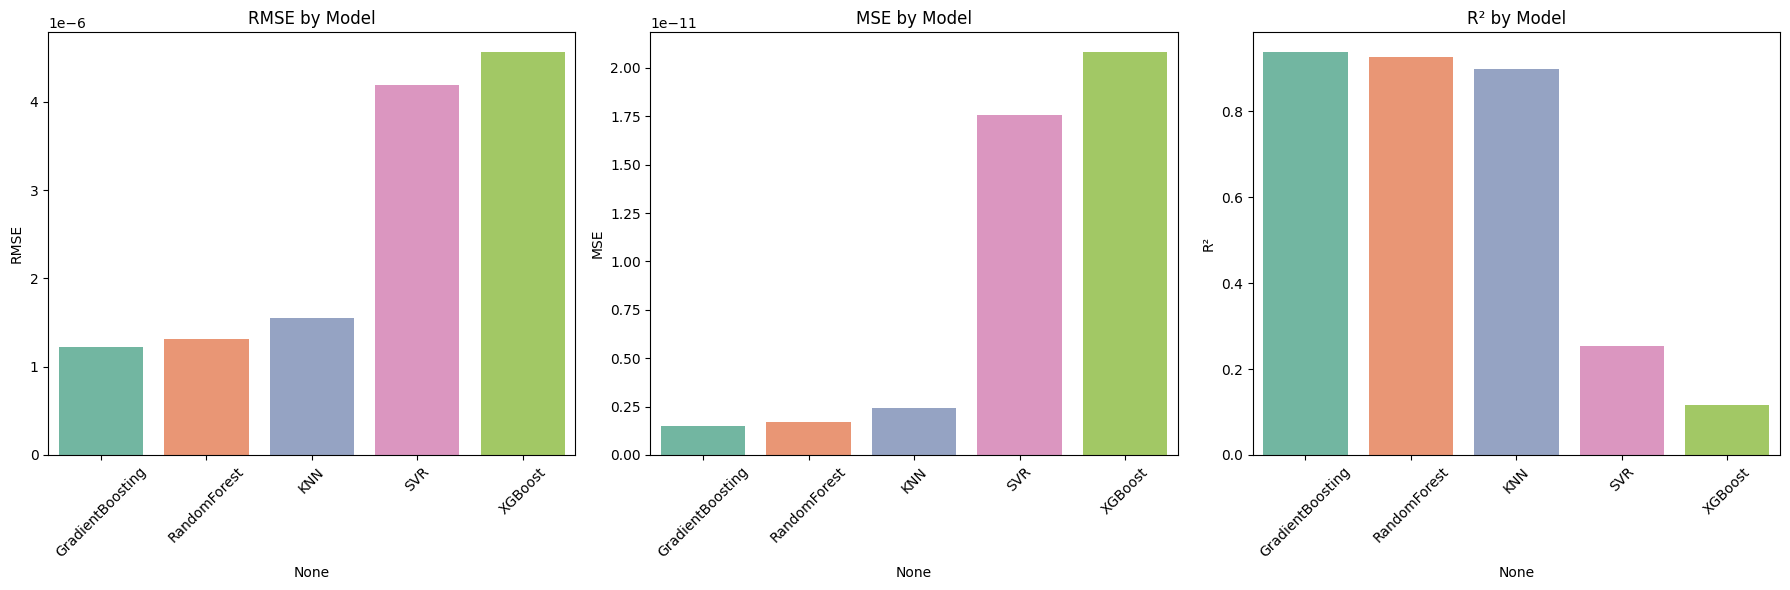

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Optional: XGBoost
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

# Load and clean data
df = pd.read_csv("composition_features_pymatgen.csv") # Load the featurized data
drop_cols = ["Composition", "Composition_clean", "input", "normalized", "pretty_formula", 'Unnamed: 0']
# Filter out columns that exist in the DataFrame before dropping
cols_to_drop = [col for col in drop_cols if col in df.columns]

# Separate target variable before dropping columns
target_column = "CTE Value"
if target_column in df.columns:
    y = df[target_column]
    # Drop the target column from the feature set
    X = df.drop(columns=[target_column] + cols_to_drop, errors='ignore')
else:
    raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")

# Ensure only numeric columns are used for features and drop rows with NaNs
X = X.select_dtypes(include=np.number)

# Print shape after dropping columns to diagnose
print("Shape of X after dropping columns:", X.shape)

X = X.dropna()
y = y.loc[X.index] # Align target variable with the cleaned feature set

# Print shape after dropping NaNs to diagnose
print("Shape of X after dropping NaNs:", X.shape)


# Normalize the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=0),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=0),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}
if xgb_available:
    models["XGBoost"] = XGBRegressor(n_estimators=100, random_state=0)

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(y_pred, "flatten"):
        y_pred = y_pred.flatten()

    # Inverse transform predictions and actuals to original scale
    y_pred_orig = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test_orig = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Compute metrics in original units
    mse = np.mean((y_test_orig - y_pred_orig) ** 2)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_orig, y_pred_orig)

    results[name] = {
        "model": model, "MSE": mse, "RMSE": rmse, "R²": r2
    }

    print(f"\n{name}:")
    print(f"y_test sample: {y_test_orig[:5]}")
    print(f"y_pred sample: {y_pred_orig[:5]}")
    print(f"R² = {r2:.3f}, RMSE = {rmse:.6e}, MSE = {mse:.6e}")

# Summary DataFrame
metrics_df = pd.DataFrame(results).T[["MSE", "RMSE", "R²"]].sort_values("R²", ascending=False)

# Unique colors per model
palette = sns.color_palette("Set2", len(metrics_df))
color_dict = dict(zip(metrics_df.index, palette))

# Plot
plt.figure(figsize=(18, 6))
for i, metric in enumerate(["RMSE", "MSE", "R²"]):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=metrics_df.index, y=metric, data=metrics_df, palette=color_dict)
    plt.title(f"{metric} by Model")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== SHAP Summary for Gradient Boosting Regressor ===


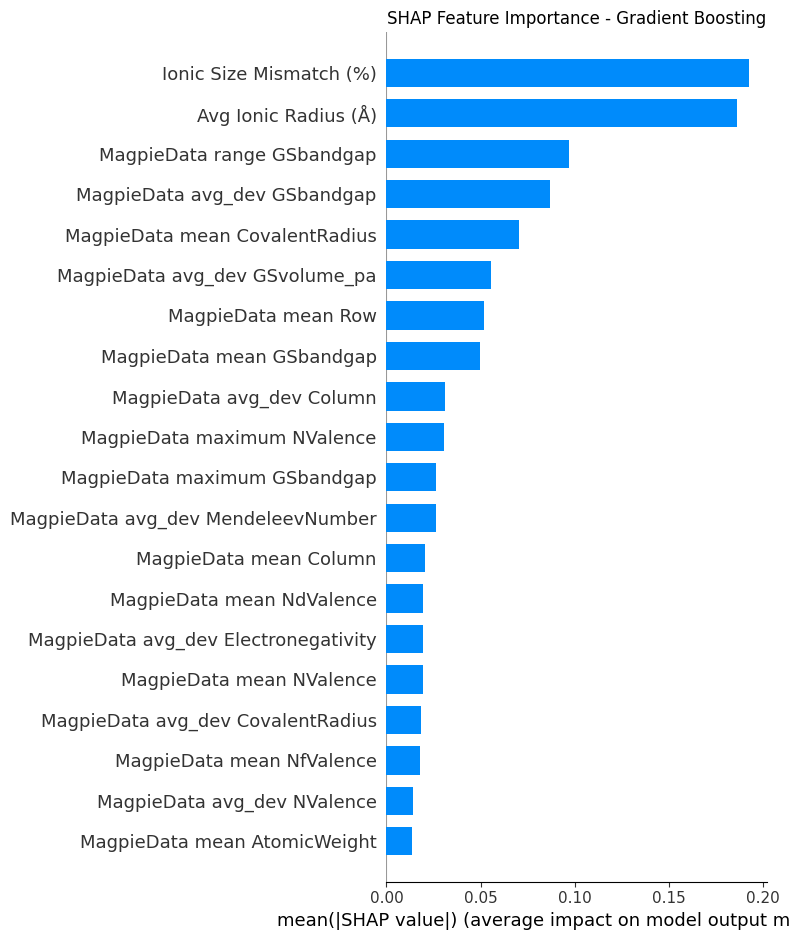

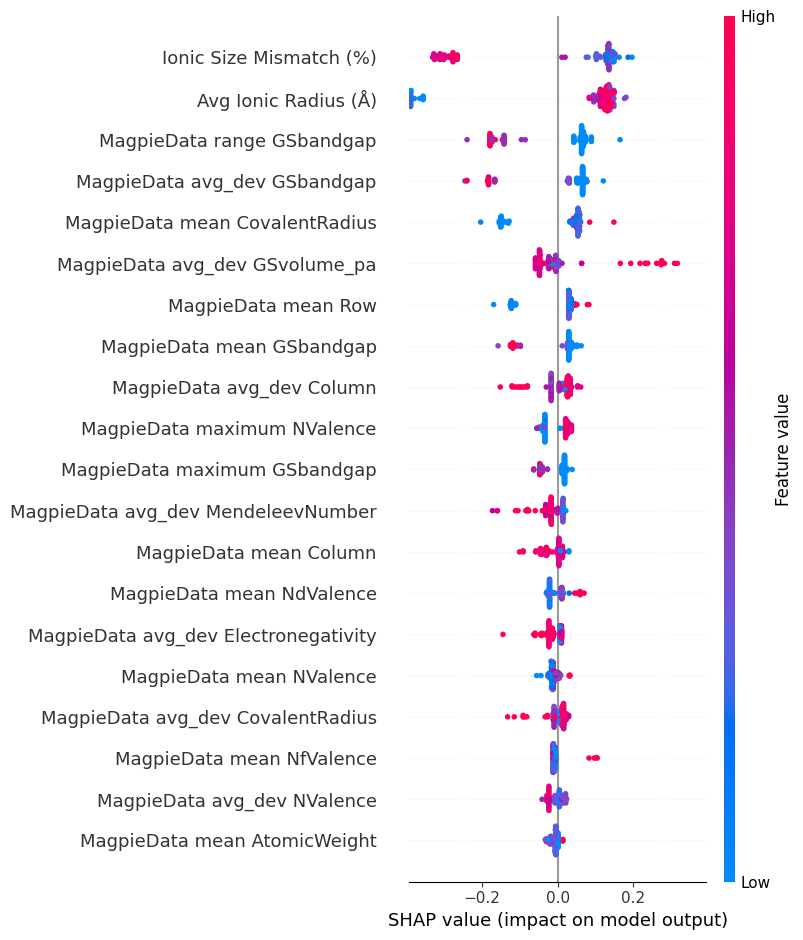

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import shap
import matplotlib.pyplot as plt
import numpy as np

# === Force use of Gradient Boosting Regressor ===
best_model_name = "GradientBoosting"
best_model = results[best_model_name]["model"]

print(f"\n=== SHAP Summary for Gradient Boosting Regressor ===")

# Confirm it's a tree-based model
if isinstance(best_model, GradientBoostingRegressor):
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X)

    # Bar plot
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    plt.title("SHAP Feature Importance - Gradient Boosting")
    plt.tight_layout()
    plt.show()

    # Beeswarm plot
    plt.xlim(-.5 * np.max(np.abs(shap_values)), .5 * np.max(np.abs(shap_values)))  # 150% of max abs value
    shap.summary_plot(shap_values, X, plot_type="dot")
else:
    print("The selected model is not a GradientBoostingRegressor.")


# CTE Predictions

In [ ]:
import pandas as pd
import numpy as np
from pymatgen.core.composition import Composition
from matminer.featurizers.composition import ElementProperty



# --- [1] Your pre-trained objects (already defined in notebook) ---
# best_model       : The Bayesian-optimized GradientBoostingRegressor
# y_scaler         : The StandardScaler used for the target "CTE (K_1)"
# X                : Your training features dataframe (used to get correct columns)

# --- [2] New compositions to predict ---
new_formulas = [
    "Y3Al5O12",
    "Ce3Al5O12",
    "La3Al5O12",
    "Y3Al5O12",
    "Dy2Yb2Nb2Ta2Ce2O7",
    "(Y1.125Nd.125Sm.125Eu.125Dy.125Ho.125Er.125Yb.125)3Al5O12",
    "(Y.5Yb.5)3Al5O12"
]

# --- [3] Featurize new compositions ---
# Convert formulas to pymatgen Composition objects
comp_objs = []
for f in new_formulas:
    try:
        comp_objs.append(Composition(f))
    except Exception as e:
        print(f"Could not parse formula {f}: {e}")
        comp_objs.append(None)

# Filter out invalid compositions before featurizing
valid_comp_objs = [c for c in comp_objs if c is not None]
valid_formulas = [f for f, c in zip(new_formulas, comp_objs) if c is not None]

feature_df = pd.DataFrame({"composition_obj": valid_comp_objs})

# Use the same featurizer as training
featurizer = ElementProperty.from_preset("magpie")
feature_df = featurizer.featurize_dataframe(feature_df, "composition_obj")

# Print featurized dataframe to diagnose
print("Featurized DataFrame for new compositions:")
pd.options.display.float_format = '{:.8f}'.format  # Show more precision when printing
display(feature_df)

# --- [4] Align columns with training data ---
# Add missing columns with 0.0 and reindex to match training columns
X_new = feature_df.reindex(columns=X.columns, fill_value=0.000)

# --- [5] Predict using optimized model ---
y_pred_scaled = best_model.predict(X_new)
y_pred_cte = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# --- [6] Output predictions with more decimal precision ---
pred_df = pd.DataFrame({
    "Composition": valid_formulas,
    "Predicted CTE (K⁻¹)": np.round(y_pred_cte, 8)
})

print("\nPredicted CTE values:")
print(pred_df)

# --- [7] Save to CSV with 8 decimal places ---
pred_df.to_csv("cte_predictions_gradient_boost.csv", index=False, float_format="%.8f")

/usr/local/lib/python3.12/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


ElementProperty:   0%|          | 0/7 [00:00<?, ?it/s]

Featurized DataFrame for new compositions:


composition_obj  MagpieData minimum Number  \
0                              (Y, Al, O)                 8.00000000   
1                             (Ce, Al, O)                 8.00000000   
2                             (La, Al, O)                 8.00000000   
3                              (Y, Al, O)                 8.00000000   
4                 (Dy, Yb, Nb, Ta, Ce, O)                 8.00000000   
5  (Y, Nd, Sm, Eu, Dy, Ho, Er, Yb, Al, O)                 8.00000000   
6                          (Y, Yb, Al, O)                 8.00000000   

   MagpieData maximum Number  MagpieData range Number  MagpieData mean Number  \
0                39.00000000              31.00000000             13.90000000   
1                58.00000000              50.00000000             16.75000000   
2                57.00000000              49.00000000             16.60000000   
3                39.00000000              31.00000000             13.90000000   
4                73.00000000              65.00000000             39.52941176   
5                70.00000000              62.00000000             20.15760870   
6                70.00000000              62.00000000             16.22500000   

   MagpieData avg_dev Number  MagpieData mode Number  \
0                 7.53000000              8.00000000   
1                12.37500000              8.00000000   
2                12.12000000              8.00000000   
3                 7.53000000              8.00000000   
4                25.96539792              8.00000000   
5                15.79820416              8.00000000   
6                11.48250000              8.00000000   

   MagpieData minimum MendeleevNumber  MagpieData maximum MendeleevNumber  \
0                         12.00000000                         87.00000000   
1                         15.00000000                         87.00000000   
2                         13.00000000                         87.00000000   
3                         12.00000000                         87.00000000   
4                         15.00000000                         87.00000000   
5                         12.00000000                         87.00000000   
6                         12.00000000                         87.00000000   

   MagpieData range MendeleevNumber  ...  MagpieData range GSmagmom  \
0                       75.00000000  ...                 0.00000000   
1                       72.00000000  ...                 0.00000000   
2                       74.00000000  ...                 0.00000000   
3                       75.00000000  ...                 0.00000000   
4                       72.00000000  ...                 0.00000000   
5                       75.00000000  ...                 0.00000000   
6                       75.00000000  ...                 0.00000000   

   MagpieData mean GSmagmom  MagpieData avg_dev GSmagmom  \
0                0.00000000                   0.00000000   
1                0.00000000                   0.00000000   
2                0.00000000                   0.00000000   
3                0.00000000                   0.00000000   
4                0.00000000                   0.00000000   
5                0.00000000                   0.00000000   
6                0.00000000                   0.00000000   

   MagpieData mode GSmagmom  MagpieData minimum SpaceGroupNumber  \
0                0.00000000                          12.00000000   
1                0.00000000                          12.00000000   
2                0.00000000                          12.00000000   
3                0.00000000                          12.00000000   
4                0.00000000                          12.00000000   
5                0.00000000                          12.00000000   
6                0.00000000                          12.00000000   

   MagpieData maximum SpaceGroupNumber  MagpieData range SpaceGroupNumber  \
0                         225.00000000                       2


Predicted CTE values:
                                         Composition  Predicted CTE (K⁻¹)
0                                           Y3Al5O12           0.00000674
1                                          Ce3Al5O12           0.00000738
2                                          La3Al5O12           0.00000738
3                                           Y3Al5O12           0.00000674
4                                  Dy2Yb2Nb2Ta2Ce2O7           0.00000626
5  (Y1.125Nd.125Sm.125Eu.125Dy.125Ho.125Er.125Yb....           0.00000660
6                                   (Y.5Yb.5)3Al5O12           0.00000721


In [ ]:
import pandas as pd
import numpy as np
from pymatgen.core.composition import Composition
from matminer.featurizers.composition import ElementProperty

# --- [1] Your pre-trained objects (already defined in notebook) ---
# best_model       : The Bayesian-optimized GradientBoostingRegressor
# y_scaler         : The StandardScaler used for the target "CTE (K_1)"
# X                : Your training features dataframe (used to get correct columns)

# --- [2] New compositions to predict ---
new_formulas = [
    "Y3Al5O12",
    "Y1.5Dy1.5Al5O12",
    "Y.9999Dy.9999Ho.9999Al5O12",
    "Y.75Dy.75Ho.75Er.75Al5O12",
    "Y.6La.6Dy.6Ho.6Er.6Al5O12",
    "Y.60Nd.60Dy.60Ho.60Er.6Al5O12",
    "(Y0.1666Nd0.1666Sm0.1666Dy0.1666Ho0.1666Er0.1666)3Al5O12",
    "(Y0.14285Nd0.14285Sm0.14285Eu0.14285Dy0.14285Ho0.14285Er0.14285)3Al5O12 ",
    "Y3Fe5O12",
    "Y3Fe2.50Al2.50O12",
    "Y3Fe2.475Al2.475Mn0.05O12",
    "Y3Fe2.475Al2.475Co0.05O12",
    "Y3Fe2.475Al2.475Ni0.05O12",
    "Y3Fe2.475Al2.475Cu0.05O12",
    "Y3Fe2.45Al2.45Mn0.025Co0.025Ni0.025Cu0.025O12",
    "Y.6Eu.6Dy.6Ho.6Er.6Al5O12",
    "La.666Gd.666Lu.666TiZrO7",
    "Pr.4Nd.4Gd.4Yb.4Lu.4Ti2O7",
    "Pr.4Sm.4Gd.4Ho.4Lu2Ti2O7",
    "Sm.4Eu.4Gd.4Tb.4Dy.4Ti2O7",
    "Sm.4Eu.4Ho.4Er.4Yb.4Ti2O7",
    "Eu.5Gd.5Ho.5Er.5Ti2O7",
    "GdHoTi2O7",
    "Nd.4Sm.4Eu.4Gd.4Dy.4Ti2O7"
]

# --- [3] Featurize new compositions ---
# Convert formulas to pymatgen Composition objects
comp_objs = []
for f in new_formulas:
    try:
        comp_objs.append(Composition(f))
    except Exception as e:
        print(f"Could not parse formula {f}: {e}")
        comp_objs.append(None)

# Filter out invalid compositions before featurizing
valid_comp_objs = [c for c in comp_objs if c is not None]
valid_formulas = [f for f, c in zip(new_formulas, comp_objs) if c is not None]

feature_df = pd.DataFrame({"composition_obj": valid_comp_objs})

# Use the same featurizer as training
featurizer = ElementProperty.from_preset("magpie")
feature_df = featurizer.featurize_dataframe(feature_df, "composition_obj")

# Print featurized dataframe to diagnose
print("Featurized DataFrame for new compositions:")
display(feature_df)

# --- [4] Align columns with training data ---
# Add missing columns with 0.0 and reindex to match training columns
X_new = feature_df.reindex(columns = X.columns, fill_value=0.000)

# --- [5] Predict using optimized model ---
y_pred_scaled = best_model.predict(X_new)
y_pred_cte = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# --- [6] Output predictions ---
pred_df = pd.DataFrame({
    "Composition": valid_formulas,
    "Predicted CTE (K⁻¹)": y_pred_cte
})
print(pred_df)

# --- [7] Save to CSV ---
pred_df.to_csv("cte_predictions_gradient_boost.csv", index=False)

/usr/local/lib/python3.12/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


ElementProperty:   0%|          | 0/24 [00:00<?, ?it/s]

Featurized DataFrame for new compositions:


composition_obj  MagpieData minimum Number  \
0                           (Y, Al, O)                 8.00000000   
1                       (Y, Dy, Al, O)                 8.00000000   
2                   (Y, Dy, Ho, Al, O)                 8.00000000   
3               (Y, Dy, Ho, Er, Al, O)                 8.00000000   
4           (Y, La, Dy, Ho, Er, Al, O)                 8.00000000   
5           (Y, Nd, Dy, Ho, Er, Al, O)                 8.00000000   
6       (Y, Nd, Sm, Dy, Ho, Er, Al, O)                 8.00000000   
7   (Y, Nd, Sm, Eu, Dy, Ho, Er, Al, O)                 8.00000000   
8                           (Y, Fe, O)                 8.00000000   
9                       (Y, Fe, Al, O)                 8.00000000   
10                  (Y, Fe, Al, Mn, O)                 8.00000000   
11                  (Y, Fe, Al, Co, O)                 8.00000000   
12                  (Y, Fe, Al, Ni, O)                 8.00000000   
13                  (Y, Fe, Al, Cu, O)                 8.00000000   
14      (Y, Fe, Al, Mn, Co, Ni, Cu, O)                 8.00000000   
15          (Y, Eu, Dy, Ho, Er, Al, O)                 8.00000000   
16             (La, Gd, Lu, Ti, Zr, O)                 8.00000000   
17         (Pr, Nd, Gd, Yb, Lu, Ti, O)                 8.00000000   
18         (Pr, Sm, Gd, Ho, Lu, Ti, O)                 8.00000000   
19         (Sm, Eu, Gd, Tb, Dy, Ti, O)                 8.00000000   
20         (Sm, Eu, Ho, Er, Yb, Ti, O)                 8.00000000   
21             (Eu, Gd, Ho, Er, Ti, O)                 8.00000000   
22                     (Gd, Ho, Ti, O)                 8.00000000   
23         (Nd, Sm, Eu, Gd, Dy, Ti, O)                 8.00000000   

    MagpieData maximum Number  MagpieData range Number  \
0                 39.00000000              31.00000000   
1                 66.00000000              58.00000000   
2                 67.00000000              59.00000000   
3                 68.00000000              60.00000000   
4                 68.00000000              60.00000000   
5                 68.00000000              60.00000000   
6                 68.00000000              60.00000000   
7                 68.00000000              60.00000000   
8                 39.00000000              31.00000000   
9                 39.00000000              31.00000000   
10                39.00000000              31.00000000   
11                39.00000000              31.00000000   
12                39.00000000              31.00000000   
13                39.00000000              31.00000000   
14                39.00000000              31.00000000   
15                68.00000000              60.00000000   
16                71.00000000              63.00000000   
17                71.00000000              63.00000000   
18                71.00000000              63.00000000   
19                66.00000000              58.00000000   
20                70.00000000              62.00000000   
21                68.00000000              60.00000000   
22                67.00000000              59.00000000   
23                66.00000000              58.00000000   

    MagpieData mean Number  MagpieData avg_dev Number  MagpieData mode Number  \
0              13.90000000                 7.53000000              8.00000000   
1              15.92500000                10.97250000              8.00000000   
2              16.64938974                12.20414562              8.00000000   
3              17.05000000                12.88500000              8.00000000   
4              16.96000000                12.73200000              8.00000000   
5              17.05000000                12.88500000              8.00000000   
6              17.09740584                12.96636792              8.00000000   
7              17.15681618                13.06668550              8.00000000   
8              17.15000000                10.98000000              8.00000000   
9              15.52500000          

                                          Composition  Predicted CTE (K⁻¹)
0                                            Y3Al5O12           0.00000674
1                                     Y1.5Dy1.5Al5O12           0.00000682
2                          Y.9999Dy.9999Ho.9999Al5O12           0.00000744
3                           Y.75Dy.75Ho.75Er.75Al5O12           0.00000764
4                           Y.6La.6Dy.6Ho.6Er.6Al5O12           0.00000744
5                       Y.60Nd.60Dy.60Ho.60Er.6Al5O12           0.00000733
6   (Y0.1666Nd0.1666Sm0.1666Dy0.1666Ho0.1666Er0.16...           0.00000778
7   (Y0.14285Nd0.14285Sm0.14285Eu0.14285Dy0.14285H...           0.00000775
8                                            Y3Fe5O12           0.00000789
9                                   Y3Fe2.50Al2.50O12           0.00000775
10                          Y3Fe2.475Al2.475Mn0.05O12           0.00000775
11                          Y3Fe2.475Al2.475Co0.05O12           0.00000775
12                       

Shape of X after dropping columns: (118, 209)
Shape of X after dropping NaNs: (118, 209)

RandomForest: R²=0.9148, RMSE=1.415916e-06, MSE=2.004818e-12

GradientBoosting: R²=0.9366, RMSE=1.221176e-06, MSE=1.491271e-12

ExtraTrees: R²=0.8365, RMSE=1.961304e-06, MSE=3.846712e-12

DecisionTree: R²=0.8106, RMSE=2.111014e-06, MSE=4.456379e-12

Ridge: R²=0.8837, RMSE=1.654641e-06, MSE=2.737838e-12

Lasso: R²=0.8663, RMSE=1.773528e-06, MSE=3.145400e-12

ElasticNet: R²=0.8738, RMSE=1.723086e-06, MSE=2.969026e-12

BayesianRidge: R²=0.8741, RMSE=1.720909e-06, MSE=2.961527e-12

Huber: R²=0.7770, RMSE=2.290656e-06, MSE=5.247103e-12

TheilSen: R²=-0.7117, RMSE=6.346501e-06, MSE=4.027807e-11
Tweedie failed: Some value(s) of y are out of the valid range of the loss 'HalfTweedieLoss'.

Quantile: R²=0.8647, RMSE=1.784543e-06, MSE=3.184593e-12

SVR: R²=0.8286, RMSE=2.008317e-06, MSE=4.033339e-12

NuSVR: R²=0.3563, RMSE=3.891908e-06, MSE=1.514695e-11

KNN: R²=0.8743, RMSE=1.719816e-06, MSE=2.957767e-12

M

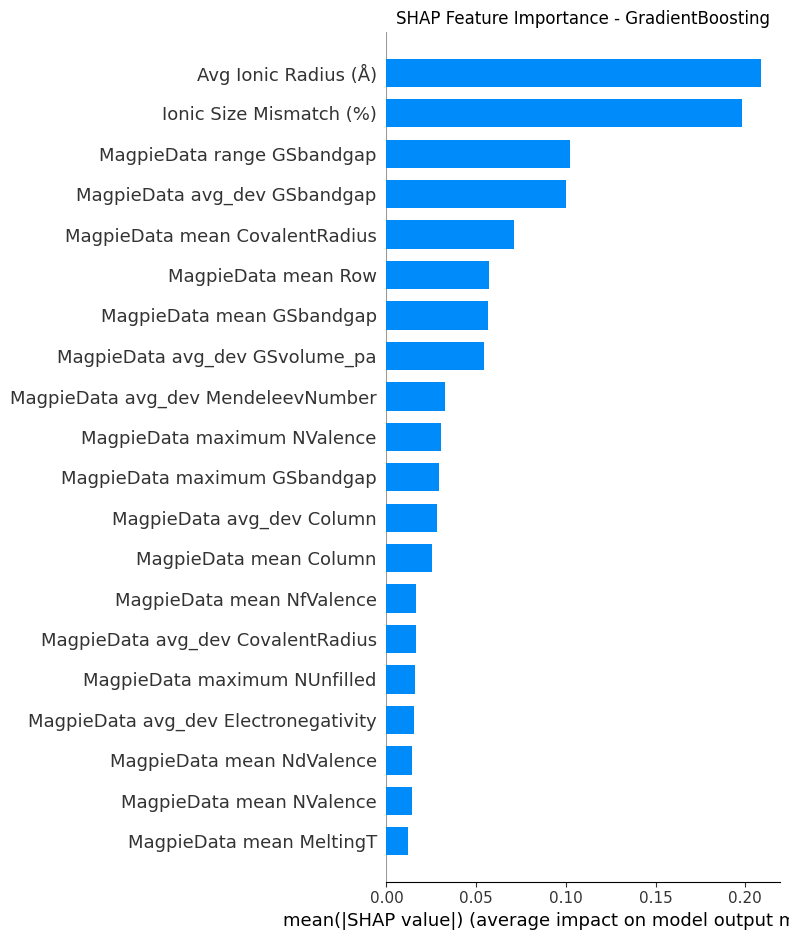

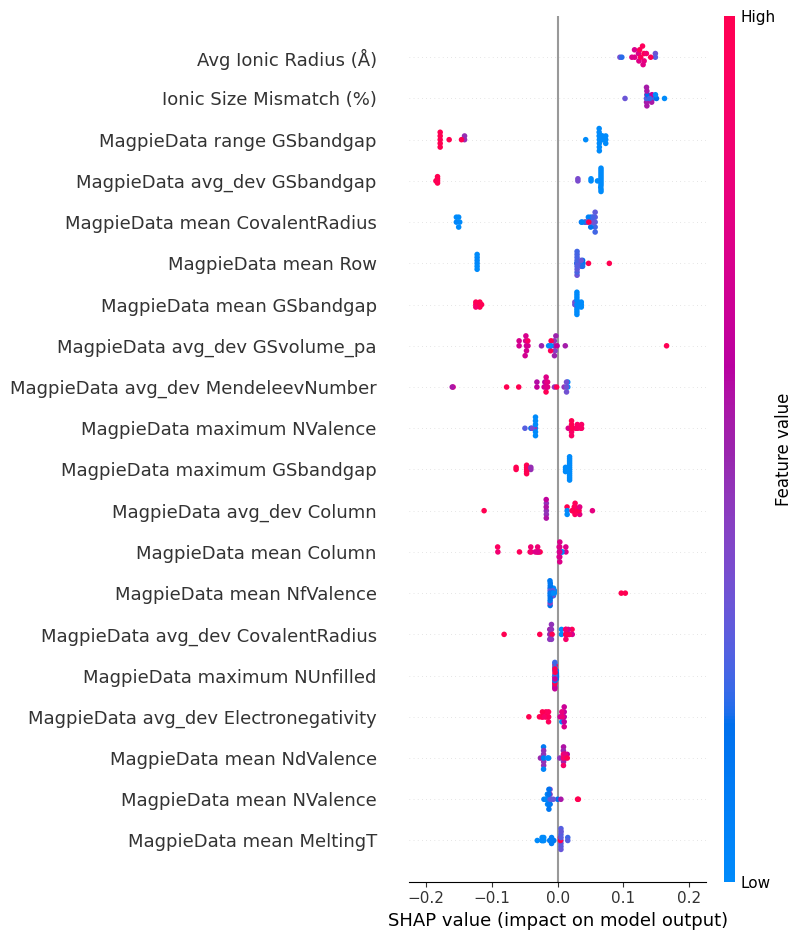


=== SHAP for RandomForest ===


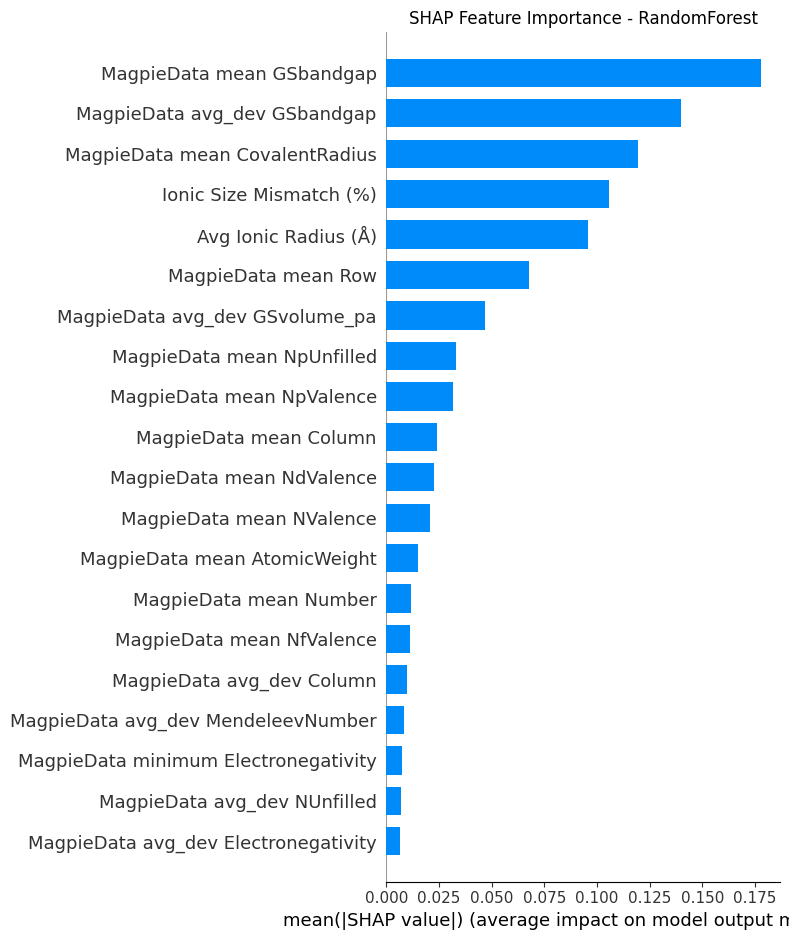

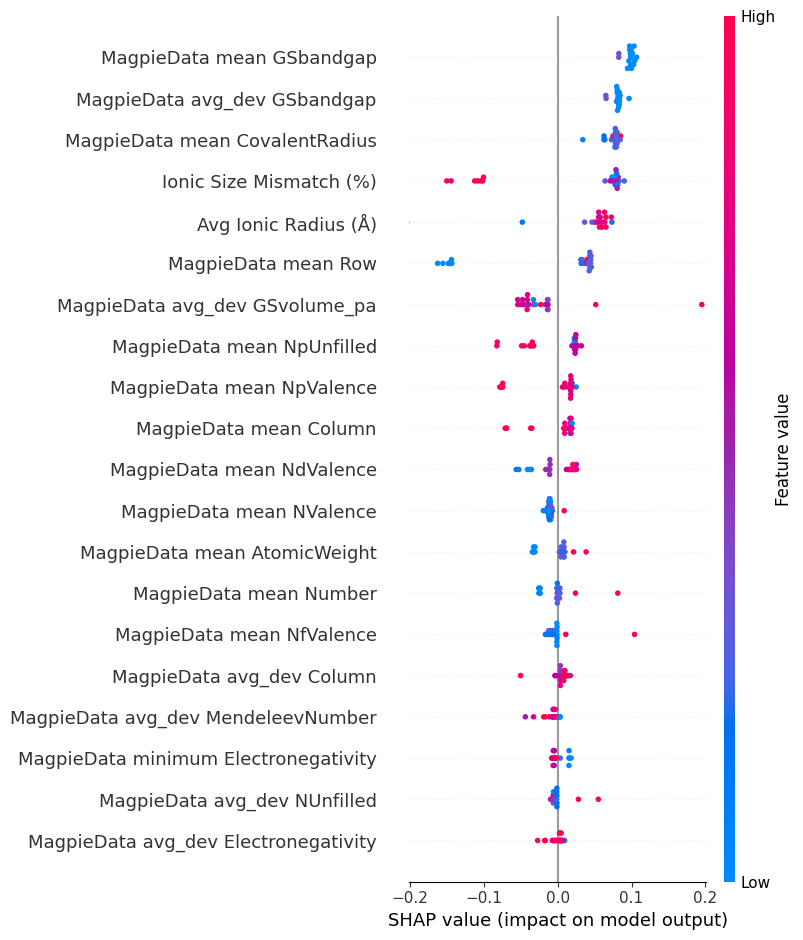


=== SHAP for Bagging_RF ===


  0%|          | 0/24 [00:00<?, ?it/s]

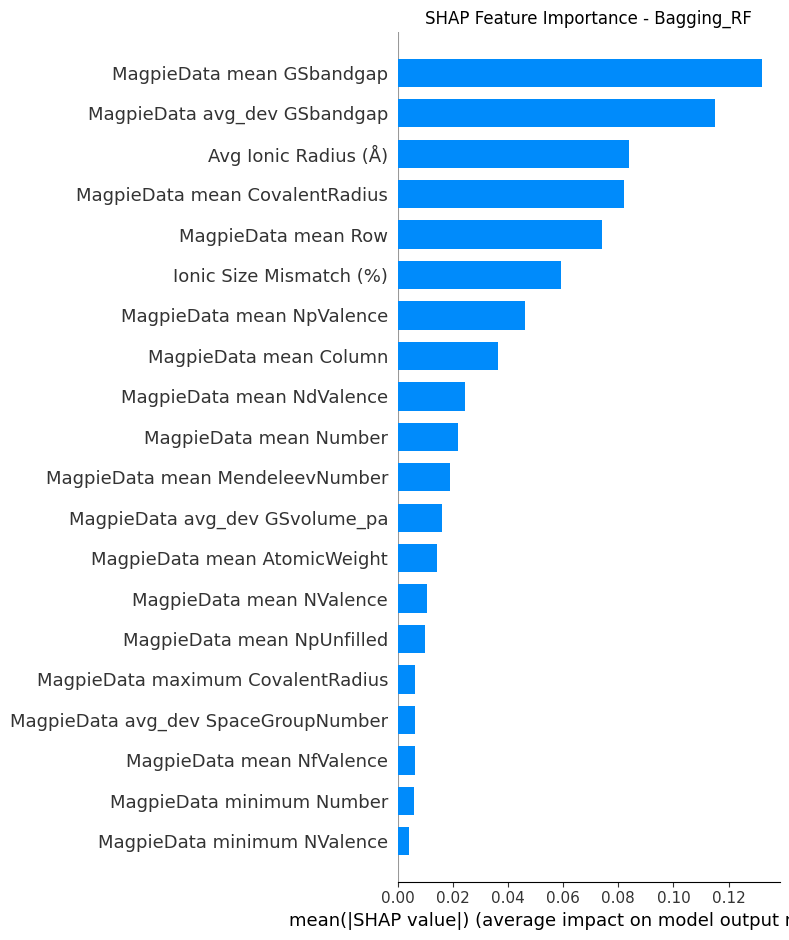

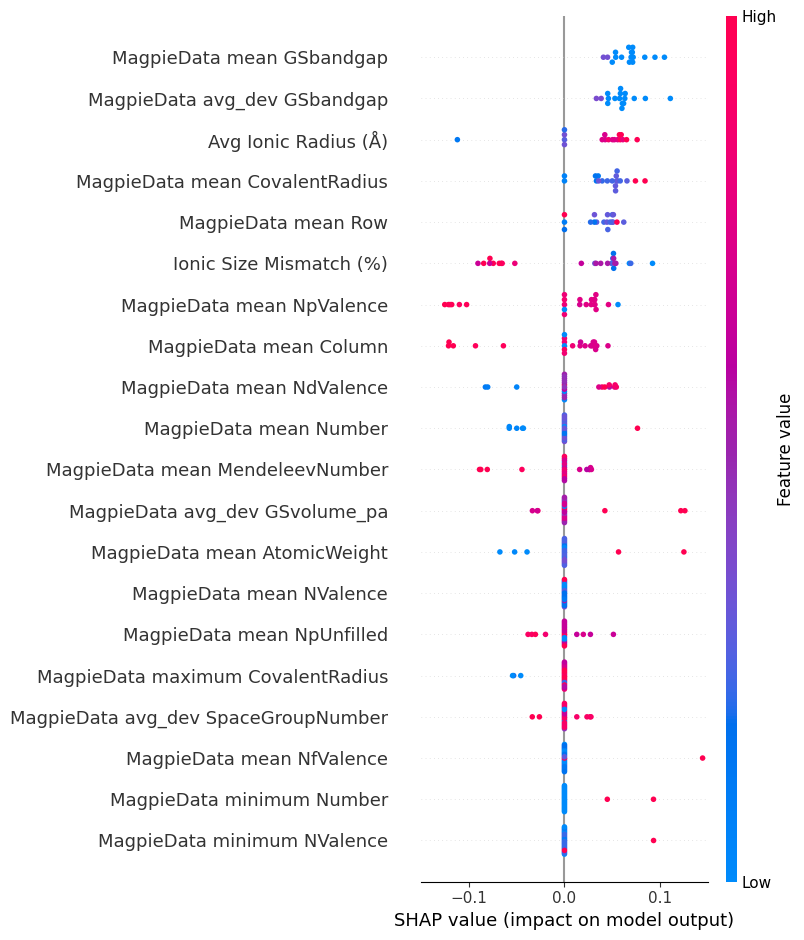


=== SHAP for AdaBoost ===


  0%|          | 0/24 [00:00<?, ?it/s]

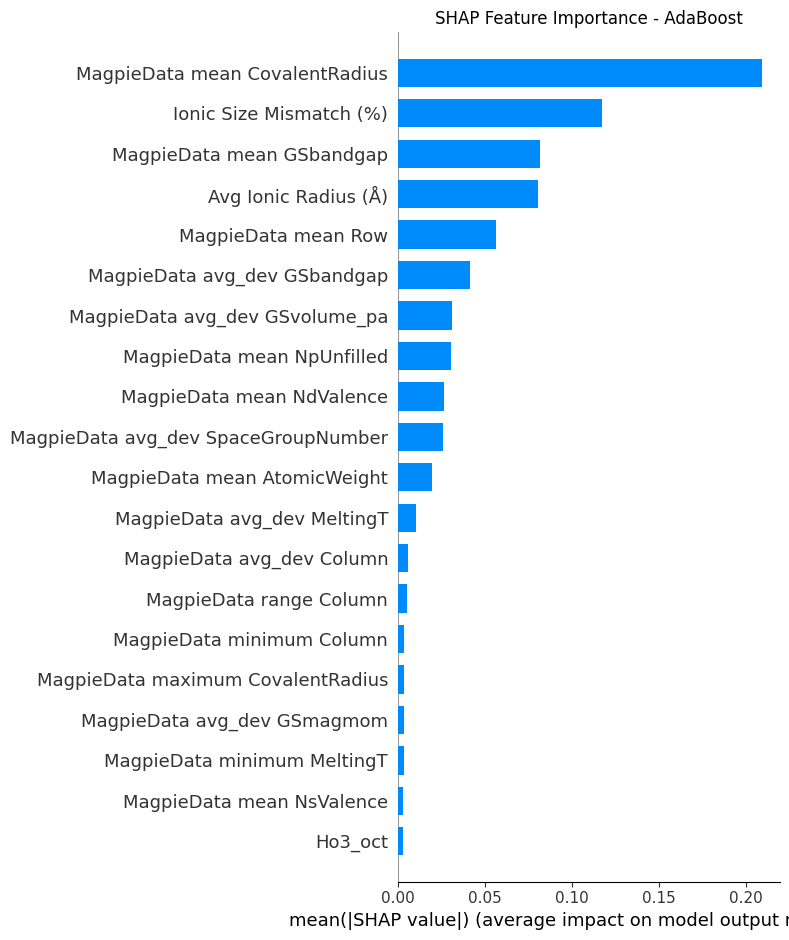

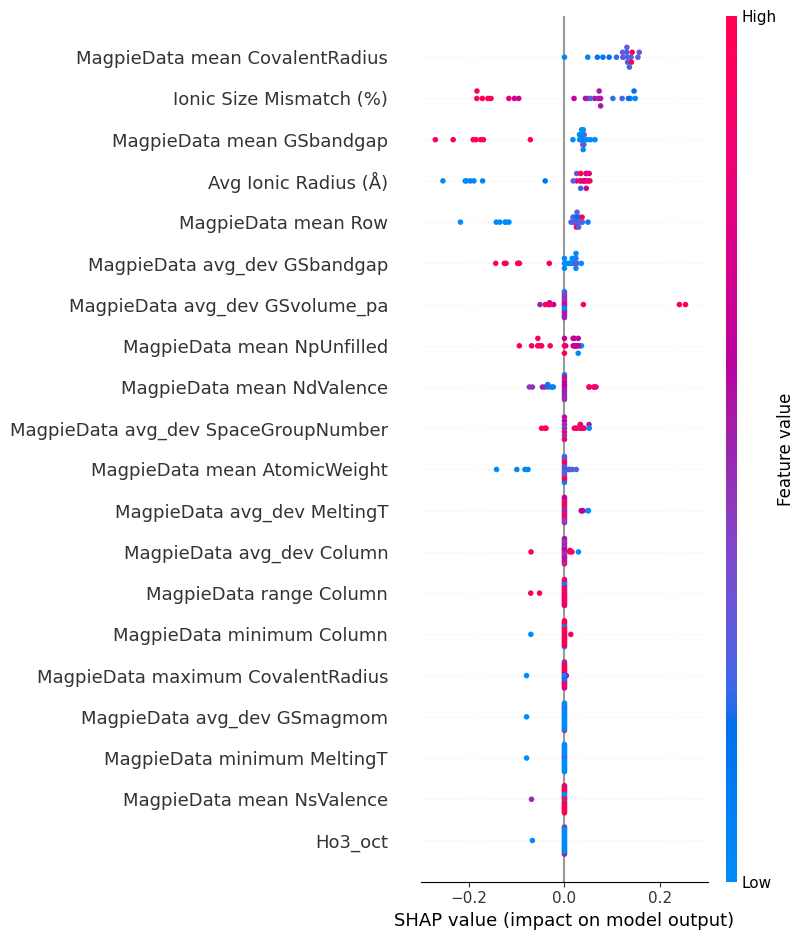


=== SHAP for Ridge ===


  0%|          | 0/24 [00:00<?, ?it/s]

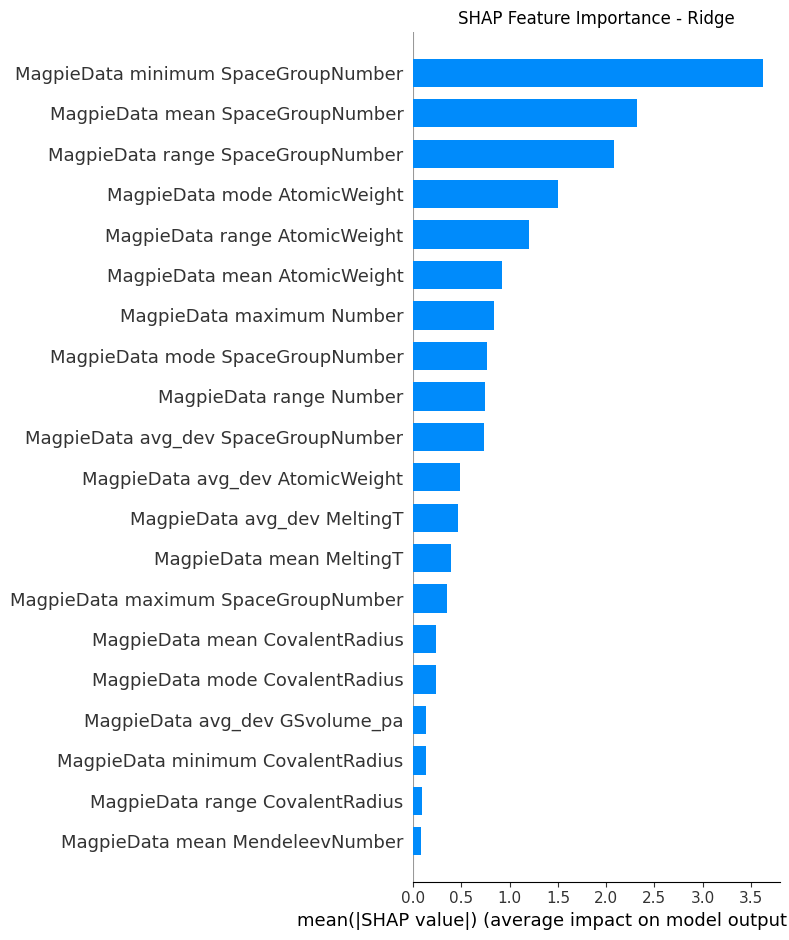

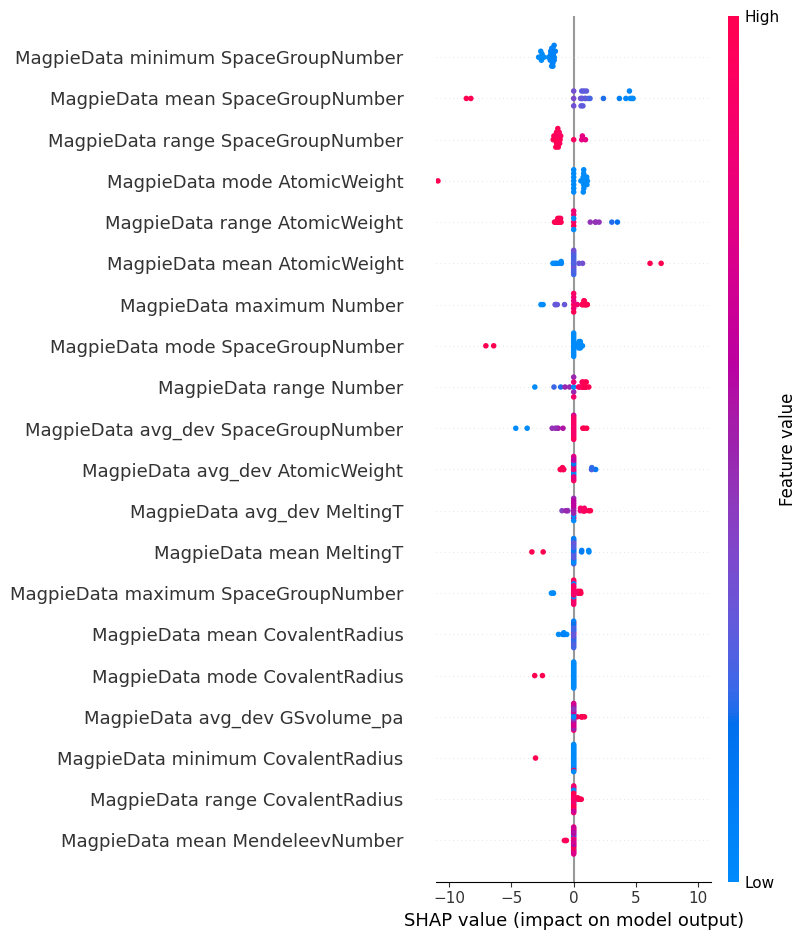


=== SHAP for KNN ===


  0%|          | 0/24 [00:00<?, ?it/s]

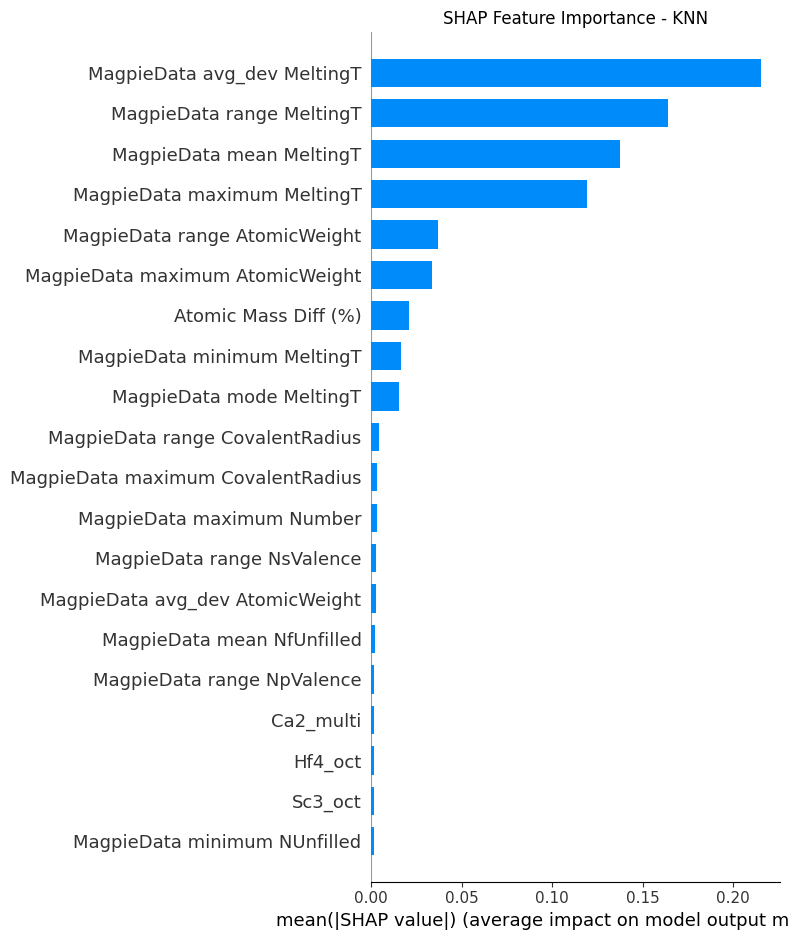

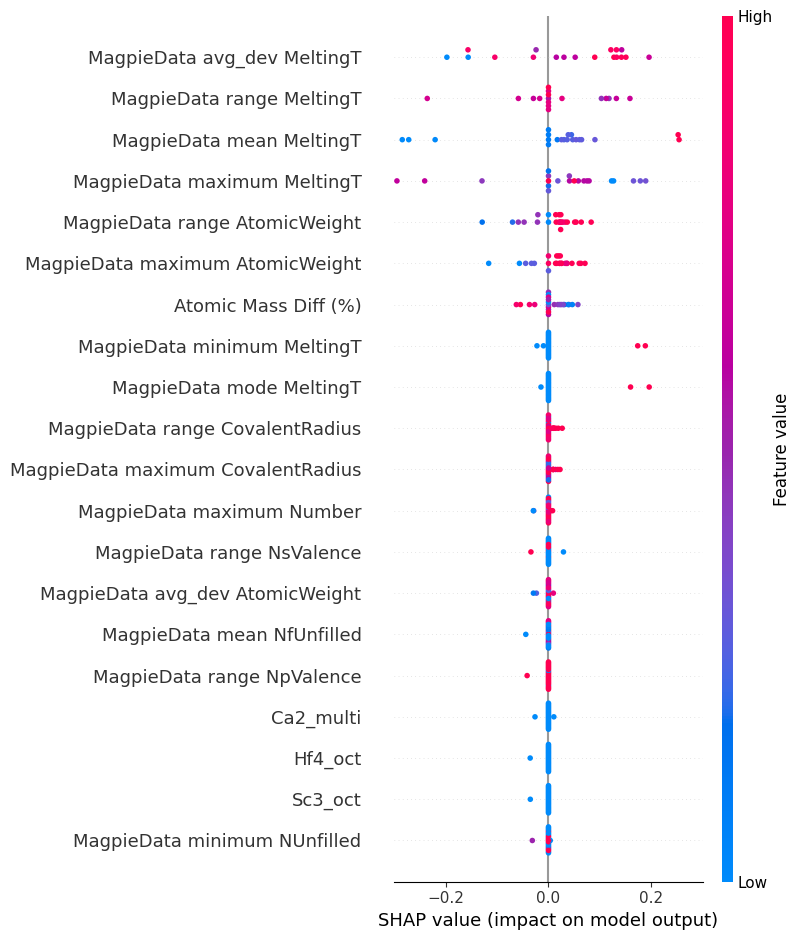

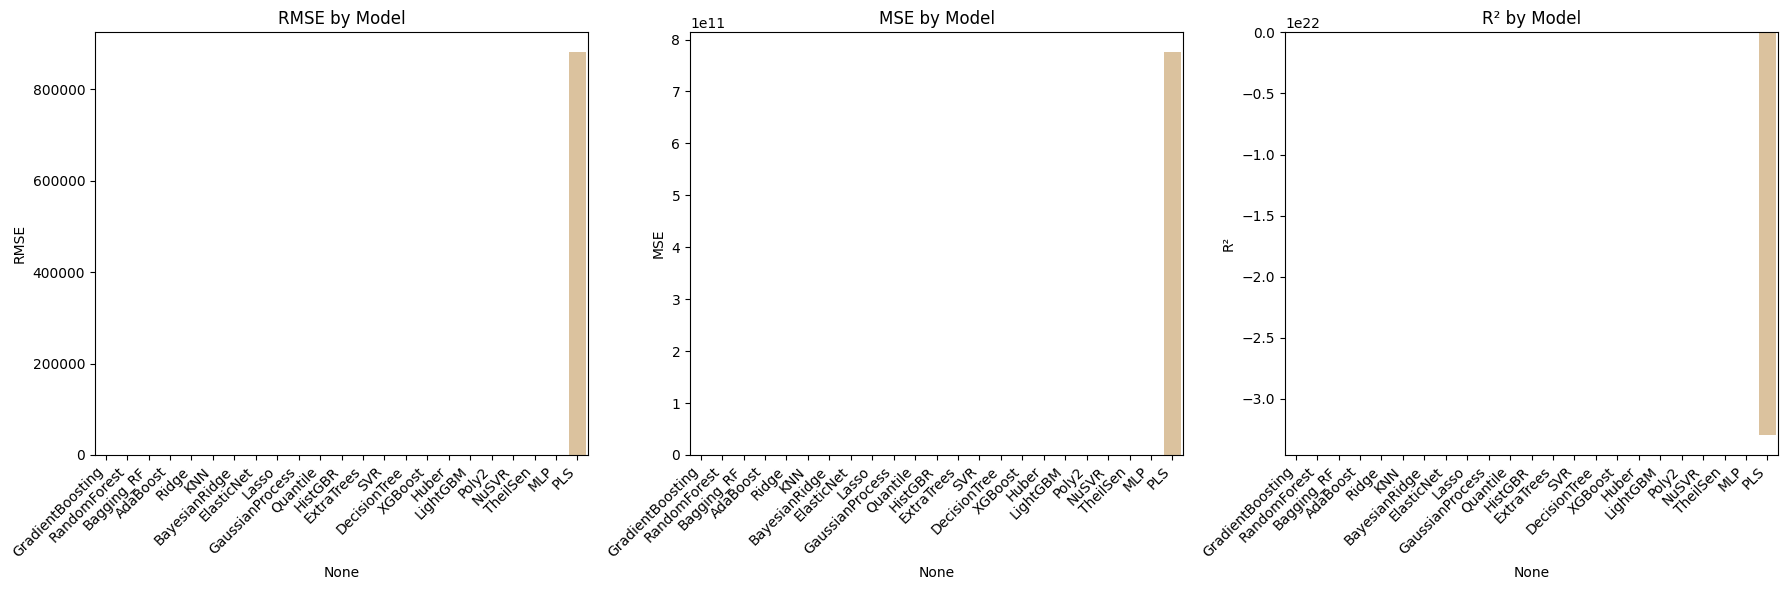

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    HistGradientBoostingRegressor,
    StackingRegressor,
    VotingRegressor,
    AdaBoostRegressor,
    BaggingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import (
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge,
    HuberRegressor,
    TheilSenRegressor,
    TweedieRegressor,
    QuantileRegressor
)
from sklearn.svm import SVR, NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ---- Optional external libs ----
xgb_available = lgb_available = cat_available = False
try:
    from xgboost import XGBRegressor
    xgb_available = True
except Exception:
    pass

try:
    from lightgbm import LGBMRegressor
    lgb_available = True
except Exception:
    pass

try:
    from catboost import CatBoostRegressor
    cat_available = True
except Exception:
    pass

warnings.filterwarnings("ignore")

# =========================
# Load and clean data
# =========================
df = pd.read_csv("composition_features_pymatgen.csv")
drop_cols = ["Composition", "Composition_clean", "input", "normalized", "pretty_formula", "Unnamed: 0"]
cols_to_drop = [c for c in drop_cols if c in df.columns]

target_column = "CTE Value"
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found.")

y = df[target_column]
X = df.drop(columns=[target_column] + cols_to_drop, errors="ignore").select_dtypes(include=np.number)

print("Shape of X after dropping columns:", X.shape)

# Drop NaNs and align
X = X.dropna(axis=0)
y = y.loc[X.index]
print("Shape of X after dropping NaNs:", X.shape)

# Scale target (inverse later for metrics in original units)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# =========================
# Train/test split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# =========================
# Model zoo (expanded)
# =========================
models = {
    # Tree models
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=0),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=500, random_state=0, n_jobs=-1),
    "DecisionTree": DecisionTreeRegressor(random_state=0),

    # Linear & regularized
    "Ridge": Ridge(alpha=1.0, random_state=0),
    "Lasso": Lasso(alpha=1e-3, random_state=0, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=1e-3, l1_ratio=0.5, random_state=0, max_iter=10000),
    "BayesianRidge": BayesianRidge(),
    "Huber": HuberRegressor(),
    "TheilSen": TheilSenRegressor(),
    "Tweedie": TweedieRegressor(power=1, alpha=0.5),
    "Quantile": QuantileRegressor(quantile=0.5, alpha=0.1, solver="highs"),

    # SVM/KNN
    "SVR": SVR(C=10.0, epsilon=0.01, kernel="rbf"),
    "NuSVR": NuSVR(kernel="rbf", C=1.0, nu=0.5),
    "KNN": KNeighborsRegressor(n_neighbors=7),

    # Neural net
    "MLP": MLPRegressor(hidden_layer_sizes=(100,), max_iter=2000, random_state=0),

    # Histogram GB
    "HistGBR": HistGradientBoostingRegressor(random_state=0),

    # Gaussian Process
    "GaussianProcess": GaussianProcessRegressor(
        kernel=RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0),
        normalize_y=True, random_state=0
    ),

    # Partial Least Squares
    "PLS": PLSRegression(n_components=5),

    # Polynomial Regression
    "Poly2": Pipeline([
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin", Ridge(alpha=1.0))
    ]),

    # Boosting/Bagging ensembles
    "AdaBoost": AdaBoostRegressor(n_estimators=300, random_state=0),
    "Bagging_RF": BaggingRegressor(
        estimator=RandomForestRegressor(n_estimators=50),
        n_estimators=20, random_state=0
    ),
}

if xgb_available:
    models["XGBoost"] = XGBRegressor(
        n_estimators=800, max_depth=6, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, random_state=0, n_jobs=-1, tree_method="hist"
    )
if lgb_available:
    models["LightGBM"] = LGBMRegressor(
        n_estimators=800, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, random_state=0, n_jobs=-1
    )
if cat_available:
    models["CatBoost"] = CatBoostRegressor(
        iterations=1000, learning_rate=0.05, depth=6, random_seed=0, verbose=False
    )

# =========================
# Train & Evaluate
# =========================
results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = np.asarray(model.predict(X_test)).ravel()

        y_pred_orig = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
        y_test_orig = y_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

        mse = np.mean((y_test_orig - y_pred_orig) ** 2)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_orig, y_pred_orig)

        results[name] = {"model": model, "MSE": mse, "RMSE": rmse, "R²": r2}
        print(f"\n{name}: R²={r2:.4f}, RMSE={rmse:.6e}, MSE={mse:.6e}")
    except Exception as e:
        print(f"{name} failed: {e}")

metrics_df = pd.DataFrame(results).T[["MSE", "RMSE", "R²"]].sort_values("R²", ascending=False)
print("\n=== Summary ===")
print(metrics_df)

# =========================
# SHAP on top-N models
# =========================
TOP_N_FOR_SHAP = 6
background_sample_size = 200
shap_sample_size = 400

tree_model_types = tuple([
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, DecisionTreeRegressor
] + ([XGBRegressor] if xgb_available else [])
  + ([LGBMRegressor] if lgb_available else [])
  + ([CatBoostRegressor] if cat_available else [])
)

top_models = metrics_df.head(TOP_N_FOR_SHAP).index.tolist()
print(f"\nRunning SHAP on top {len(top_models)} models by R²:", top_models)

rng = np.random.RandomState(42)
bg_idx = rng.choice(X_train.index, size=min(background_sample_size, len(X_train)), replace=False)
sample_idx = rng.choice(X_test.index, size=min(shap_sample_size, len(X_test)), replace=False)

X_bg = X.loc[bg_idx]
X_samp = X.loc[sample_idx]

for name in top_models:
    model = results[name]["model"]
    print(f"\n=== SHAP for {name} ===")
    try:
        if isinstance(model, tree_model_types):
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_samp)
        else:
            explainer = shap.KernelExplainer(model.predict, shap.sample(X_bg, min(len(X_bg), 200), random_state=42))
            shap_values = explainer.shap_values(X_samp, nsamples="auto")

        shap.summary_plot(shap_values, X_samp, plot_type="bar", show=False)
        plt.title(f"SHAP Feature Importance - {name}")
        plt.tight_layout()
        plt.show()

        max_abs = np.max(np.abs(shap_values))
        plt.xlim(-0.5 * max_abs, 0.5 * max_abs)
        shap.summary_plot(shap_values, X_samp, plot_type="dot")
    except Exception as e:
        print(f"SHAP failed for {name}: {e}")

# =========================
# Metric plots
# =========================
palette = sns.color_palette("Set2", len(metrics_df))
color_dict = dict(zip(metrics_df.index, palette))

plt.figure(figsize=(18, 6))
for i, metric in enumerate(["RMSE", "MSE", "R²"]):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=metrics_df.index, y=metric, data=metrics_df, palette=color_dict)
    plt.title(f"{metric} by Model")
    plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from pymatgen.core.composition import Composition
from matminer.featurizers.composition import ElementProperty

# --- [1] Your trained models ---
# Assumes `results` is a dict like: results[model_name] = {"model": model, "R²": ..., ...}
# And y_scaler is your StandardScaler for the target

# Use ALL models instead of only the top N
all_models = list(results.items())
print(f"Using all {len(all_models)} models: {[m[0] for m in all_models]}")

# --- [2] New compositions to predict ---
new_formulas = [
    "Y3Al5O12",
    "Y1.5Dy1.5Al5O12",
    "Y.9999Dy.9999Ho.9999Al5O12",
    "Y.75Dy.75Ho.75Er.75Al5O12",
    "Y.6La.6Dy.6Ho.6Er.6Al5O12",
    "Y.60Nd.60Dy.60Ho.60Er.6Al5O12",
    "(Y0.1666Nd0.1666Sm0.1666Dy0.1666Ho0.1666Er0.1666)3Al5O12",
    "(Y0.14285Nd0.14285Sm0.14285Eu0.14285Dy0.14285Ho0.14285Er0.14285)3Al5O12 ",
    "Y3Fe5O12",
    "Y3Fe2.50Al2.50O12",
    "Y3Fe2.475Al2.475Mn0.05O12",
    "Y3Fe2.475Al2.475Co0.05O12",
    "Y3Fe2.475Al2.475Ni0.05O12",
    "Y3Fe2.475Al2.475Cu0.05O12",
    "Y3Fe2.45Al2.45Mn0.025Co0.025Ni0.025Cu0.025O12",
    "Y.6Eu.6Dy.6Ho.6Er.6Al5O12",
    "La.666Gd.666Lu.666TiZrO7",
    "Pr.4Nd.4Gd.4Yb.4Lu.4Ti2O7",
    "Pr.4Sm.4Gd.4Ho.4Lu2Ti2O7",
    "Sm.4Eu.4Gd.4Tb.4Dy.4Ti2O7",
    "Sm.4Eu.4Ho.4Er.4Yb.4Ti2O7",
    "Eu.5Gd.5Ho.5Er.5Ti2O7",
    "GdHoTi2O7",
    "Nd.4Sm.4Eu.4Gd.4Dy.4Ti2O7"
]

# --- [3] Featurize new compositions ---
comp_objs = []
for f in new_formulas:
    try:
        comp_objs.append(Composition(f))
    except Exception as e:
        print(f"Could not parse formula {f}: {e}")
        comp_objs.append(None)

valid_comp_objs = [c for c in comp_objs if c is not None]
valid_formulas = [f for f, c in zip(new_formulas, comp_objs) if c is not None]

feature_df = pd.DataFrame({"composition_obj": valid_comp_objs})
featurizer = ElementProperty.from_preset("magpie")
feature_df = featurizer.featurize_dataframe(feature_df, "composition_obj")

# --- [4] Align columns with training data ---
X_new = feature_df.reindex(columns=X.columns, fill_value=0.0)

# --- [5] Predict with each model in results ---
all_preds = {"Composition": valid_formulas}
for name, info in all_models:
    model = info["model"]
    y_pred_scaled = model.predict(X_new)
    y_pred_cte = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    all_preds[f"Predicted CTE ({name})"] = y_pred_cte

# --- [6] Output predictions ---
pred_df = pd.DataFrame(all_preds)
print(pred_df)

# --- [7] Save to CSV ---
pred_df.to_csv("cte_predictions_all_models.csv", index=False)


Using all 23 models: ['RandomForest', 'GradientBoosting', 'ExtraTrees', 'DecisionTree', 'Ridge', 'Lasso', 'ElasticNet', 'BayesianRidge', 'Huber', 'TheilSen', 'Quantile', 'SVR', 'NuSVR', 'KNN', 'MLP', 'HistGBR', 'GaussianProcess', 'PLS', 'Poly2', 'AdaBoost', 'Bagging_RF', 'XGBoost', 'LightGBM']


ElementProperty:   0%|          | 0/24 [00:00<?, ?it/s]

                                          Composition  \
0                                            Y3Al5O12   
1                                     Y1.5Dy1.5Al5O12   
2                          Y.9999Dy.9999Ho.9999Al5O12   
3                           Y.75Dy.75Ho.75Er.75Al5O12   
4                           Y.6La.6Dy.6Ho.6Er.6Al5O12   
5                       Y.60Nd.60Dy.60Ho.60Er.6Al5O12   
6   (Y0.1666Nd0.1666Sm0.1666Dy0.1666Ho0.1666Er0.16...   
7   (Y0.14285Nd0.14285Sm0.14285Eu0.14285Dy0.14285H...   
8                                            Y3Fe5O12   
9                                   Y3Fe2.50Al2.50O12   
10                          Y3Fe2.475Al2.475Mn0.05O12   
11                          Y3Fe2.475Al2.475Co0.05O12   
12                          Y3Fe2.475Al2.475Ni0.05O12   
13                          Y3Fe2.475Al2.475Cu0.05O12   
14      Y3Fe2.45Al2.45Mn0.025Co0.025Ni0.025Cu0.025O12   
15                          Y.6Eu.6Dy.6Ho.6Er.6Al5O12   
16                           La

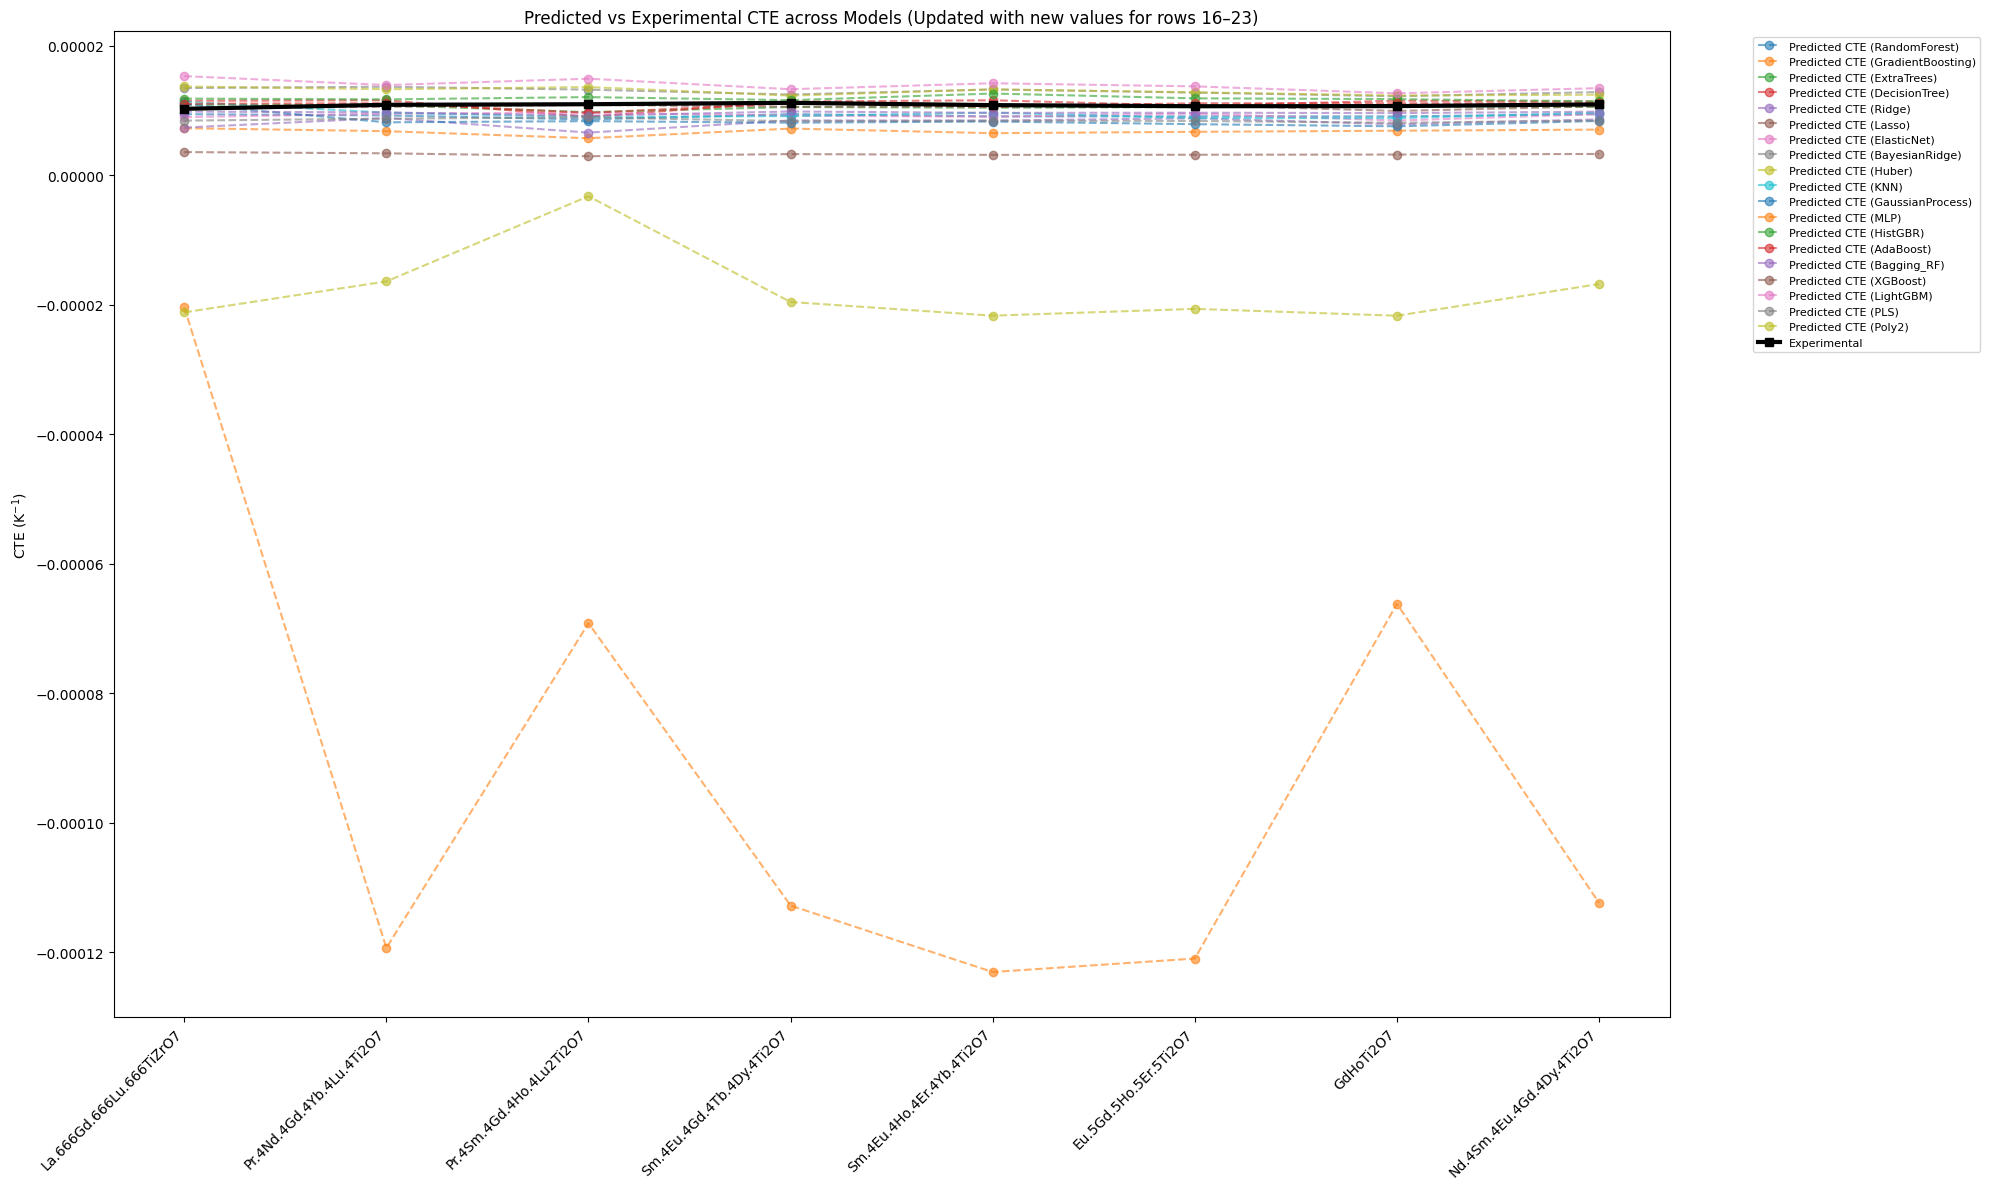

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------------- Experimental Data ----------------
experimental_data = {
    "La.666Gd.666Lu.666TiZrO7": 10.26370957e-6,
    "Pr.4Nd.4Gd.4Yb.4Lu.4Ti2O7": 10.8812864e-6,
    "Pr.4Sm.4Gd.4Ho.4Lu2Ti2O7": 10.97135822e-6,
    "Sm.4Eu.4Gd.4Tb.4Dy.4Ti2O7": 11.18713217e-6,
    "Sm.4Eu.4Ho.4Er.4Yb.4Ti2O7": 10.83446e-6,
    "Eu.5Gd.5Ho.5Er.5Ti2O7": 10.66338e-6,
    "GdHoTi2O7": 10.68365e-6,
    "Nd.4Sm.4Eu.4Gd.4Dy.4Ti2O7": 10.94286e-6,
}

# ---------------- Build DataFrame (rows 16–23 updated from your new table) ----------------
df = pd.DataFrame({
    "Formula": [
        "La.666Gd.666Lu.666TiZrO7",
        "Pr.4Nd.4Gd.4Yb.4Lu.4Ti2O7",
        "Pr.4Sm.4Gd.4Ho.4Lu2Ti2O7",
        "Sm.4Eu.4Gd.4Tb.4Dy.4Ti2O7",
        "Sm.4Eu.4Ho.4Er.4Yb.4Ti2O7",
        "Eu.5Gd.5Ho.5Er.5Ti2O7",
        "GdHoTi2O7",
        "Nd.4Sm.4Eu.4Gd.4Dy.4Ti2O7"
    ],

    # Tree-based models (from indices 16–23)
    "Predicted CTE (RandomForest)":     [9.43e-6, 9.24e-6, 8.62e-6, 9.44e-6, 9.09e-6, 9.10e-6, 9.09e-6, 9.44e-6],
    "Predicted CTE (GradientBoosting)": [7.27e-6, 6.81e-6, 5.72e-6, 7.21e-6, 6.50e-6, 6.71e-6, 6.88e-6, 7.05e-6],
    "Predicted CTE (ExtraTrees)":       [10.92e-6, 10.81e-6, 9.75e-6, 10.54e-6, 10.43e-6, 10.53e-6, 10.59e-6, 10.56e-6],
    "Predicted CTE (DecisionTree)":     [11.50e-6, 11.58e-6, 9.04e-6, 11.38e-6, 11.58e-6, 10.72e-6, 11.52e-6, 11.38e-6],

    # Linear models
    "Predicted CTE (Ridge)":            [7.37e-6, 8.84e-6, 6.59e-6, 8.47e-6, 8.44e-6, 8.80e-6, 7.87e-6, 8.63e-6],
    "Predicted CTE (Lasso)":            [10.37e-6, 10.56e-6, 10.87e-6, 10.58e-6, 10.62e-6, 10.84e-6, 9.93e-6, 10.65e-6],
    "Predicted CTE (ElasticNet)":       [8.98e-6, 9.51e-6, 9.67e-6, 9.20e-6, 9.04e-6, 9.53e-6, 8.45e-6, 9.45e-6],
    "Predicted CTE (BayesianRidge)":    [13.47e-6, 13.67e-6, 13.22e-6, 12.47e-6, 13.25e-6, 12.77e-6, 12.20e-6, 12.85e-6],

    # Robust regressors
    "Predicted CTE (Huber)":            [13.71e-6, 13.29e-6, 13.62e-6, 12.30e-6, 13.27e-6, 12.81e-6, 12.32e-6, 12.44e-6],

    # Kernel & neighbors
    "Predicted CTE (KNN)":              [11.34e-6, 9.67e-6, 8.98e-6, 9.14e-6, 9.67e-6, 8.83e-6, 8.82e-6, 9.67e-6],
    "Predicted CTE (GaussianProcess)":  [10.98e-6, 8.18e-6, 8.36e-6, 8.12e-6, 8.30e-6, 7.89e-6, 7.56e-6, 8.39e-6],

    # Neural net / boosted variants
    "Predicted CTE (MLP)":              [-20.40e-6, -119.31e-6, -69.18e-6, -112.78e-6, -123.04e-6, -120.96e-6, -66.18e-6, -112.37e-6],
    "Predicted CTE (HistGBR)":          [11.84e-6, 11.72e-6, 12.07e-6, 11.60e-6, 12.62e-6, 11.88e-6, 11.76e-6, 11.41e-6],
    "Predicted CTE (AdaBoost)":         [11.04e-6, 11.12e-6, 9.64e-6, 11.12e-6, 10.59e-6, 11.12e-6, 11.12e-6, 11.12e-6],

    # Ensembles / GBDTs
    "Predicted CTE (Bagging_RF)":       [9.83e-6, 9.71e-6, 9.19e-6, 9.85e-6, 9.64e-6, 9.66e-6, 9.60e-6, 9.82e-6],
    "Predicted CTE (XGBoost)":          [3.58e-6, 3.39e-6, 2.94e-6, 3.27e-6, 3.15e-6, 3.17e-6, 3.20e-6, 3.29e-6],
    "Predicted CTE (LightGBM)":         [15.31e-6, 13.93e-6, 14.91e-6, 13.29e-6, 14.21e-6, 13.73e-6, 12.66e-6, 13.45e-6],

    # Other regressors
    "Predicted CTE (PLS)":              [8.44e-6, 8.74e-6, 8.95e-6, 8.35e-6, 8.43e-6, 8.39e-6, 8.11e-6, 8.45e-6],
    "Predicted CTE (Poly2)":            [-21.17e-6, -16.39e-6, -3.24e-6, -19.57e-6, -21.68e-6, -20.63e-6, -21.69e-6, -16.79e-6],
})

# Add experimental values
df["Experimental"] = df["Formula"].map(experimental_data)

# ---------------- Collect model columns ----------------
model_cols = [c for c in df.columns if c.startswith("Predicted CTE")]

# ---------------- Plotting ----------------
plt.figure(figsize=(20, 12))
for model in model_cols:
    plt.plot(df["Formula"], df[model], marker="o", linestyle="--", alpha=0.6, label=model)

# Plot experimental
plt.plot(df["Formula"], df["Experimental"], marker="s", color="black", linewidth=3, label="Experimental")

plt.xticks(rotation=45, ha="right")
plt.ylabel("CTE (K$^{-1}$)")
plt.title("Predicted vs Experimental CTE across Models (Updated with new values for rows 16–23)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


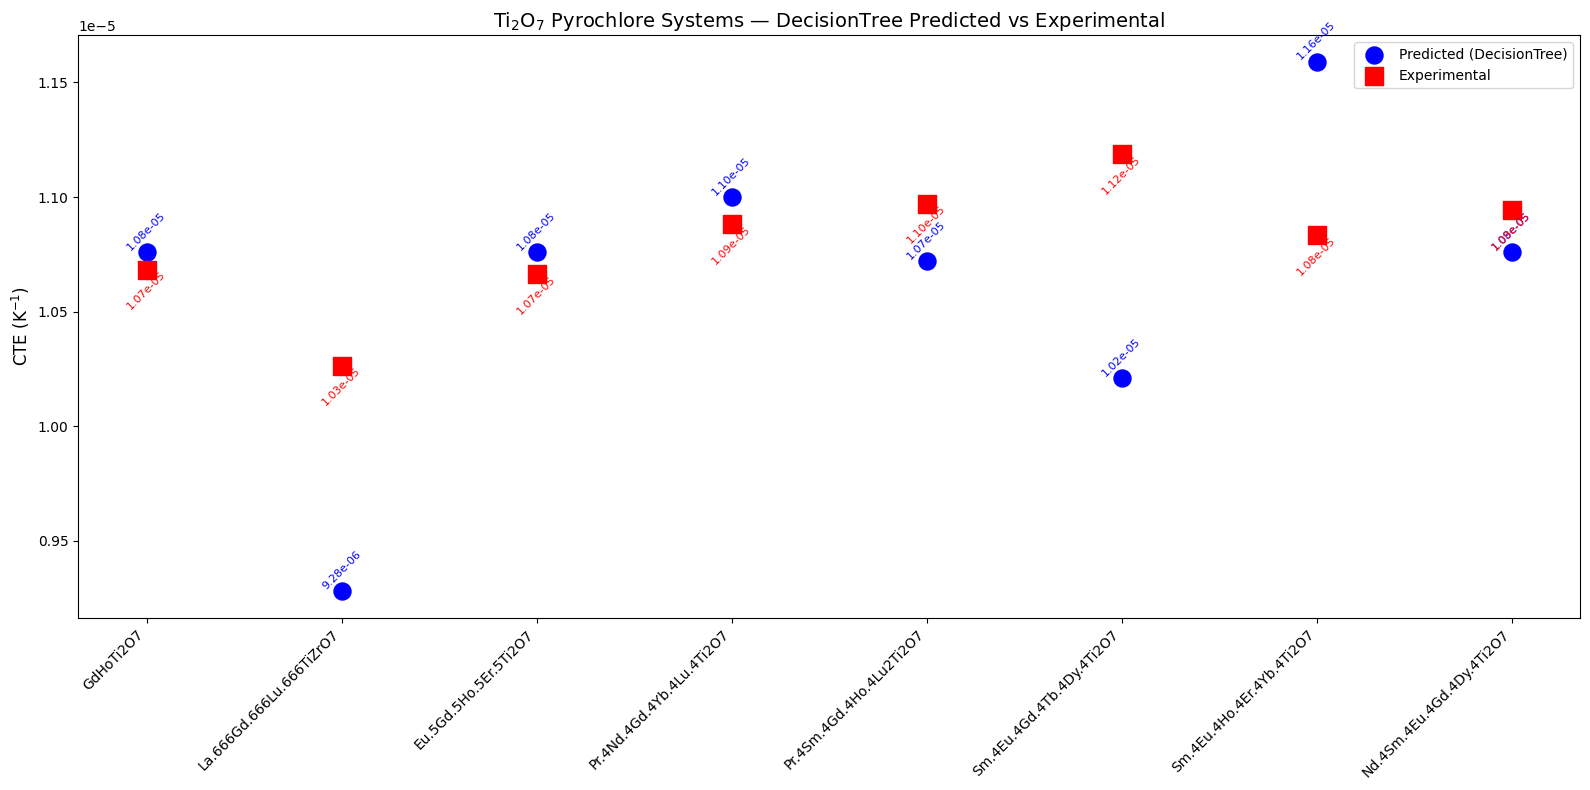

In [ ]:
import matplotlib.pyplot as plt
import re

# ---------------- Predicted Data (DecisionTree only; rows 15–22) ----------------
predicted_data = {
    "La.666Gd.666Lu.666TiZrO7": 9.28e-6,
    "Pr.4Nd.4Gd.4Yb.4Lu.4Ti2O7": 11.00e-6,
    "Pr.4Sm.4Gd.4Ho.4Lu2Ti2O7": 10.72e-6,
    "Sm.4Eu.4Gd.4Tb.4Dy.4Ti2O7": 10.21e-6,
    "Sm.4Eu.4Ho.4Er.4Yb.4Ti2O7": 11.59e-6,
    "Eu.5Gd.5Ho.5Er.5Ti2O7": 10.76e-6,
    "GdHoTi2O7": 10.76e-6,
    "Nd.4Sm.4Eu.4Gd.4Dy.4Ti2O7": 10.76e-6,
}

# ---------------- Experimental Data ----------------
experimental_data = {
    "[La/Gd/Lu]2[Ti/Zr]2O7": 10.26370957e-6,
    "[Pr/Nd/Gd/Yb/Lu]2Ti2O7": 10.8812864e-6,
    "[Pr/Sm/Gd/Ho/Lu]2Ti2O7": 10.97135822e-6,
    "[Sm/Eu/Gd/Tb/Dy]2Ti2O7": 11.18713217e-6,
    "[Sm/Eu/Ho/Er/Yb]2Ti2O7": 10.83446e-6,
    "[Eu/Gd/Ho/Er]2Ti2O7": 10.66338e-6,
    "[Gd/Ho]2Ti2O7": 10.68365e-6,
    "[Nd/Sm/Eu/Gd/Dy]2Ti2O7": 10.94286e-6,
}

# ---------------- Helpers ----------------
def count_unique_elements(formula: str) -> int:
    elements = re.findall(r'[A-Z][a-z]?', formula)
    return len(set(elements))

def map_key(key: str) -> str:
    return "".join(re.findall(r'[A-Z][a-z]?', key))

# Create unified dataset (map predicted + experimental)
combined = []
for pkey, pval in predicted_data.items():
    short = map_key(pkey)
    match = None
    for ekey, eval_ in experimental_data.items():
        if map_key(ekey) == short:
            match = eval_
            break
    combined.append((pkey, pval, match))

# Sort by compositional complexity
combined_sorted = sorted(combined, key=lambda x: count_unique_elements(x[0]))

# ---------------- Plotting ----------------
plt.figure(figsize=(16, 8))

labels = [c[0] for c in combined_sorted]
pred_vals = [c[1] for c in combined_sorted]
exp_vals = [c[2] for c in combined_sorted]

# Plot predicted (DecisionTree)
plt.scatter(range(len(pred_vals)), pred_vals, s=150, color="blue",
            label="Predicted (DecisionTree)", marker="o")
# Plot experimental
plt.scatter(range(len(exp_vals)), exp_vals, s=150, color="red",
            label="Experimental", marker="s")

# Annotate with values
for i, (p, e) in enumerate(zip(pred_vals, exp_vals)):
    plt.text(i, p, f"{p:.2e}", ha="center", va="bottom",
             fontsize=8, color="blue", rotation=45)
    if e is not None:
        plt.text(i, e, f"{e:.2e}", ha="center", va="top",
                 fontsize=8, color="red", rotation=45)

plt.xticks(range(len(labels)), labels, rotation=45, ha="right", fontsize=10)
plt.ylabel("CTE (K$^{-1}$)", fontsize=12)
plt.title("Ti$_2$O$_7$ Pyrochlore Systems — DecisionTree Predicted vs Experimental", fontsize=14)
plt.legend()
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()


# Your Turn

You're final dataset for model training will be the file "composition_features_pymatgen.csv"

# Structured Feature Family Analysis for Thermal Expansion (CTE)


Instead of throwing all descriptors into one black-box regressor, we:
1. Group features into physically meaningful families.
2. Reduce each family into a few underlying "axes" (latent factors).
3. Measure how strongly each family, and each latent axis, explains CTE.

This gives interpretability:
- Which chemical mechanism matters most?
- Is the relationship mostly linear or nonlinear?
- Which specific latent directions control expansion?

## Feature Families
We organize descriptors into distinct physics-based families:

### A. Ionic mismatch / packing frustration (`A_ionic`)
Captures local geometric stress and mass contrast between cations:
- `Avg Ionic Radius (Å)`
- `Ionic Size Mismatch (%)`
- `Atomic Mass Diff (%)`

These describe how badly the ions fit and how unbalanced the mass distribution is, which can influence lattice flexibility and vibrational response.

### B. Polyhedral coordination / oxidation environment (`B_poly`)
Encodes structural topology and site chemistry:
- Columns like `Ce3_oct`, `Zr4_tet`, `Ba2_multi`, etc.
  - cation identity
  - oxidation state guess
  - preferred coordination (octahedral / tetrahedral / multi-/12-fold)
This approximates which atoms live in which coordination sites (A site, B site, distorted site, etc.), which relates to bond stiffness and framework rigidity.

### C. Compositional chemistry from Magpie, split into subfamilies
Magpie descriptors summarize elemental properties across a composition (mean, range, max, etc.).  
We subdivide them by physical meaning:

- `C_atomic`: atomic number / atomic weight → mass / size baseline
- `C_bonding`: electronegativity, covalent radius, Mendeleev number → bonding / chemical preference
- `C_thermal`: melting temperature, boiling temperature → thermal stability / bond strength proxy
- `C_electronic`: valence electron counts, volume per atom, etc. → electronic / bonding character

We analyze these subfamilies separately so we can say things like:
> "Thermal expansion is more correlated with bonding descriptors than with pure atomic mass."

## Dimensionality Reduction per Family
Each family (A_ionic, B_poly, C_atomic, C_bonding, C_thermal, C_electronic, and also combos like A+B) can be high dimensional (especially B_poly and the Magpie groups).  
Instead of using raw dozens of features directly, we learn a *low-dimensional latent space* for each family.

We try multiple reduction methods:
- **PCA (Principal Component Analysis)**: linear, interpretable; we get loadings that tell us which physical features define each principal axis.
- **KernelPCA (RBF kernel)**: nonlinear manifold version of PCA to capture curved relationships.
- **PLSRegression (Partial Least Squares)**: supervised linear reduction; finds latent directions that are maximally correlated with CTE.
- **UMAP**: nonlinear manifold embedding that preserves both local chemistry neighborhoods and global trends. We can visualize UMAP to see if "high CTE" materials cluster in a particular chemistry region.

PCA and PLS are especially valuable because they are interpretable:
- PCA axis ~ "dominant variation in that physics family"
- PLS axis ~ "direction in this physics family that most strongly drives CTE directly"

## Regression and Scoring
For each family and each reduced representation, we:
1. Fit a regressor (RandomForestRegressor by default) using those latent components.
2. Predict CTE on a held-out test split.
3. Compute metrics in the original (unscaled) CTE units:
   - R²
   - RMSE
   - MSE

This lets us answer:
- Which physical family alone best explains CTE?
- Which chemistry subfamily in Magpie is most predictive (atomic / bonding / thermal / electronic)?
- Do nonlinear reductions (KernelPCA, UMAP) help over linear PCA/PLS?

## Interpretation
Finally, we extract:
- PCA loadings → which original physical descriptors define each principal axis.
- PLS coefficients → which direction in feature space most correlates with CTE.
- Feature importances / SHAP for the best model → which latent axes actually matter for prediction.

This moves us from:
"Random forest gives R² = 0.9"
to:
"CTE is controlled primarily by octahedral-site chemistry and size-mismatch strain, and the dominant latent axis combines ionic radius contrast with mixed-valence occupancy."

That's the scientific output.


Feature families and counts:
  A_ionic: 3 features
  B_poly: 74 features
  B_poly_agg: 3 features
  AplusB_structural: 77 features
  C_atomic: 18 features
  C_bonding: 30 features
  C_thermal: 6 features
  C_electronic: 42 features

Family: A_ionic (3 features)


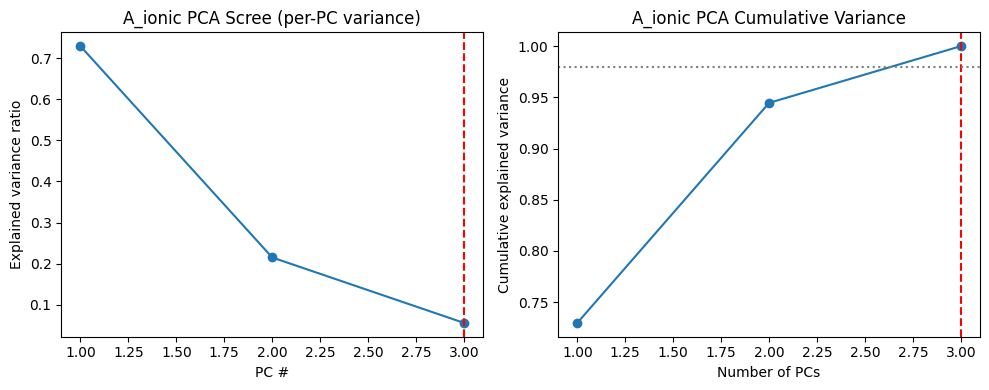

  chosen intrinsic dim (unsupervised PCA elbow): k = 3

  >> Reducer: PCA (latent dim target ~ 3)

  >> Reducer: KernelPCA_rbf (latent dim target ~ 3)

  >> Reducer: PLS (latent dim target ~ 3)

Family: B_poly (74 features)


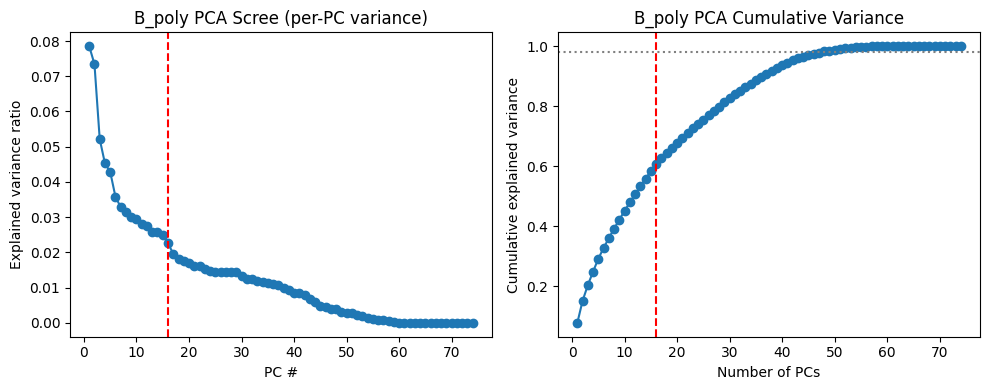

  chosen intrinsic dim (unsupervised PCA elbow): k = 16

  >> Reducer: PCA (latent dim target ~ 16)

  >> Reducer: KernelPCA_rbf (latent dim target ~ 16)

  >> Reducer: UMAP (latent dim target ~ 3)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



  >> Reducer: PLS (latent dim target ~ 16)

Family: B_poly_agg (3 features)


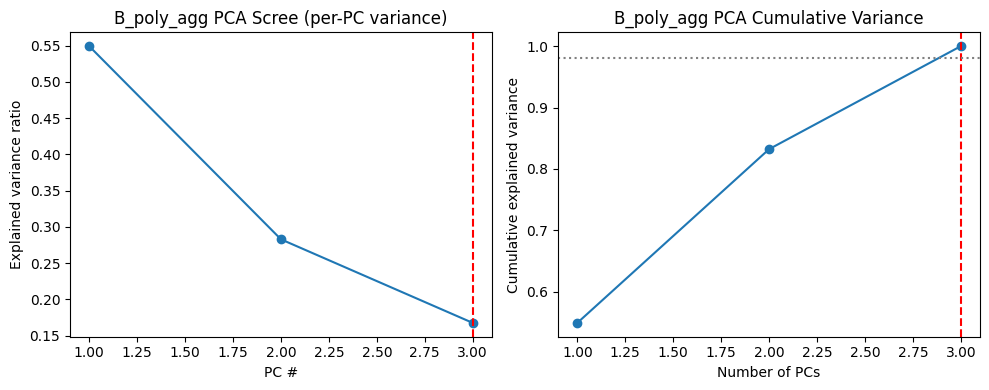

  chosen intrinsic dim (unsupervised PCA elbow): k = 3

  >> Reducer: PCA (latent dim target ~ 3)

  >> Reducer: KernelPCA_rbf (latent dim target ~ 3)

  >> Reducer: PLS (latent dim target ~ 3)

Family: AplusB_structural (77 features)


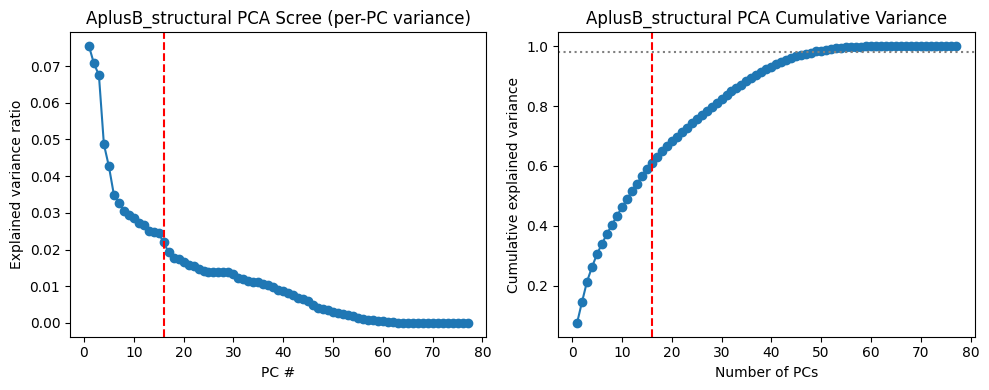

  chosen intrinsic dim (unsupervised PCA elbow): k = 16

  >> Reducer: PCA (latent dim target ~ 16)

  >> Reducer: KernelPCA_rbf (latent dim target ~ 16)

  >> Reducer: UMAP (latent dim target ~ 3)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



  >> Reducer: PLS (latent dim target ~ 16)

Family: C_atomic (18 features)


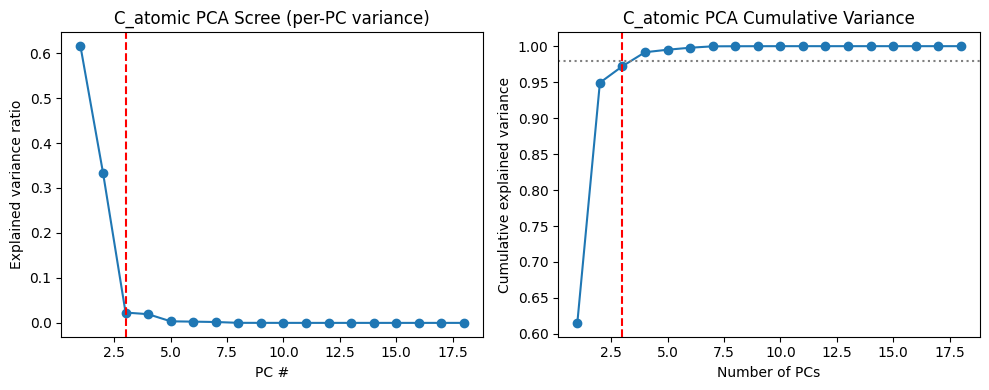

  chosen intrinsic dim (unsupervised PCA elbow): k = 3

  >> Reducer: PCA (latent dim target ~ 3)

  >> Reducer: KernelPCA_rbf (latent dim target ~ 3)

  >> Reducer: UMAP (latent dim target ~ 3)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



  >> Reducer: PLS (latent dim target ~ 3)

Family: C_bonding (30 features)


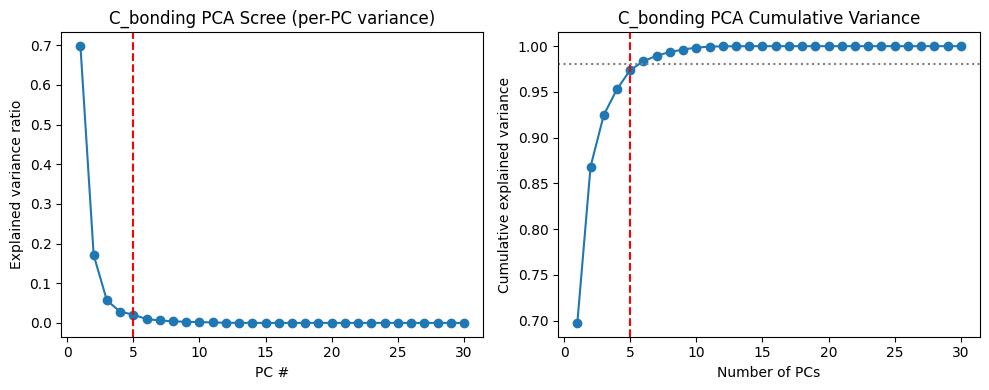

  chosen intrinsic dim (unsupervised PCA elbow): k = 5

  >> Reducer: PCA (latent dim target ~ 5)

  >> Reducer: KernelPCA_rbf (latent dim target ~ 5)

  >> Reducer: UMAP (latent dim target ~ 3)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



  >> Reducer: PLS (latent dim target ~ 5)

Family: C_thermal (6 features)


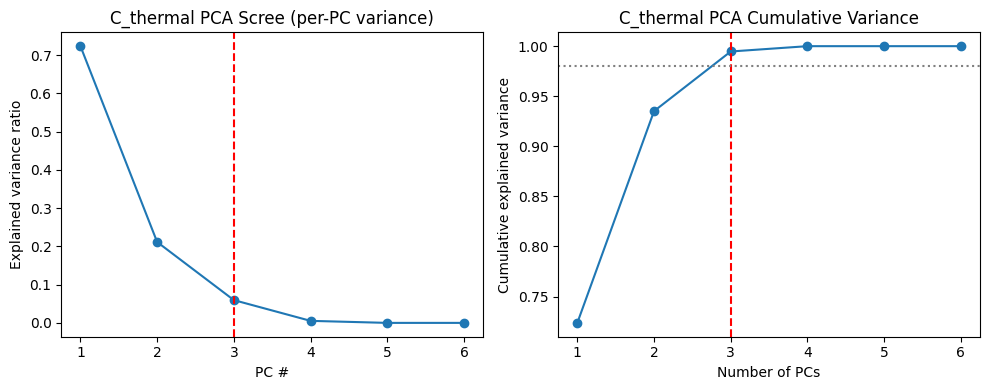

  chosen intrinsic dim (unsupervised PCA elbow): k = 3

  >> Reducer: PCA (latent dim target ~ 3)

  >> Reducer: KernelPCA_rbf (latent dim target ~ 3)

  >> Reducer: UMAP (latent dim target ~ 3)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



  >> Reducer: PLS (latent dim target ~ 3)

Family: C_electronic (42 features)


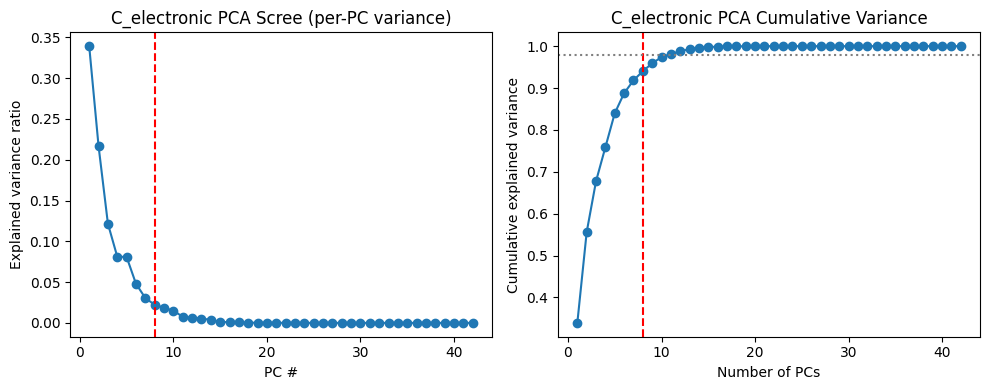

  chosen intrinsic dim (unsupervised PCA elbow): k = 8

  >> Reducer: PCA (latent dim target ~ 8)

  >> Reducer: KernelPCA_rbf (latent dim target ~ 8)

  >> Reducer: UMAP (latent dim target ~ 3)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



  >> Reducer: PLS (latent dim target ~ 8)


=== PERFORMANCE SUMMARY (by family × reducer) ===
               family        reducer  n_original_features  chosen_dim_k  \
21          C_bonding            PLS                   30             5   
19          C_bonding  KernelPCA_rbf                   30             5   
17           C_atomic            PLS                   18             3   
18          C_bonding            PCA                   30             5   
14           C_atomic            PCA                   18             3   
22          C_thermal            PCA                    6             3   
1             A_ionic  KernelPCA_rbf                    3             3   
25          C_thermal            PLS                    6             3   
23          C_thermal  KernelPCA_rbf                    6             3   
24          C_thermal           UMAP                    6             3   
29       C_electronic            PLS                   42             8   
26   

Avg Ionic Radius (Å)  Ionic Size Mismatch (%)  Atomic Mass Diff (%)
PC1             -0.592644                 0.635877              0.494401
PC2              0.507597                -0.181740              0.842209
PC3              0.625394                 0.750087             -0.215063


--- A_ionic | PLS (PLS) ---
PLS x_weights_ (directions in feature space that align with ↑CTE):


Avg Ionic Radius (Å)  Ionic Size Mismatch (%)  Atomic Mass Diff (%)
PLScomp1             -0.639878                 0.692303              0.333575
PLScomp2              0.151945                -0.311527              0.938011
PLScomp3              0.753305                 0.650897              0.094147


--- B_poly | PCA (PCA) ---
Explained variance ratio per PC: [0.079 0.073 0.052 0.045 0.043 0.036 0.033 0.031 0.03  0.029 0.028 0.028
 0.026 0.026 0.025 0.023]


Al3_oct   Al3_tet   Ba2_oct   Be3_oct  Ca2_multi   Ca2_oct  Ce-22_oct  \
PC1 -0.023751 -0.015022  0.000934 -0.001928  -0.005429  0.005612  -0.215681   
PC2  0.002863 -0.071324 -0.017675 -0.004908  -0.023422 -0.033149   0.346147   
PC3 -0.127090  0.155080 -0.058726 -0.070794   0.006794 -0.167714   0.094875   
PC4  0.374775  0.136512 -0.102386  0.114642  -0.046306 -0.280751  -0.046579   
PC5  0.109794  0.154515  0.088182  0.014705  -0.033533  0.254404   0.056605   

     Ce3_multi   Ce3_oct  Ce4_multi  ...    U6_oct  Y3_multi    Y3_oct  \
PC1  -0.013513 -0.016329  -0.022021  ... -0.020400 -0.017694 -0.177744   
PC2  -0.041024 -0.010194  -0.074985  ...  0.020967 -0.084756  0.249237   
PC3   0.036016  0.002282   0.135064  ... -0.030473  0.174336  0.001734   
PC4  -0.071267 -0.032436  -0.052801  ... -0.012532  0.070748  0.048442   
PC5  -0.190836 -0.099584  -0.131866  ... -0.013200  0.128769  0.012670   

      Yb2_oct  Yb3_multi   Yb3_oct  Zr4_multi   Zr4_oct   Zr6_oct   Zr7_oct  
PC1 -0.008694  -0.018379 -0.202515  -0.004252  0.005065 -0.008115 -0.011969  
PC2 -0.007712  -0.079202  0.276071  -0.027289 -0.092117  0.004199  0.001917  
PC3 -0.004011   0.120217  0.043710   0.032423 -0.069086 -0.018070 -0.003369  
PC4 -0.013467   0.055977  0.005523   0.022558 -0.267229 -0.000718  0.001486  
PC5 -0.054084   0.048549  0.003327   0.074765  0.219101 -0.010311 -0.017103  

[5 rows x 74 columns]


--- B_poly | PLS (PLS) ---
PLS x_weights_ (directions in feature space that align with ↑CTE):


Al3_oct   Al3_tet   Ba2_oct   Be3_oct  Ca2_multi   Ca2_oct  \
PLScomp1  0.184212  0.005000  0.121303  0.097245  -0.025947  0.252153   
PLScomp2 -0.006489  0.092677  0.057260  0.041292  -0.017741 -0.007725   
PLScomp3 -0.098401  0.161276 -0.006928  0.001464   0.043660 -0.144419   
PLScomp4 -0.087237  0.063437 -0.066896 -0.023218   0.063353 -0.042996   
PLScomp5 -0.075908  0.150563 -0.127527 -0.108270   0.016504  0.034982   

          Ce-22_oct  Ce3_multi   Ce3_oct  Ce4_multi  ...    U6_oct  Y3_multi  \
PLScomp1  -0.029716  -0.038202 -0.003819  -0.080424  ...  0.000303 -0.051464   
PLScomp2   0.048729   0.020132  0.060929   0.126121  ...  0.003094 -0.003502   
PLScomp3   0.003444   0.078720  0.137545   0.286203  ...  0.069319  0.067534   
PLScomp4  -0.244699  -0.039617  0.095079   0.037377  ...  0.136571 -0.029003   
PLScomp5   0.169685  -0.036010 -0.011545  -0.170090  ...  0.049081  0.148450   

            Y3_oct   Yb2_oct  Yb3_multi   Yb3_oct  Zr4_multi   Zr4_oct  \
PLScomp1  0.005099 -0.019570  -0.044178 -0.011862  -0.040441  0.194159   
PLScomp2  0.035845 -0.002016  -0.003142  0.102556  -0.093246  0.065933   
PLScomp3  0.119288  0.055180   0.083367  0.234237  -0.052712  0.048804   
PLScomp4  0.112388  0.072016  -0.015387  0.173041   0.044451  0.078301   
PLScomp5  0.374505  0.013708   0.040930  0.382352   0.177870  0.031720   

           Zr6_oct   Zr7_oct  
PLScomp1 -0.041600 -0.029571  
PLScomp2 -0.096475 -0.050228  
PLScomp3 -0.053989 -0.020107  
PLScomp4  0.068067 -0.001089  
PLScomp5  0.138009  0.004814  

[5 rows x 74 columns]


--- B_poly_agg | PCA (PCA) ---
Explained variance ratio per PC: [0.549 0.283 0.168]


poly_total_oct  poly_total_tet  poly_total_multi
PC1       -0.532317        0.531641          0.658785
PC2        0.706264        0.707948         -0.000634
PC3        0.466722       -0.464939          0.752331


--- B_poly_agg | PLS (PLS) ---
PLS x_weights_ (directions in feature space that align with ↑CTE):


poly_total_oct  poly_total_tet  poly_total_multi
PLScomp1        0.878954       -0.098047         -0.466718
PLScomp2        0.376444        0.743472          0.552756
PLScomp3        0.292796       -0.661540          0.690388


--- AplusB_structural | PCA (PCA) ---
Explained variance ratio per PC: [0.075 0.071 0.068 0.049 0.043 0.035 0.033 0.031 0.029 0.028 0.027 0.027
 0.025 0.025 0.024 0.022]


Avg Ionic Radius (Å)  Ionic Size Mismatch (%)  Atomic Mass Diff (%)  \
PC1              0.009002                 0.021687              0.044250   
PC2              0.090919                -0.113811             -0.022967   
PC3              0.398035                -0.358435             -0.253824   
PC4              0.014224                 0.088024              0.239705   
PC5             -0.020160                 0.015585              0.047415   

      Al3_oct   Al3_tet   Ba2_oct   Be3_oct  Ca2_multi   Ca2_oct  Ce-22_oct  \
PC1 -0.014462 -0.008419  0.003268 -0.000285  -0.005642  0.007223  -0.213950   
PC2 -0.047724 -0.077849 -0.028732 -0.026819  -0.017464 -0.059812   0.344059   
PC3 -0.246221 -0.037511 -0.054939 -0.095660   0.029136 -0.118052  -0.047185   
PC4  0.127377  0.283379 -0.027052 -0.005282  -0.020624 -0.125760   0.075537   
PC5 -0.244978  0.002095  0.134673 -0.090239   0.019886  0.362741   0.077500   

     ...    U6_oct  Y3_multi    Y3_oct   Yb2_oct  Yb3_multi   Yb3_oct  \
PC1  ... -0.021530 -0.014589 -0.173485 -0.009863  -0.015301 -0.199596   
PC2  ...  0.027983 -0.078319  0.237181 -0.000391  -0.074106  0.271833   
PC3  ...  0.028671  0.030937 -0.092803  0.034581   0.023493 -0.057475   
PC4  ... -0.049527  0.235091  0.045803 -0.033374   0.165953  0.049788   
PC5  ... -0.007387  0.034590 -0.027484 -0.021117   0.000241  0.003650   

     Zr4_multi   Zr4_oct   Zr6_oct   Zr7_oct  
PC1  -0.002452  0.007530 -0.008137 -0.011972  
PC2  -0.027287 -0.105057  0.005025  0.003391  
PC3  -0.004251 -0.053996  0.002926  0.007119  
PC4   0.073199 -0.041172 -0.019072 -0.007905  
PC5   0.027762  0.343310 -0.007713 -0.011439  

[5 rows x 77 columns]


--- AplusB_structural | PLS (PLS) ---
PLS x_weights_ (directions in feature space that align with ↑CTE):


Avg Ionic Radius (Å)  Ionic Size Mismatch (%)  Atomic Mass Diff (%)  \
PLScomp1             -0.386315                 0.417965              0.201390   
PLScomp2              0.123275                 0.190140              0.005186   
PLScomp3              0.182693                 0.317811              0.240037   
PLScomp4              0.117125                 0.300514              0.168816   
PLScomp5             -0.301132                -0.137271              0.206066   

           Al3_oct   Al3_tet   Ba2_oct   Be3_oct  Ca2_multi   Ca2_oct  \
PLScomp1  0.146851  0.003986  0.096702  0.077522  -0.020685  0.201013   
PLScomp2 -0.238796 -0.099150  0.050008 -0.062962  -0.020032  0.049166   
PLScomp3  0.005867  0.171490 -0.102551 -0.032678  -0.026910 -0.258937   
PLScomp4 -0.123891  0.005251 -0.087164 -0.047050  -0.019914  0.010526   
PLScomp5  0.358569  0.066340  0.103114  0.101856  -0.018006 -0.151915   

          Ce-22_oct  ...    U6_oct  Y3_multi    Y3_oct   Yb2_oct  Yb3_multi  \
PLScomp1  -0.023689  ...  0.000241 -0.041026  0.004065 -0.015601  -0.035218   
PLScomp2   0.056040  ...  0.110145 -0.087998 -0.034912  0.055002  -0.093681   
PLScomp3  -0.082904  ...  0.079985  0.093411  0.070500  0.072677   0.071379   
PLScomp4  -0.087391  ... -0.001502 -0.028212  0.051752  0.019296  -0.057242   
PLScomp5  -0.030950  ...  0.054030 -0.006669 -0.080978  0.010039   0.049415   

           Yb3_oct  Zr4_multi   Zr4_oct   Zr6_oct   Zr7_oct  
PLScomp1 -0.009456  -0.032239  0.154781 -0.033163 -0.023573  
PLScomp2  0.062464  -0.125155  0.085668 -0.093764 -0.053537  
PLScomp3  0.165037   0.008425 -0.116327 -0.029643 -0.027290  
PLScomp4  0.091027   0.045958 -0.007213  0.035771 -0.049003  
PLScomp5 -0.096890  -0.088912 -0.052744 -0.072419  0.071580  

[5 rows x 77 columns]


--- C_atomic | PCA (PCA) ---
Explained variance ratio per PC: [0.615 0.334 0.023]


MagpieData minimum Number  MagpieData maximum Number  \
PC1                   0.285304                  -0.066709   
PC2                   0.122433                   0.384464   
PC3                  -0.057389                  -0.378648   

     MagpieData range Number  MagpieData mean Number  \
PC1                -0.239404                0.212464   
PC2                 0.234230                0.277547   
PC3                -0.271660                0.223961   

     MagpieData avg_dev Number  MagpieData mode Number  \
PC1                  -0.215340                0.288697   
PC2                   0.263056                0.108813   
PC3                   0.317288               -0.044202   

     MagpieData minimum AtomicWeight  MagpieData maximum AtomicWeight  \
PC1                         0.286221                        -0.067813   
PC2                         0.118733                         0.383191   
PC3                        -0.054726                        -0.384510   

     MagpieData range AtomicWeight  MagpieData mean AtomicWeight  \
PC1                      -0.233825                      0.211582   
PC2                       0.242981                      0.278112   
PC3                      -0.283827                      0.224451   

     MagpieData avg_dev AtomicWeight  MagpieData mode AtomicWeight  \
PC1                        -0.211608                      0.288531   
PC2                         0.267393                      0.108878   
PC3                         0.312060                     -0.045186   

     MagpieData minimum CovalentRadius  MagpieData maximum CovalentRadius  \
PC1                           0.288181                          -0.046786   
PC2                           0.106917                           0.354414   
PC3                          -0.029282                           0.075478   

     MagpieData range CovalentRadius  MagpieData mean CovalentRadius  \
PC1                        -0.280837                        0.234013   
PC2                         0.101680                        0.236543   
PC3                         0.067700                        0.254118   

     MagpieData avg_dev CovalentRadius  MagpieData mode CovalentRadius  
PC1                          -0.257042                        0.288181  
PC2                           0.169788                        0.106917  
PC3                           0.411066                       -0.029282


--- C_atomic | PLS (PLS) ---
PLS x_weights_ (directions in feature space that align with ↑CTE):


MagpieData minimum Number  MagpieData maximum Number  \
PLScomp1                   0.192847                   0.350480   
PLScomp2                  -0.207292                   0.113907   
PLScomp3                   0.195742                  -0.176310   

          MagpieData range Number  MagpieData mean Number  \
PLScomp1                 0.160854                0.328498   
PLScomp2                 0.227322               -0.095537   
PLScomp3                -0.270737                0.193758   

          MagpieData avg_dev Number  MagpieData mode Number  \
PLScomp1                   0.206259                0.180007   
PLScomp2                   0.266472               -0.215729   
PLScomp3                  -0.059943                0.188631   

          MagpieData minimum AtomicWeight  MagpieData maximum AtomicWeight  \
PLScomp1                         0.190873                         0.347350   
PLScomp2                        -0.201681                         0.106177   
PLScomp3                         0.225365                        -0.210324   

          MagpieData range AtomicWeight  MagpieData mean AtomicWeight  \
PLScomp1                       0.168551                      0.328900   
PLScomp2                       0.213026                     -0.094282   
PLScomp3                      -0.313820                      0.194631   

          MagpieData avg_dev AtomicWeight  MagpieData mode AtomicWeight  \
PLScomp1                         0.208336                      0.181527   
PLScomp2                         0.248234                     -0.207757   
PLScomp3                        -0.121948                      0.219753   

          MagpieData minimum CovalentRadius  \
PLScomp1                           0.158954   
PLScomp2                          -0.315136   
PLScomp3                          -0.208525   

          MagpieData maximum CovalentRadius  MagpieData range CovalentRadius  \
PLScomp1                           0.329270                         0.041724   
PLScomp2                           0.100848                         0.334619   
PLScomp3                          -0.131120                         0.111855   

          MagpieData mean CovalentRadius  MagpieData avg_dev CovalentRadius  \
PLScomp1                        0.285327                           0.138257   
PLScomp2                       -0.168888                           0.453232   
PLScomp3                        0.026789                           0.607161   

          MagpieData mode CovalentRadius  
PLScomp1                        0.158954  
PLScomp2                       -0.315136  
PLScomp3                       -0.208525


--- C_bonding | PCA (PCA) ---
Explained variance ratio per PC: [0.697 0.171 0.056 0.028 0.021]


MagpieData minimum MendeleevNumber  MagpieData maximum MendeleevNumber  \
PC1                           -0.042175                            0.215821   
PC2                           -0.284065                           -0.041187   
PC3                            0.512716                            0.033041   
PC4                           -0.054154                            0.000610   
PC5                            0.116500                           -0.009899   

     MagpieData range MendeleevNumber  MagpieData mean MendeleevNumber  \
PC1                          0.182083                         0.180932   
PC2                          0.148766                        -0.217992   
PC3                         -0.298285                        -0.035801   
PC4                          0.034461                        -0.089696   
PC5                         -0.080325                         0.241849   

     MagpieData avg_dev MendeleevNumber  MagpieData mode MendeleevNumber  \
PC1                            0.146318                         0.215821   
PC2                            0.285501                        -0.041187   
PC3                            0.101770                         0.033041   
PC4                            0.049028                         0.000610   
PC5                           -0.347035                        -0.009899   

     MagpieData minimum Row  MagpieData maximum Row  MagpieData range Row  \
PC1               -0.217233               -0.010447              0.170836   
PC2                0.036202                0.393751              0.239598   
PC3               -0.022140                0.171810              0.135628   
PC4                0.020030                0.043260              0.013171   
PC5                0.029690                0.422284              0.264445   

     MagpieData mean Row  ...  MagpieData range Electronegativity  \
PC1            -0.185860  ...                            0.215098   
PC2             0.211128  ...                            0.012167   
PC3             0.101740  ...                           -0.107723   
PC4             0.093938  ...                           -0.030252   
PC5            -0.066751  ...                           -0.058083   

     MagpieData mean Electronegativity  MagpieData avg_dev Electronegativity  \
PC1                           0.203496                              0.204845   
PC2                          -0.121430                              0.098897   
PC3                          -0.041284                              0.123783   
PC4                          -0.146897                              0.063039   
PC5                           0.166261                             -0.222571   

     MagpieData mode Electronegativity  MagpieData minimum SpaceGroupNumber  \
PC1                           0.217308                            -0.216178   
PC2                          -0.037131                             0.040353   
PC3                           0.024119                             0.009084   
PC4                          -0.016707                             0.058804   
PC5                          -0.026317                             0.004364   

     MagpieData maximum SpaceGroupNumber  MagpieData range SpaceGroupNumber  \
PC1                             0.092423                           0.211478   
PC2                            -0.136086                          -0.069611   
PC3                            -0.178199                          -0.053092   
PC4                             0.837850                           0.161325   
PC5                             0.284366                           0.068318   

     MagpieData mean SpaceGroupNumber  MagpieData avg_dev SpaceGroupNumber  \
PC1                         -0.192981                             0.183666   
PC2                          0.039497                            -0.052714   
PC3                          0.134765                             0.202095   
PC4    


--- C_bonding | PLS (PLS) ---
PLS x_weights_ (directions in feature space that align with ↑CTE):


MagpieData minimum MendeleevNumber  \
PLScomp1                           -0.074921   
PLScomp2                           -0.053273   
PLScomp3                            0.479306   
PLScomp4                           -0.246684   
PLScomp5                           -0.263361   

          MagpieData maximum MendeleevNumber  \
PLScomp1                           -0.139030   
PLScomp2                            0.177660   
PLScomp3                            0.099015   
PLScomp4                            0.166390   
PLScomp5                           -0.216693   

          MagpieData range MendeleevNumber  MagpieData mean MendeleevNumber  \
PLScomp1                         -0.053160                        -0.268202   
PLScomp2                          0.161544                         0.037573   
PLScomp3                         -0.229735                         0.123840   
PLScomp4                          0.274927                         0.261372   
PLScomp5                          0.009236                        -0.344744   

          MagpieData avg_dev MendeleevNumber  MagpieData mode MendeleevNumber  \
PLScomp1                            0.158023                        -0.139030   
PLScomp2                            0.304080                         0.177660   
PLScomp3                           -0.011581                         0.099015   
PLScomp4                            0.022499                         0.166390   
PLScomp5                           -0.059622                        -0.216693   

          MagpieData minimum Row  MagpieData maximum Row  \
PLScomp1                0.162841                0.350058   
PLScomp2               -0.146229                0.255119   
PLScomp3                0.036451                0.008172   
PLScomp4                0.100345               -0.037794   
PLScomp5               -0.056719               -0.000325   

          MagpieData range Row  MagpieData mean Row  ...  \
PLScomp1              0.105964             0.303058  ...   
PLScomp2              0.294264             0.001658  ...   
PLScomp3             -0.024276             0.042821  ...   
PLScomp4             -0.108057            -0.036729  ...   
PLScomp5              0.046248             0.060280  ...   

          MagpieData range Electronegativity  \
PLScomp1                           -0.148675   
PLScomp2                            0.144375   
PLScomp3                           -0.116997   
PLScomp4                            0.048033   
PLScomp5                            0.010194   

          MagpieData mean Electronegativity  \
PLScomp1                          -0.235140   
PLScomp2                           0.072556   
PLScomp3                          -0.042142   
PLScomp4                           0.038453   
PLScomp5                          -0.173913   

          MagpieData avg_dev Electronegativity  \
PLScomp1                             -0.010864   
PLScomp2                              0.259829   
PLScomp3                              0.079051   
PLScomp4                              0.002505   
PLScomp5                             -0.037618   

          MagpieData mode Electronegativity  \
PLScomp1                          -0.159142   
PLScomp2                           0.151644   
PLScomp3                          -0.013983   
PLScomp4                          -0.056557   
PLScomp5                           0.012015   

          MagpieData minimum SpaceGroupNumber  \
PLScomp1                             0.190289   
PLScomp2                            -0.111461   
PLScomp3                             0.147268   
PLScomp4                             0.264438   
PLScomp5                            -0.228283   

          MagpieData maximum SpaceGroupNumber  \
PLScomp1                            -0.087115   
PLScomp2                             0.094115   
PLScomp3                             0.387288   
PLScomp4                             0.483024   
PLScomp5                             0.607400   

  


--- C_thermal | PCA (PCA) ---
Explained variance ratio per PC: [0.724 0.211 0.06 ]


MagpieData minimum MeltingT  MagpieData maximum MeltingT  \
PC1                     0.456217                    -0.298724   
PC2                     0.261061                     0.657911   
PC3                    -0.110995                    -0.420524   

     MagpieData range MeltingT  MagpieData mean MeltingT  \
PC1                  -0.442540                  0.355068   
PC2                   0.319339                  0.531789   
PC3                  -0.233039                  0.479802   

     MagpieData avg_dev MeltingT  MagpieData mode MeltingT  
PC1                    -0.415427                  0.456217  
PC2                     0.214641                  0.261061  
PC3                     0.716940                 -0.110995


--- C_thermal | PLS (PLS) ---
PLS x_weights_ (directions in feature space that align with ↑CTE):


MagpieData minimum MeltingT  MagpieData maximum MeltingT  \
PLScomp1                     0.455591                    -0.108547   
PLScomp2                    -0.173244                     0.265736   
PLScomp3                     0.235298                     0.786545   

          MagpieData range MeltingT  MagpieData mean MeltingT  \
PLScomp1                  -0.310840                  0.689923   
PLScomp2                   0.273259                  0.418592   
PLScomp3                   0.421538                 -0.006718   

          MagpieData avg_dev MeltingT  MagpieData mode MeltingT  
PLScomp1                    -0.021796                  0.455591  
PLScomp2                     0.787063                 -0.173244  
PLScomp3                    -0.304757                  0.235298


--- C_electronic | PCA (PCA) ---
Explained variance ratio per PC: [0.339 0.217 0.122 0.081 0.081 0.048 0.031 0.022]


MagpieData minimum NsValence  MagpieData maximum NsValence  \
PC1                     -0.019085                  6.938894e-17   
PC2                     -0.191024                  1.110223e-16   
PC3                      0.142621                 -0.000000e+00   
PC4                     -0.405949                 -0.000000e+00   
PC5                     -0.079115                 -2.775558e-17   

     MagpieData range NsValence  MagpieData mean NsValence  \
PC1                    0.019085                  -0.014054   
PC2                    0.191024                  -0.167720   
PC3                   -0.142621                   0.155919   
PC4                    0.405949                  -0.431855   
PC5                    0.079115                  -0.034785   

     MagpieData avg_dev NsValence  MagpieData mode NsValence  \
PC1                      0.014563               0.000000e+00   
PC2                      0.170079              -1.387779e-17   
PC3                     -0.156611               3.330669e-16   
PC4                      0.434562              -1.110223e-16   
PC5                      0.038057               0.000000e+00   

     MagpieData minimum NpValence  MagpieData maximum NpValence  \
PC1                     -0.009437                      0.270581   
PC2                      0.064276                      0.021896   
PC3                     -0.028853                     -0.052458   
PC4                     -0.120264                     -0.037909   
PC5                     -0.036414                      0.027093   

     MagpieData range NpValence  MagpieData mean NpValence  ...  \
PC1                    0.268861                   0.241574  ...   
PC2                    0.009215                   0.123430  ...   
PC3                   -0.046208                  -0.078302  ...   
PC4                   -0.014222                  -0.093686  ...   
PC5                    0.033760                   0.048887  ...   

     MagpieData range GSvolume_pa  MagpieData mean GSvolume_pa  \
PC1                      0.205669                    -0.230645   
PC2                     -0.056777                    -0.106509   
PC3                      0.151745                     0.108040   
PC4                     -0.071197                     0.045903   
PC5                      0.183554                    -0.059570   

     MagpieData avg_dev GSvolume_pa  MagpieData mode GSvolume_pa  \
PC1                        0.198364                    -0.267072   
PC2                       -0.139582                    -0.017291   
PC3                        0.086828                     0.065885   
PC4                       -0.018374                     0.042641   
PC5                        0.049709                    -0.053097   

     MagpieData minimum GSbandgap  MagpieData maximum GSbandgap  \
PC1                           0.0                      0.034268   
PC2                          -0.0                      0.276203   
PC3                          -0.0                     -0.079048   
PC4                          -0.0                     -0.162561   
PC5                           0.0                      0.136247   

     MagpieData range GSbandgap  MagpieData mean GSbandgap  \
PC1                    0.034268                   0.028761   
PC2                    0.276203                   0.292683   
PC3                   -0.079048                  -0.068949   
PC4                   -0.162561                  -0.159501   
PC5                    0.136247                   0.132951   

     MagpieData avg_dev GSbandgap  MagpieData mode GSbandgap  
PC1                      0.030282                        0.0  
PC2                      0.290265                       -0.0  
PC3                     -0.069447                       -0.0  
PC4                     -0.158716                       -0.0  
PC5                      0.136706                        0.0  

[5 rows x 42 columns]


--- C_electronic | PLS (PLS) ---
PLS x_weights_ (directions in feature space that align with ↑CTE):


MagpieData minimum NsValence  MagpieData maximum NsValence  \
PLScomp1                     -0.153564                          -0.0   
PLScomp2                     -0.076299                           0.0   
PLScomp3                      0.249026                          -0.0   
PLScomp4                      0.198071                          -0.0   
PLScomp5                     -0.048154                           0.0   

          MagpieData range NsValence  MagpieData mean NsValence  \
PLScomp1                    0.153564                  -0.152619   
PLScomp2                    0.076299                   0.008233   
PLScomp3                   -0.249026                   0.075346   
PLScomp4                   -0.198071                  -0.108755   
PLScomp5                    0.048154                   0.410299   

          MagpieData avg_dev NsValence  MagpieData mode NsValence  \
PLScomp1                      0.152820                       -0.0   
PLScomp2                      0.000172                        0.0   
PLScomp3                     -0.092785                       -0.0   
PLScomp4                      0.077969                       -0.0   
PLScomp5                     -0.366706                        0.0   

          MagpieData minimum NpValence  MagpieData maximum NpValence  \
PLScomp1                      0.064073                      0.122093   
PLScomp2                     -0.041441                      0.233692   
PLScomp3                     -0.015132                      0.061824   
PLScomp4                     -0.077068                     -0.125337   
PLScomp5                      0.064207                      0.006535   

          MagpieData range NpValence  MagpieData mean NpValence  ...  \
PLScomp1                    0.108141                   0.208066  ...   
PLScomp2                    0.238626                   0.176140  ...   
PLScomp3                    0.063934                   0.018703  ...   
PLScomp4                   -0.108836                  -0.173713  ...   
PLScomp5                   -0.005932                   0.106263  ...   

          MagpieData range GSvolume_pa  MagpieData mean GSvolume_pa  \
PLScomp1                     -0.014672                    -0.201341   
PLScomp2                      0.285905                    -0.121435   
PLScomp3                     -0.019210                    -0.119310   
PLScomp4                      0.065596                    -0.025341   
PLScomp5                      0.001075                     0.212878   

          MagpieData avg_dev GSvolume_pa  MagpieData mode GSvolume_pa  \
PLScomp1                       -0.095821                    -0.120096   
PLScomp2                        0.340156                    -0.216887   
PLScomp3                       -0.102291                    -0.095009   
PLScomp4                       -0.228951                     0.040499   
PLScomp5                        0.193718                     0.154933   

          MagpieData minimum GSbandgap  MagpieData maximum GSbandgap  \
PLScomp1                          -0.0                      0.291891   
PLScomp2                           0.0                     -0.121969   
PLScomp3                          -0.0                      0.041829   
PLScomp4                          -0.0                      0.038907   
PLScomp5                           0.0                      0.085867   

          MagpieData range GSbandgap  MagpieData mean GSbandgap  \
PLScomp1                    0.291891                   0.300199   
PLScomp2                   -0.121969                  -0.118798   
PLScomp3                    0.041829                   0.020392   
PLScomp4                    0.038907                   0.061082   
PLScomp5                    0.085867                   0.035680   

          MagpieData avg_dev GSbandgap  MagpieData mode GSbandgap  
PLScomp1                      0.299332                       -0.0  
PLScomp2                     -0.119541                 

In [12]:
"""
==============================================================
PHYSICS-AWARE FEATURE FAMILY ANALYSIS FOR CTE
with automatic dimensionality selection and visualization
==============================================================

High-level idea:
---------------
We are using physically meaningful feature families (ionic mismatch,
coordination environment, chemistry subfamilies from Magpie) to
understand what drives thermal expansion (CTE).

We:
  1. Split features into physics-based families:
     - A_ionic (packing/mismatch)
     - B_poly (coordination + oxidation per site)
     - B_poly_aggregated (just oct/tet/multi totals = topology only)
     - AplusB_structural (A_ionic + B_poly)
     - C_atomic / C_bonding / C_thermal / C_electronic (Magpie subfamilies)
  2. For each family, we standardize its features and estimate its
     "intrinsic dimensionality" using PCA.
     - We do a scree analysis ("elbow rule"): take the smallest
       number of PCs such that adding another PC gives < 5% incremental
       explained variance gain OR we've explained >= 95% cumulative variance.
  3. We fit unsupervised reducers (PCA, KernelPCA, UMAP) with that
     chosen intrinsic dimension, and we also fit a supervised reducer (PLS).
  4. On each reduced latent space, we train a RandomForestRegressor on
     TRAIN data, predict on TEST, and score (R², RMSE, MSE) in real CTE units.
  5. We visualize:
     - Scree / cumulative variance curves for PCA
     - 2D embeddings (PCA first 2 comps, UMAP 2D) colored by CTE
  6. We report a summary table and interpretable loadings:
     - PCA loadings: which original descriptors define PC1, PC2, ...
     - PLS weights: which original descriptors align with higher CTE

This gives you:
- Which family (ionic / polyhedral / chemistry-subfamily) is most predictive
- Whether structure topology alone (oct vs tet vs multi) is enough
- How many latent axes you actually need per physics family
- Physical interpretation of those axes
==============================================================
"""

# -----------------------
# Imports
# -----------------------

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_decomposition import PLSRegression
import umap.umap_ as umap

# -----------------------
# CONFIG
# -----------------------

TARGET_COL = "CTE Value"
TEST_SIZE = 0.2
RANDOM_STATE = 42

# thresholds for unsupervised dimension choice
CUM_VAR_TARGET = 0.98         # stop if cumulative explained variance ≥ 95%
MIN_GAIN_FRAC = 0.02          # elbow cutoff: if next PC adds <5% of total variance, we stop adding more

# visualization config
MAKE_PLOTS = True

# -----------------------
# LOAD DATA
# -----------------------

df = pd.read_csv("composition_features_pymatgen.csv")

if TARGET_COL not in df.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found. Please ensure CTE is in the dataframe.")

y_raw = df[TARGET_COL].values.astype(float)  # CTE in real units

# Drop obvious non-feature columns
NON_FEATURE_COLS = {
    TARGET_COL,
    "Composition", "Composition_clean", "normalized", "pretty_formula",
    "input", "Unnamed: 0"
}
full_numeric = df.drop(columns=[c for c in df.columns if c in NON_FEATURE_COLS], errors="ignore")
full_numeric = full_numeric.select_dtypes(include=[np.number]).copy()

# -----------------------
# DEFINE FEATURE FAMILIES
# -----------------------

# A_ionic family: packing / mismatch descriptors
A_IONIC_COLS = [
    "Avg Ionic Radius (Å)",
    "Ionic Size Mismatch (%)",
    "Atomic Mass Diff (%)",
]
A_IONIC_COLS = [c for c in A_IONIC_COLS if c in full_numeric.columns]

# B_poly family: site occupancy per element/oxidation/coordination
B_POLY_COLS = [
    c for c in full_numeric.columns
    if (c.endswith("_oct") or c.endswith("_tet") or c.endswith("_multi"))
]

# B_poly_aggregated: just overall occupancy by coordination type
# This reduces dimensionality by collapsing per-element info
def sum_cols_with_suffix(df_block, suffix):
    cols = [c for c in df_block.columns if c.endswith(suffix)]
    return df_block[cols].sum(axis=1) if len(cols) > 0 else pd.Series(0, index=df_block.index)

B_poly_block = full_numeric[B_POLY_COLS].copy() if len(B_POLY_COLS) > 0 else pd.DataFrame(index=full_numeric.index)
B_POLY_AGG = pd.DataFrame(index=full_numeric.index)
if len(B_POLY_COLS) > 0:
    B_POLY_AGG["poly_total_oct"]   = sum_cols_with_suffix(B_poly_block, "_oct")
    B_POLY_AGG["poly_total_tet"]   = sum_cols_with_suffix(B_poly_block, "_tet")
    B_POLY_AGG["poly_total_multi"] = sum_cols_with_suffix(B_poly_block, "_multi")

B_POLY_AGG_COLS = list(B_POLY_AGG.columns)

# Combined A + B (full structural physics)
AplusB_COLS = list(dict.fromkeys(A_IONIC_COLS + B_POLY_COLS))

# Magpie block split into subfamilies
MAGPIE_COLS = [c for c in full_numeric.columns if c.startswith("MagpieData ")]

def cols_matching_any(patterns, pool):
    out = []
    for col in pool:
        for pat in patterns:
            if re.search(pat, col, flags=re.IGNORECASE):
                out.append(col)
                break
    return out

C_ATOMIC_COLS = cols_matching_any(
    patterns=["AtomicWeight", r"\bNumber\b", "AtomicRadius", "CovalentRadius"],
    pool=MAGPIE_COLS
)
C_BONDING_COLS = cols_matching_any(
    patterns=["Electronegativity", "Mendeleev", "CovalentRadius", "Row", "Group"],
    pool=MAGPIE_COLS
)
C_THERMAL_COLS = cols_matching_any(
    patterns=["MeltingT", "BoilingT", "ThermalConductivity", "HeatCap", "SpecificHeat"],
    pool=MAGPIE_COLS
)
C_ELECTRONIC_COLS = cols_matching_any(
    patterns=["Valence", "GSvolume", "GSbandgap", "GSenergy", "MagneticMoment"],
    pool=MAGPIE_COLS
)

# Dedup within each subfamily
C_ATOMIC_COLS     = list(dict.fromkeys(C_ATOMIC_COLS))
C_BONDING_COLS    = list(dict.fromkeys(C_BONDING_COLS))
C_THERMAL_COLS    = list(dict.fromkeys(C_THERMAL_COLS))
C_ELECTRONIC_COLS = list(dict.fromkeys(C_ELECTRONIC_COLS))

# Build the final family dictionary
FAMILY_DICT = {
    "A_ionic": A_IONIC_COLS,
    "B_poly": B_POLY_COLS,
    "B_poly_agg": B_POLY_AGG_COLS,
    "AplusB_structural": AplusB_COLS,
    "C_atomic": C_ATOMIC_COLS,
    "C_bonding": C_BONDING_COLS,
    "C_thermal": C_THERMAL_COLS,
    "C_electronic": C_ELECTRONIC_COLS,
}

# Drop empty families
FAMILY_DICT = {fam: cols for fam, cols in FAMILY_DICT.items() if len(cols) > 0}

print("Feature families and counts:")
for fam, cols in FAMILY_DICT.items():
    print(f"  {fam}: {len(cols)} features")

# -----------------------
# TRAIN/TEST SPLIT (SAME FOR ALL)
# -----------------------

X_all = full_numeric
X_train_all, X_test_all, y_train_raw, y_test_raw = train_test_split(
    X_all, y_raw, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# Normalize y for training stability (we'll inverse later)
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train_raw.reshape(-1,1)).ravel()
y_test  = y_scaler.transform(y_test_raw.reshape(-1,1)).ravel()

# -----------------------
# Helper: choose intrinsic dimension from PCA (unsupervised)
# -----------------------

def choose_dimensionality_from_pca(X_scaled, fam_name, make_plots=False):
    """
    Fit PCA on scaled train data for one family.
    Return:
        pca_model (fitted on train),
        keep_k (int) = chosen dimension via elbow rule,
        var_ratio (array of explained_variance_ratio_).
    Rules:
      - cumulative variance >= CUM_VAR_TARGET (default 95%)
      - OR incremental gain from adding next PC < MIN_GAIN_FRAC of total variance
        (i.e. adding that PC doesn't buy you much)
      - always keep at least 1 component
    We'll also optionally plot scree + cumulative variance.
    """
    pca_full = PCA(random_state=RANDOM_STATE)
    pca_full.fit(X_scaled)
    vr = pca_full.explained_variance_ratio_
    cum = np.cumsum(vr)

    # elbow rule:
    keep_k = 1
    for k in range(1, len(vr)+1):
        # condition 1: cumulative >= target
        if cum[k-1] >= CUM_VAR_TARGET:
            keep_k = k
            break
        # condition 2: look ahead; if next PC adds very little (<5% of total variance),
        # we can stop early.
        if k < len(vr):
            gain_next = vr[k]  # how much the (k+1)-th component adds
            if gain_next < MIN_GAIN_FRAC:
                keep_k = k
                break
        keep_k = k  # fallback to last iter

    # plot scree and cumulative for QC
    if make_plots:
        fig, ax = plt.subplots(1,2,figsize=(10,4))
        ax[0].plot(np.arange(1, len(vr)+1), vr, marker='o')
        ax[0].axvline(keep_k, color='r', linestyle='--')
        ax[0].set_title(f"{fam_name} PCA Scree (per-PC variance)")
        ax[0].set_xlabel("PC #")
        ax[0].set_ylabel("Explained variance ratio")

        ax[1].plot(np.arange(1, len(cum)+1), cum, marker='o')
        ax[1].axvline(keep_k, color='r', linestyle='--')
        ax[1].axhline(CUM_VAR_TARGET, color='gray', linestyle=':')
        ax[1].set_title(f"{fam_name} PCA Cumulative Variance")
        ax[1].set_xlabel("Number of PCs")
        ax[1].set_ylabel("Cumulative explained variance")
        plt.tight_layout()
        plt.show()

    # refit PCA with keep_k components (clean model we'll actually use downstream)
    pca_keep = PCA(n_components=keep_k, random_state=RANDOM_STATE)
    pca_keep.fit(X_scaled)

    return pca_keep, keep_k, vr, cum

# -----------------------
# MAIN LOOP:
# For each family:
#   - extract features for that family
#   - build scaled train/test
#   - pick intrinsic k using PCA elbow
#   - build reducers: PCA(k), KernelPCA(k), UMAP(k), PLS(k_sup)
#   - train RF on latent space
#   - score
#   - visualize latent maps
#   - store loadings/weights for interpretation
# -----------------------

results_rows = []
loadings_store = {}

for fam_name, fam_cols in FAMILY_DICT.items():
    print("\n==============================")
    print(f"Family: {fam_name} ({len(fam_cols)} features)")
    print("==============================")

    # special case: B_poly_agg is not in full_numeric; we created it in B_POLY_AGG
    if fam_name == "B_poly_agg":
        fam_full = B_POLY_AGG.copy()
    else:
        fam_full = full_numeric[fam_cols].copy()

    # split using same train/test indices
    X_train_fam = fam_full.loc[X_train_all.index].copy()
    X_test_fam  = fam_full.loc[X_test_all.index].copy()

    # standardize this family's inputs
    fam_scaler = StandardScaler()
    X_train_scaled = fam_scaler.fit_transform(X_train_fam.values)
    X_test_scaled  = fam_scaler.transform(X_test_fam.values)

    # STEP 1. pick k (intrinsic dim) from unsupervised PCA elbow rule
    pca_keep, keep_k, vr_full, cum_full = choose_dimensionality_from_pca(
        X_train_scaled,
        fam_name=fam_name,
        make_plots=MAKE_PLOTS
    )
    print(f"  chosen intrinsic dim (unsupervised PCA elbow): k = {keep_k}")

    # We'll use keep_k for PCA, KernelPCA, UMAP.
    # For PLS we'll choose up to keep_k too for fairness (capped by n_features).
    # (PLS is supervised, but we don't want to blow dimensionality beyond what PCA said is "intrinsic".)

    # BUILD REDUCERS FOR THIS FAMILY
    reducers = {}

    # 1. PCA with chosen k
    reducers["PCA"] = PCA(n_components=keep_k, random_state=RANDOM_STATE)

    # 2. KernelPCA with chosen k
    #    gamma heuristic = 1 / n_features
    kpca_gamma = 1.0 / max(X_train_scaled.shape[1], 1)
    reducers["KernelPCA_rbf"] = KernelPCA(
        n_components=keep_k,
        kernel='rbf',
        gamma=kpca_gamma,
        fit_inverse_transform=False,
        random_state=RANDOM_STATE
    )

    # 3. UMAP (min of chosen k and 3 for vis)
    umap_dim = min(keep_k, 3)
    if X_train_scaled.shape[1] > 3 and umap_dim >= 1:
        reducers["UMAP"] = umap.UMAP(
            n_components=umap_dim,
            random_state=RANDOM_STATE,
            n_neighbors=15,
            min_dist=0.1,
            metric='euclidean'
        )

    # 4. PLSRegression up to keep_k (but cannot exceed available features or unique y)
    max_pls = min(keep_k,
                  X_train_scaled.shape[1],
                  len(np.unique(y_train)))
    if max_pls >= 1:
        reducers["PLS"] = PLSRegression(n_components=max_pls)

    # FIT / TRANSFORM / REGRESS for each reducer
    for red_name, reducer in reducers.items():
        print(f"\n  >> Reducer: {red_name} (latent dim target ~ {getattr(reducer, 'n_components', 'varies')})")

        # fit reducer
        if red_name == "PLS":
            reducer.fit(X_train_scaled, y_train)   # supervised
            Z_train = reducer.transform(X_train_scaled)
            Z_test  = reducer.transform(X_test_scaled)
        else:
            reducer.fit(X_train_scaled)            # unsupervised
            Z_train = reducer.transform(X_train_scaled)
            Z_test  = reducer.transform(X_test_scaled)

        # enforce 2D
        Z_train = np.atleast_2d(Z_train)
        Z_test  = np.atleast_2d(Z_test)

        # regression model on latent space
        reg = RandomForestRegressor(
            n_estimators=300,
            random_state=RANDOM_STATE,
            n_jobs=-1
        )
        reg.fit(Z_train, y_train)

        # predict and invert y scaling
        y_pred_scaled = reg.predict(Z_test)
        y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
        y_true = y_test_raw

        mse  = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2   = r2_score(y_true, y_pred)

        # record row
        results_rows.append({
            "family": fam_name,
            "reducer": red_name,
            "n_original_features": len(fam_cols),
            "chosen_dim_k": keep_k,
            "latent_dim_actual": Z_train.shape[1],
            "R²": r2,
            "RMSE": rmse,
            "MSE": mse
        })

        # INTERPRETABILITY STORAGE
        info = {
            "family": fam_name,
            "reducer": red_name,
            "scaler": fam_scaler,
            "columns": fam_cols,
            "keep_k": keep_k,
        }

        # PCA: store loadings + variance
        if isinstance(reducer, PCA):
            loadings = pd.DataFrame(
                reducer.components_,
                columns=fam_cols if fam_name != "B_poly_agg" else B_POLY_AGG_COLS,
                index=[f"PC{i+1}" for i in range(reducer.components_.shape[0])]
            )
            info["type"] = "PCA"
            info["explained_variance_ratio_"] = reducer.explained_variance_ratio_
            info["loadings"] = loadings

        # PLS: store x_weights_ (which original features most align with CTE)
        if isinstance(reducer, PLSRegression):
            pls_w = pd.DataFrame(
                reducer.x_weights_.T,
                columns=fam_cols if fam_name != "B_poly_agg" else B_POLY_AGG_COLS,
                index=[f"PLScomp{i+1}" for i in range(reducer.x_weights_.shape[1])]
            )
            info["type"] = "PLS"
            info["x_weights_"] = pls_w

        # KernelPCA / UMAP don't have nice linear loadings
        if isinstance(reducer, KernelPCA):
            info["type"] = "KernelPCA_rbf"
        if isinstance(reducer, umap.UMAP):
            info["type"] = "UMAP"

        # store info keyed by (family, reducer)
        loadings_store[(fam_name, red_name)] = info

        # OPTIONAL VISUALIZATION of latent space in 2D
        # We'll try to plot if the latent space is 2D.
        if MAKE_PLOTS and Z_test.shape[1] == 2:
            plt.figure(figsize=(4,4))
            sc = plt.scatter(Z_test[:,0], Z_test[:,1],
                             c=y_true, cmap="viridis", s=40, edgecolor='k')
            plt.colorbar(sc, label="CTE (test set)")
            plt.title(f"{fam_name} - {red_name} latent 2D colored by CTE")
            plt.xlabel("Latent dim 1")
            plt.ylabel("Latent dim 2")
            plt.tight_layout()
            plt.show()

# -----------------------
# SUMMARY OF PERFORMANCE
# -----------------------

results_df = pd.DataFrame(results_rows)
results_df = results_df.sort_values(["R²"], ascending=False)

print("\n\n=== PERFORMANCE SUMMARY (by family × reducer) ===")
print(results_df)

results_df.to_csv("family_reducer_performance_summary.csv", index=False)

# -----------------------
# INTERPRETABILITY OUTPUT
# -----------------------

for (fam, red), info in loadings_store.items():
    if info.get("type") == "PCA":
        print(f"\n--- {fam} | {red} (PCA) ---")
        evr = info["explained_variance_ratio_"]
        print("Explained variance ratio per PC:", np.round(evr, 3))
        # show top loadings for first few PCs
        display(info["loadings"].head())
    if info.get("type") == "PLS":
        print(f"\n--- {fam} | {red} (PLS) ---")
        print("PLS x_weights_ (directions in feature space that align with ↑CTE):")
        display(info["x_weights_"].head())


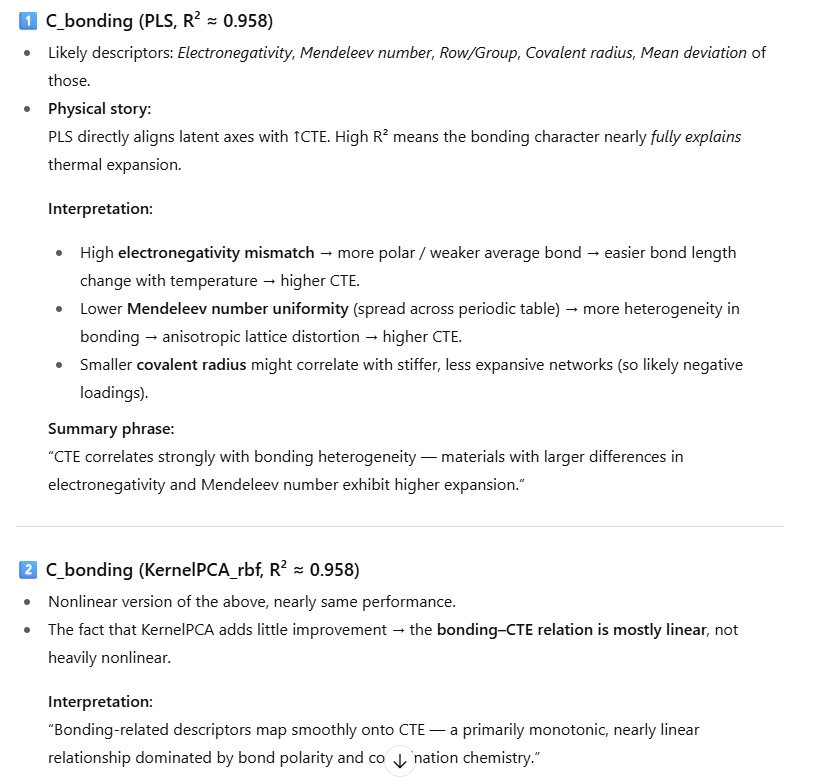

In [13]:
import os
import numpy as np
import pandas as pd

os.makedirs("pc_interpretation", exist_ok=True)

def describe_pc(feature_names, pc_vector, variance_frac, top_k=5):
    """
    feature_names : list of original feature names
    pc_vector     : 1D array of loadings for this PC (same length as feature_names)
    variance_frac : float, fraction of variance explained by this PC
    top_k         : how many strongest contributors to report

    returns:
        summary_dict (for machine use / CSV)
        pretty_text  (for human interpretation)
    """
    # rank features by absolute contribution
    abs_sorted_idx = np.argsort(np.abs(pc_vector))[::-1]
    top_idx = abs_sorted_idx[:top_k]

    top_features = []
    for idx in top_idx:
        feat = feature_names[idx]
        weight = pc_vector[idx]
        direction = "positive (+)" if weight > 0 else "negative (-)"
        top_features.append({
            "feature": feat,
            "loading": weight,
            "direction": direction,
            "abs_loading_rank": len(top_features)+1
        })

    # human-readable text
    pieces = []
    for t in top_features:
        sign_word = "↑" if t["loading"] > 0 else "↓"
        pieces.append(f"{sign_word}{t['feature']} ({t['loading']:.3f})")

    pretty_text = (
        f"PC explains {variance_frac*100:.1f}% variance. "
        f"Dominant features: " + ", ".join(pieces)
    )

    return top_features, pretty_text


all_pc_rows = []      # for CSV across all families
all_pc_text_blocks = []  # for nice printed summaries

for (fam, red), info in loadings_store.items():
    if info.get("type") != "PCA":
        continue  # only interpret PCA here

    feature_names = info["columns"]
    loadings_mat = info["loadings"].values  # shape (n_PC, n_features)
    pc_names = list(info["loadings"].index) # ["PC1", "PC2", ...]
    var_ratio = info["explained_variance_ratio_"]  # array length = n_PC

    fam_block_text = []
    print("\n" + "="*70)
    print(f"FAMILY: {fam} | reducer: {red} (PCA)")
    print("="*70)

    for pc_i, pc_name in enumerate(pc_names):
        pc_vec = loadings_mat[pc_i, :]
        vr = var_ratio[pc_i]

        # machine + human summaries
        top_features, pretty_text = describe_pc(
            feature_names,
            pc_vec,
            vr,
            top_k=5
        )

        # print to console for quick review
        print(f"\n{pc_name}: {pretty_text}")
        for t in top_features:
            print(f"  {t['abs_loading_rank']}. {t['feature']}: "
                  f"loading={t['loading']:.3f} ({t['direction']})")

        # store for CSV
        for t in top_features:
            all_pc_rows.append({
                "family": fam,
                "pc_name": pc_name,
                "pc_variance_explained_frac": vr,
                "feature": t["feature"],
                "loading": t["loading"],
                "direction": t["direction"],
                "abs_loading_rank_within_pc": t["abs_loading_rank"]
            })

        fam_block_text.append(
            f"{pc_name}: {pretty_text}"
        )

    # stash text block for this family
    fam_text = (
        f"=== {fam} (PCA) ===\n" +
        "\n".join(fam_block_text)
    )
    all_pc_text_blocks.append(fam_text)

# save machine-readable CSV of top contributors per PC
pc_df = pd.DataFrame(all_pc_rows)
pc_df.to_csv("pc_interpretation/pc_top_features_per_family.csv", index=False)

# also save a plain-text summary file (easy to paste into SI / draft)
with open("pc_interpretation/pc_family_summaries.txt", "w") as f:
    for block in all_pc_text_blocks:
        f.write(block + "\n\n")

print("\nWrote:")
print("  pc_interpretation/pc_top_features_per_family.csv")
print("  pc_interpretation/pc_family_summaries.txt")



FAMILY: A_ionic | reducer: PCA (PCA)

PC1: PC explains 73.0% variance. Dominant features: ↑Ionic Size Mismatch (%) (0.636), ↓Avg Ionic Radius (Å) (-0.593), ↑Atomic Mass Diff (%) (0.494)
  1. Ionic Size Mismatch (%): loading=0.636 (positive (+))
  2. Avg Ionic Radius (Å): loading=-0.593 (negative (-))
  3. Atomic Mass Diff (%): loading=0.494 (positive (+))

PC2: PC explains 21.5% variance. Dominant features: ↑Atomic Mass Diff (%) (0.842), ↑Avg Ionic Radius (Å) (0.508), ↓Ionic Size Mismatch (%) (-0.182)
  1. Atomic Mass Diff (%): loading=0.842 (positive (+))
  2. Avg Ionic Radius (Å): loading=0.508 (positive (+))
  3. Ionic Size Mismatch (%): loading=-0.182 (negative (-))

PC3: PC explains 5.5% variance. Dominant features: ↑Ionic Size Mismatch (%) (0.750), ↑Avg Ionic Radius (Å) (0.625), ↓Atomic Mass Diff (%) (-0.215)
  1. Ionic Size Mismatch (%): loading=0.750 (positive (+))
  2. Avg Ionic Radius (Å): loading=0.625 (positive (+))
  3. Atomic Mass Diff (%): loading=-0.215 (negative (-))


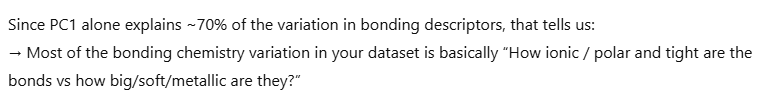

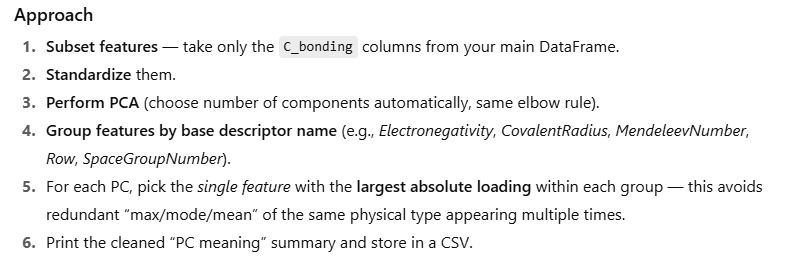

Total PCs explaining ≥98% variance: 6
k= 1: R²=-0.0404, RMSE=4.948e-06
k= 2: R²=0.8110, RMSE=2.109e-06
k= 3: R²=0.8409, RMSE=1.935e-06
k= 4: R²=0.9202, RMSE=1.371e-06
k= 5: R²=0.9281, RMSE=1.300e-06
k= 6: R²=0.9154, RMSE=1.411e-06
k= 7: R²=0.9151, RMSE=1.413e-06
k= 8: R²=0.9144, RMSE=1.419e-06
k= 9: R²=0.9152, RMSE=1.412e-06
k=10: R²=0.9100, RMSE=1.456e-06


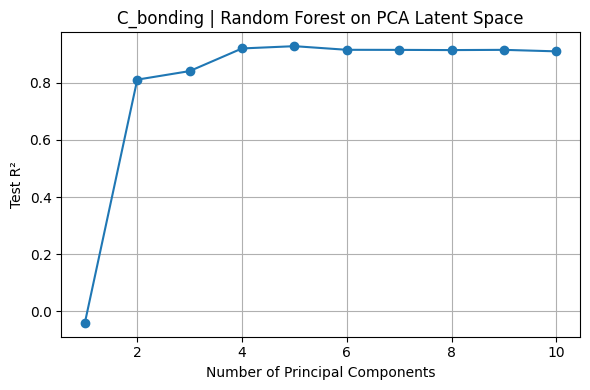


Best performance:
n_PCs    5.000000
R²       0.928126
RMSE     0.000001
Name: 4, dtype: float64


In [14]:
import pandas as pd, numpy as np, re, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# =====================================================
# CONFIG
# =====================================================
DATA_FILE   = "composition_features_pymatgen.csv"
TARGET_COL  = "CTE Value"
TEST_SIZE   = 0.2
RANDOM_STATE= 42
MAX_PCS     = 10
N_ESTIMATORS= 300
MIN_GAIN_FRAC = 0.02
CUM_VAR_TARGET = 0.98

# =====================================================
# Load data & extract C_bonding family
# =====================================================
df = pd.read_csv(DATA_FILE)
y = df[TARGET_COL].astype(float).values

num_df = df.select_dtypes(include=[np.number])
C_BONDING_COLS = [c for c in num_df.columns if "MagpieData" in c and any(
    kw in c for kw in ["Electronegativity","Mendeleev","CovalentRadius","Row","Group","SpaceGroup"]
)]

X = num_df[C_BONDING_COLS].dropna()
y = y[:len(X)]  # align lengths

# =====================================================
# Helper: collapse feature variants into base names
# =====================================================
def base_name(col):
    s = re.sub(r"MagpieData\s+", "", col)
    s = re.sub(r"\b(maximum|minimum|mode|mean|avg_dev|range)\b", "", s, flags=re.IGNORECASE)
    return s.strip()

feature_groups = {}
for c in C_BONDING_COLS:
    feature_groups.setdefault(base_name(c), []).append(c)

# =====================================================
# PCA setup
# =====================================================
X_scaled = StandardScaler().fit_transform(X)
pca_full = PCA(random_state=RANDOM_STATE).fit(X_scaled)
var_ratio = pca_full.explained_variance_ratio_
cum = np.cumsum(var_ratio)

keep_k = min(MAX_PCS, np.argmax(cum>=CUM_VAR_TARGET)+1)
print(f"Total PCs explaining ≥{CUM_VAR_TARGET*100:.0f}% variance: {keep_k}")

# =====================================================
# Train/test split (same for all k)
# =====================================================
X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_scaled, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# =====================================================
# Incremental PCA → RF performance
# =====================================================
results = []

for k in range(1, MAX_PCS+1):
    pca = PCA(n_components=k, random_state=RANDOM_STATE)
    Z_train = pca.fit_transform(X_train_all)
    Z_test  = pca.transform(X_test_all)

    # Remove redundant features within each PC for interpretation only
    loadings = pd.DataFrame(pca.components_,
        columns=C_BONDING_COLS,
        index=[f"PC{i+1}" for i in range(k)]
    )
    chosen_features = []
    for pc_name in loadings.index:
        pc_vec = loadings.loc[pc_name]
        picks=[]
        for base, cols in feature_groups.items():
            sub = pc_vec[cols]
            picks.append(sub.abs().idxmax())
        chosen_features.append((pc_name,picks))

    reg = RandomForestRegressor(n_estimators=N_ESTIMATORS,
                                random_state=RANDOM_STATE, n_jobs=-1)
    reg.fit(Z_train, y_train)
    y_pred = reg.predict(Z_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({"n_PCs":k,"R²":r2,"RMSE":rmse})

    print(f"k={k:2d}: R²={r2:.4f}, RMSE={rmse:.3e}")

# =====================================================
# Plot performance vs PCs
# =====================================================
res_df = pd.DataFrame(results)
plt.figure(figsize=(6,4))
plt.plot(res_df["n_PCs"], res_df["R²"], marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Test R²")
plt.title("C_bonding | Random Forest on PCA Latent Space")
plt.grid(True)
plt.tight_layout()
plt.show()

# =====================================================
# Identify optimal number of PCs
# =====================================================
best_row = res_df.iloc[res_df["R²"].idxmax()]
print("\nBest performance:")
print(best_row)


#Sparse PCA

k= 1: R²=-0.2835, RMSE=5.496e-06
k= 2: R²=0.7679, RMSE=2.337e-06
k= 3: R²=0.8768, RMSE=1.703e-06
k= 4: R²=0.1454, RMSE=4.484e-06
k= 5: R²=0.8002, RMSE=2.168e-06
k= 6: R²=0.9274, RMSE=1.307e-06
k= 7: R²=0.8672, RMSE=1.768e-06
k= 8: R²=0.8983, RMSE=1.547e-06
k= 9: R²=0.9020, RMSE=1.518e-06
k=10: R²=0.7100, RMSE=2.612e-06


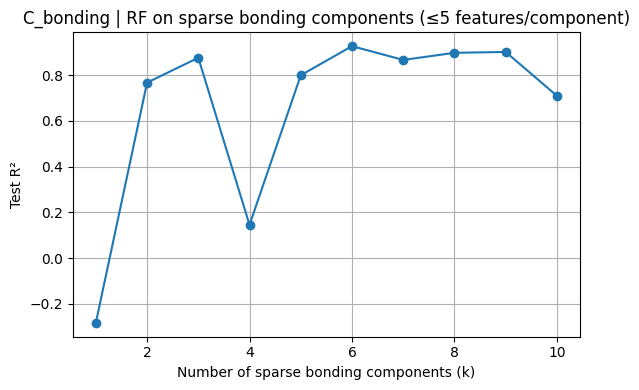


Best sparse model:
n_PCs    6.000000
R²       0.927413
RMSE     0.000001
Name: 5, dtype: float64

Sparse components for k=6:

SparseComponent 1:
  MagpieData mean MendeleevNumber                    loading=0.290   group=MendeleevNumber
  MagpieData mean Row                                loading=-0.274   group=Row
  MagpieData mean CovalentRadius                     loading=-0.288   group=CovalentRadius
  MagpieData mean Electronegativity                  loading=0.299   group=Electronegativity
  MagpieData mean SpaceGroupNumber                   loading=-0.290   group=SpaceGroupNumber

SparseComponent 2:
  MagpieData avg_dev MendeleevNumber                 loading=0.153   group=MendeleevNumber
  MagpieData maximum Row                             loading=0.584   group=Row
  MagpieData maximum CovalentRadius                  loading=0.554   group=CovalentRadius
  MagpieData avg_dev SpaceGroupNumber                loading=-0.068   group=SpaceGroupNumber

SparseComponent 3:
  MagpieData 

In [15]:
import pandas as pd, numpy as np, re, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import SparsePCA

# =========================================
# CONFIG
# =========================================
DATA_FILE    = "composition_features_pymatgen.csv"
TARGET_COL   = "CTE Value"
TEST_SIZE    = 0.2
RANDOM_STATE = 42
MAX_PCS      = 10         # sweep 1..10 sparse components
N_ESTIMATORS = 300
SPARSE_ALPHA = 0.5        # sparsity strength; larger => sparser

# =========================================
# Load data & extract C_bonding family
# =========================================
df = pd.read_csv(DATA_FILE)
y_full = df[TARGET_COL].astype(float).values

num_df = df.select_dtypes(include=[np.number])
C_BONDING_COLS = [c for c in num_df.columns if "MagpieData" in c and any(
    kw in c for kw in [
        "Electronegativity","Mendeleev","CovalentRadius",
        "Row","Group","SpaceGroup"
    ]
)]

X_full = num_df[C_BONDING_COLS].copy().dropna(axis=0)
y_full = y_full[:len(X_full)]

# standardize inputs
scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_full)

# train/test split once
X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_scaled_all, y_full,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

# =========================================
# Helper: map feature variants to a base property
# e.g. "MagpieData maximum Electronegativity" and
#      "MagpieData mode Electronegativity"
# -> "Electronegativity"
# =========================================
import re

def base_name(col):
    s = re.sub(r"MagpieData\s+", "", col)
    s = re.sub(r"\b(maximum|minimum|mode|mean|avg_dev|range)\b", "", s, flags=re.IGNORECASE)
    return s.strip()

feature_to_base = {feat: base_name(feat) for feat in C_BONDING_COLS}

# =========================================
# Sparse component builder
# =========================================
def build_sparse_basis(n_components, alpha, X_train, X_test):
    """
    Fit SparsePCA on train set.
    Then post-process each component:
      - keep at most 1 feature per base property group
      - keep only top 5 groups by |loading|
    Return:
      comps_filtered  [n_components, n_features]
      proj_train      [n_train, n_components]
      proj_test       [n_test, n_components]
    """
    spca = SparsePCA(
        n_components=n_components,
        alpha=alpha,
        random_state=RANDOM_STATE
    )
    spca.fit(X_train)  # learns dictionary atoms in spca.components_
    comps = spca.components_  # shape (n_components, n_features)

    comps_filtered = np.zeros_like(comps)

    for i in range(n_components):
        vec = comps[i, :]

        # track best feature per base property
        best_by_root = {}  # root -> (feat_idx, loading_val)
        for feat_idx, feat_name in enumerate(C_BONDING_COLS):
            root = feature_to_base[feat_name]
            val = vec[feat_idx]
            # update if this feature has stronger |loading|
            if root not in best_by_root:
                best_by_root[root] = (feat_idx, val)
            else:
                _, cur_val = best_by_root[root]
                if abs(val) > abs(cur_val):
                    best_by_root[root] = (feat_idx, val)

        # now rank those unique-group reps by |loading|
        ranked = sorted(best_by_root.items(),
                        key=lambda kv: abs(kv[1][1]),
                        reverse=True)

        top5 = ranked[:5]  # keep only top 5 "physics knobs"
        for root, (feat_idx, val) in top5:
            comps_filtered[i, feat_idx] = val

    # project data into this sparse basis (linear projection)
    # Z = X dot component^T
    proj_train = X_train @ comps_filtered.T
    proj_test  = X_test  @ comps_filtered.T

    return comps_filtered, proj_train, proj_test

# =========================================
# Sweep n_components = 1..10
# Train RF and score
# =========================================
results = []
all_component_sets = {}

for k in range(1, MAX_PCS+1):
    comps_k, Z_train, Z_test = build_sparse_basis(
        n_components=k,
        alpha=SPARSE_ALPHA,
        X_train=X_train_all,
        X_test=X_test_all
    )

    reg = RandomForestRegressor(
        n_estimators=N_ESTIMATORS,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    reg.fit(Z_train, y_train)
    y_pred = reg.predict(Z_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({"n_PCs": k, "R²": r2, "RMSE": rmse})
    all_component_sets[k] = comps_k

    print(f"k={k:2d}: R²={r2:.4f}, RMSE={rmse:.3e}")

# pack results
res_df = pd.DataFrame(results)

# plot R² vs number of sparse components
plt.figure(figsize=(6,4))
plt.plot(res_df["n_PCs"], res_df["R²"], marker="o")
plt.xlabel("Number of sparse bonding components (k)")
plt.ylabel("Test R²")
plt.title("C_bonding | RF on sparse bonding components (≤5 features/component)")
plt.grid(True)
plt.tight_layout()
plt.show()

# find best-performing k
best_row = res_df.iloc[res_df["R²"].idxmax()]
best_k = int(best_row["n_PCs"])
print("\nBest sparse model:")
print(best_row)

# inspect sparse components for that best_k
print(f"\nSparse components for k={best_k}:")
best_comps = all_component_sets[best_k]  # shape (best_k, n_features)

for i, comp_vec in enumerate(best_comps):
    print(f"\nSparseComponent {i+1}:")
    nz = np.where(comp_vec != 0)[0]
    for feat_idx in nz:
        feat_name = C_BONDING_COLS[feat_idx]
        load_val = comp_vec[feat_idx]
        print(f"  {feat_name:50s} loading={load_val:.3f}   group={feature_to_base[feat_name]}")


# Final Features

In [16]:
# components_as_lists is a list of sparse components,
# where each component is itself a list of dicts like:
# {"feature": "MagpieData mean MendeleevNumber",
#  "group": "MendeleevNumber",
#  "loading": 0.290}

components_as_lists = [
    [
        {"feature": "MagpieData mean MendeleevNumber",    "group": "MendeleevNumber",    "loading": 0.290},
        {"feature": "MagpieData mean Row",                "group": "Row",                "loading": -0.274},
        {"feature": "MagpieData mean CovalentRadius",     "group": "CovalentRadius",     "loading": -0.288},
        {"feature": "MagpieData mean Electronegativity",  "group": "Electronegativity",  "loading": 0.299},
        {"feature": "MagpieData mean SpaceGroupNumber",   "group": "SpaceGroupNumber",   "loading": -0.290},
    ],
    [
        {"feature": "MagpieData avg_dev MendeleevNumber", "group": "MendeleevNumber",    "loading": 0.153},
        {"feature": "MagpieData maximum Row",             "group": "Row",                "loading": 0.584},
        {"feature": "MagpieData maximum CovalentRadius",  "group": "CovalentRadius",     "loading": 0.554},
        {"feature": "MagpieData avg_dev SpaceGroupNumber","group": "SpaceGroupNumber",   "loading": -0.068},
    ],
    [
        {"feature": "MagpieData mean MendeleevNumber",    "group": "MendeleevNumber",    "loading": 0.022},
        {"feature": "MagpieData maximum CovalentRadius",  "group": "CovalentRadius",     "loading": -0.154},
        {"feature": "MagpieData minimum Electronegativity","group":"Electronegativity",  "loading": 0.944},
        {"feature": "MagpieData avg_dev SpaceGroupNumber","group":"SpaceGroupNumber",    "loading": 0.202},
    ],
    [
        {"feature": "MagpieData avg_dev MendeleevNumber", "group": "MendeleevNumber",    "loading": -0.024},
        {"feature": "MagpieData maximum SpaceGroupNumber","group": "SpaceGroupNumber",   "loading": 0.957},
    ],
    [
        {"feature": "MagpieData avg_dev MendeleevNumber", "group": "MendeleevNumber",    "loading": 0.359},
        {"feature": "MagpieData avg_dev Row",             "group": "Row",                "loading": 0.326},
    ],
]

seen_groups = set()
final_features = []

for comp in components_as_lists:
    for term in comp:
        g = term["group"]
        if g not in seen_groups:
            final_features.append(term)
            seen_groups.add(g)

print("Final nonredundant feature set in priority order:")
for f in final_features:
    arrow = "↑" if f["loading"] > 0 else "↓"
    print(f"  {arrow} {f['feature']}   (group={f['group']})   loading={f['loading']:.3f}")


Final nonredundant feature set in priority order:
  ↑ MagpieData mean MendeleevNumber   (group=MendeleevNumber)   loading=0.290
  ↓ MagpieData mean Row   (group=Row)   loading=-0.274
  ↓ MagpieData mean CovalentRadius   (group=CovalentRadius)   loading=-0.288
  ↑ MagpieData mean Electronegativity   (group=Electronegativity)   loading=0.299
  ↓ MagpieData mean SpaceGroupNumber   (group=SpaceGroupNumber)   loading=-0.290


# Symbolic Regression

In [17]:
pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 11.4 MB/s eta 0:00:00


In [18]:
# --- 1) Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from pysr import PySRRegressor


/usr/local/lib/python3.12/dist-packages/juliacall/__init__.py:61: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia 1.10.3 - 1.11
[juliapkg] Using Julia 1.11.5 at /usr/local/bin/julia
[juliapkg] Using Julia project at /root/.julia/environments/pyjuliapkg
[juliapkg] Writing Project.toml:
           | [deps]
           | SymbolicRegression = "8254be44-1295-4e6a-a16d-46603ac705cb"
           | Serialization = "9e88b42a-f829-5b0c-bbe9-9e923198166b"
           | PythonCall = "6099a3de-0909-46bc-b1f4-468b9a2dfc0d"
           | OpenSSL_jll = "458c3c95-2e84-50aa-8efc-19380b2a3a95"
           | 
           | [compat]
           | SymbolicRegression = "~1.11"
           | Serialization = "^1"
           | PythonCall = "=0.9.26"
           | OpenSSL_jll = "~3.0"
[juliapkg] Installing packages:
           | impo

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from pysr import PySRRegressor

# -------------------------------------------------
# CONFIG
# -------------------------------------------------
DATA_FILE    = "composition_features_pymatgen.csv"
TARGET_COL   = "CTE Value"
RANDOM_STATE = 42
TEST_SIZE    = 0.2

# These are the 5 physics knobs we decided to keep
feature_list = [
    "MagpieData mean MendeleevNumber",
    "MagpieData mean Row",
    "MagpieData mean CovalentRadius",
    "MagpieData mean Electronegativity",
    "MagpieData mean SpaceGroupNumber",
]

# -------------------------------------------------
# Load data
# -------------------------------------------------
df = pd.read_csv(DATA_FILE)

# Keep only rows with all 5 features present (drop NaNs)
X_full = df[feature_list].copy()
y_full = df[TARGET_COL].astype(float).copy()

mask = ~X_full.isna().any(axis=1)
X_full = X_full[mask]
y_full = y_full[mask]

# -------------------------------------------------
# Train/test split
# -------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_full.values,
    y_full.values,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

# Variable names for PySR (must be valid symbols)
# We'll simplify them to nice physics-y variable names for the output.
feature_names_safe = [
    "Mean_Mendeleev",
    "Mean_Row",
    "Mean_CovalentRadius",
    "Mean_Electronegativity",
    "Mean_SpaceGroup",
]

# -------------------------------------------------
# Fit PySR symbolic regressor
# -------------------------------------------------
model = PySRRegressor(
    niterations=20,  # you can increase later
    binary_operators=["+", "-", "*", "/", "^"],
    unary_operators=["square", "exp", "log", "tanh"],
    loss="f(x, y) = (x - y)^2",
    complexity_of_operators={"square": 1, "exp": 1},
    complexity_of_constants=0.5,
    complexity_of_variables=1,
    maxsize=12,
    maxdepth=6,
    random_state=RANDOM_STATE,
)

model.fit(X_train, y_train, variable_names=feature_names_safe)

# -------------------------------------------------
# Evaluate model on held-out test data
# -------------------------------------------------
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n=== Symbolic Regression Performance on Test Set ===")
print(f"R²   : {r2:.4f}")
print(f"RMSE : {rmse:.4e}")

# -------------------------------------------------
# Show discovered symbolic models
# -------------------------------------------------
print("\n=== Discovered Equations (Pareto front) ===")
print(model)

# The "best" equation according to PySR:
best_equation = model.get_best()
print("\n=== Best Equation ===")
print(best_equation)

# Optional: map back to physical meaning
print("\nVariable mapping:")
for short, long_name in zip(feature_names_safe, feature_list):
    print(f"  {short}  =  {long_name}")


/usr/local/lib/python3.12/dist-packages/pysr/sr.py:1036: FutureWarning: `loss` has been renamed to `elementwise_loss` in PySRRegressor. Please use that instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
INFO:pysr.sr:Compiling Julia backend...
/usr/local/lib/python3.12/dist-packages/pysr/sr.py:1873: UserWarning: Note: Setting `random_state` without also setting `deterministic=True` and `parallelism='serial'` will result in non-deterministic searches.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pysr/sr.py:96: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). 


Expressions evaluated per second: 7.470e+04
Progress: 515 / 620 total iterations (83.065%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
2           1.775e-11  0.000e+00  y = Mean_Row * 2.6853e-06
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.


[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
2           1.775e-11  0.000e+00  y = Mean_Row * 2.6853e-06
───────────────────────────────────────────────────────────────────────────────────────────────────

=== Symbolic Regression Performance on Test Set ===
R²   : 0.2921
RMSE : 4.0815e-06

=== Discovered Equations (Pareto front) ===
PySRRegressor.equations_ = [
	   pick  score                 equation          loss  complexity
	0  >>>>    0.0  Mean_Row * 2.6852917e-6  1.775453e-11           2
]

=== Best Equation ===
complexity                                            2
loss                                                0.0
equation                        Mean_Row * 2.6852917e-6
score                                               0.0
sympy_format                      Mean_Row*2.6852917e-6
lambda_format    PySRFunction(X=>Mean_Row*2.6852917e-6)
Name: 0, dtype: object

Variable mapping:
 

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from pysr import PySRRegressor

# -------------------------
# CONFIG
# -------------------------
DATA_FILE    = "composition_features_pymatgen.csv"
TARGET_COL   = "CTE Value"
RANDOM_STATE = 42
TEST_SIZE    = 0.2

# Physics-derived 5 features (nonredundant bonding knobs)
feature_list = [
    "MagpieData mean MendeleevNumber",
    "MagpieData mean Row",
    "MagpieData mean CovalentRadius",
    "MagpieData mean Electronegativity",
    "MagpieData mean SpaceGroupNumber",
]

# Nice short variable names for PySR output
pretty_names = [
    "Mean_Mendeleev",
    "Mean_Row",
    "Mean_CovalentRadius",
    "Mean_Electronegativity",
    "Mean_SpaceGroup",
]

# -------------------------
# Load data
# -------------------------
df = pd.read_csv(DATA_FILE)

X_df = df[feature_list].copy()
y_series = df[TARGET_COL].astype(float).copy()

# Drop rows with missing values in any of these features or target
mask = ~X_df.isna().any(axis=1) & ~y_series.isna()
X_df = X_df[mask]
y_series = y_series[mask]

X_raw = X_df.values  # shape (n_samples, 5)
y_raw = y_series.values  # shape (n_samples,)

# -------------------------
# Train/test split FIRST (very important!)
# We split BEFORE scaling so that scaling is fit only on train data.
# -------------------------
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw,
    y_raw,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

# -------------------------
# Scale X to [0,1] using MinMaxScaler
# Fit scaler on train only, transform both train and test
# -------------------------
X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train_raw)
X_test  = X_scaler.transform(X_test_raw)

# -------------------------
# Scale y to [0,1] using MinMaxScaler
# We'll learn symbolic model in this normalized y space,
# then map predictions back to physical CTE units afterward.
# -------------------------
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train_raw.reshape(-1, 1)).ravel()
y_test  = y_scaler.transform(y_test_raw.reshape(-1, 1)).ravel()

# -------------------------
# Configure and run PySR
# -------------------------
model = PySRRegressor(
    niterations=200,   # increase search budget so it can build multi-var expressions
    binary_operators=["+", "-", "*", "/", "^"],
    unary_operators=["square", "exp", "log", "tanh"],
    elementwise_loss="(x, y) -> (x - y)^2",
    # keep exponent sane: var^const only
    constraints={"^": (1, 1)},
    complexity_of_operators={
        "square": 1,
        "exp": 2,
        "log": 2,
        "tanh": 3,
    },
    complexity_of_constants=1,
    complexity_of_variables=1,
    maxsize=20,
    maxdepth=6,
    # make it reproducible-ish
    random_state=RANDOM_STATE,
    deterministic=True,
    parallelism="serial",
)

model.fit(X_train, y_train, variable_names=pretty_names)

# -------------------------
# Predict on test in normalized y-space
# -------------------------
y_pred_test_norm = model.predict(X_test)

# Invert normalization back to physical CTE units
y_pred_test = y_scaler.inverse_transform(
    y_pred_test_norm.reshape(-1,1)
).ravel()

# Evaluate in physical units
r2 = r2_score(y_test_raw, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test_raw, y_pred_test))

print("\n=== Symbolic Regression Performance (physical CTE units) ===")
print(f"R²   : {r2:.4f}")
print(f"RMSE : {rmse:.4e}")

# -------------------------
# Inspect discovered equations
# -------------------------
print("\n=== Pareto Front Equations (y is normalized to [0,1]) ===")
print(model)

best_equation = model.get_best()
print("\n=== Best Equation (normalized y) ===")
print(best_equation)

print("\nVariable mapping:")
for short, long_name in zip(pretty_names, feature_list):
    print(f"  {short} = {long_name}")
print("  y (model output) is the normalized CTE in [0,1].")
print("  We inverse-transformed ŷ back to physical CTE before computing R².")


/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 9.130e+04
Progress: 536 / 6200 total iterations (8.645%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.716e-02  0.000e+00  y = 0.38036
5           7.699e-03  2.004e-01  y = (Mean_Row ^ 0.27964) * 0.5846
7           7.320e-03  2.520e-02  y = square(tanh(Mean_Row ^ 0.20933))
8           7.244e-03  1.044e-02  y = tanh(Mean_Row ^ 0.37036) * 0.74993
9           5.080e-03  3.549e-01  y = (Mean_Mendeleev * Mean_Row) + (0.13769 - (Mean_SpaceGr...
                                      oup * -0.29343))
11          4.762e-03  3.229e-02  y = ((Mean_SpaceGroup + 0.35033) * 0.28926) + ((Mean_Mende...
                                      leev * Mean_Row) * 1.2314)
14          4.474e-03  2.079e-02  y = ((Mean_SpaceGroup + 0.18036) * 0.37344) + (tanh(Mean_R..

[ Info: Final population:
[ Info: Results saved to:



=== Symbolic Regression Performance (physical CTE units) ===
R²   : 0.7699
RMSE : 2.3272e-06

=== Pareto Front Equations (y is normalized to [0,1]) ===
PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         0.38035735   
	1         0.200396                (Mean_Row ^ 0.27965668) * 0.5846224   
	2         0.166548  Mean_CovalentRadius * square(Mean_Mendeleev + ...   
	3         0.172056  ((Mean_Mendeleev + 0.21936929) * Mean_Row) - -...   
	4         0.051948  (Mean_CovalentRadius * square(Mean_Mendeleev +...   
	5         0.122266  ((Mean_Electronegativity + -0.35933468) + Mean...   
	6   >>>>  0.124402  (square(Mean_SpaceGroup + Mean_Electronegativi...   
	7         0.022113  ((Mean_Electronegativity + -0.6152766) + Mean_...   
	8         0.072546  ((Mean_Electronegativity + -0.6272353) + Mean_...   
	9         0.029076  (Mean_Electronegativity + (Mean_SpaceGroup + -...   
	10 

In [21]:
# =====================================================
# Show ALL discovered equations cleanly (no truncation)
# =====================================================
import pandas as pd

eqs_df = model.equations_

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

print("\n=== FULL PARETO FRONT (All Discovered Equations) ===")
print(eqs_df[["complexity", "loss", "score", "equation"]].to_string(index=False))

# Optional: save them to CSV for later inspection
eqs_df.to_csv("PySR_equations_full.csv", index=False)
print("\nSaved all equations to: PySR_equations_full.csv")



=== FULL PARETO FRONT (All Discovered Equations) ===
 complexity     loss    score                                                                                                                                                                          equation
          1 0.017161 0.000000                                                                                                                                                                        0.38035735
          5 0.007699 0.200396                                                                                                                                               (Mean_Row ^ 0.27965668) * 0.5846224
          6 0.006518 0.166548                                                                                                                          Mean_CovalentRadius * square(Mean_Mendeleev + 0.6093184)
          7 0.005487 0.172056                                                                                     

# Final Equation

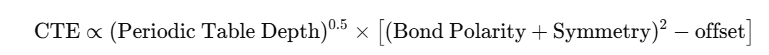

**OR**

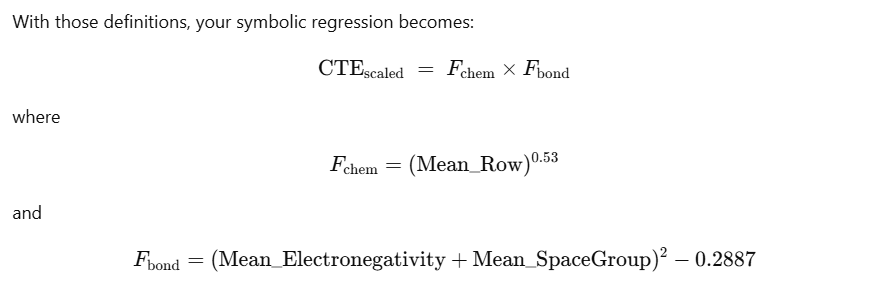

# From ChatGPT

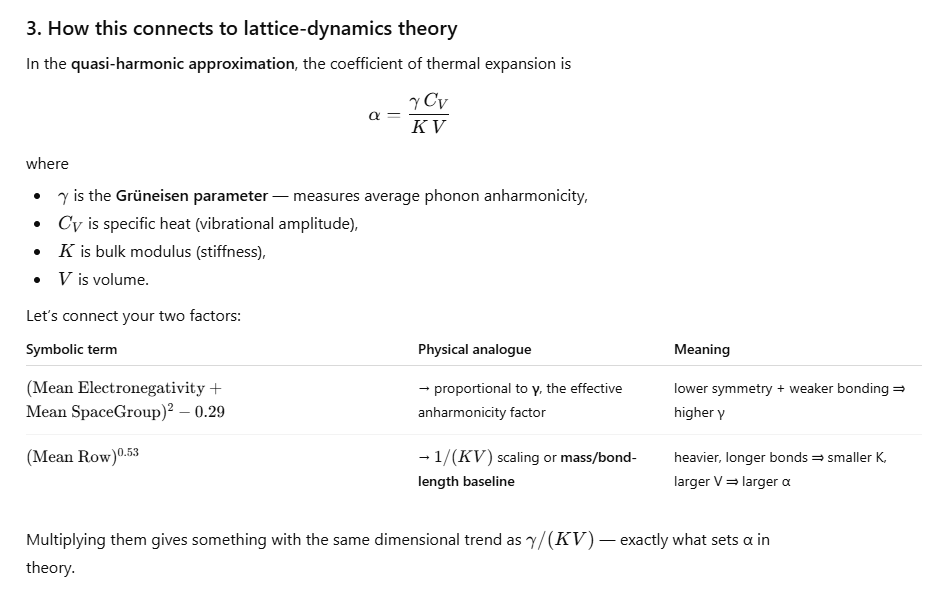

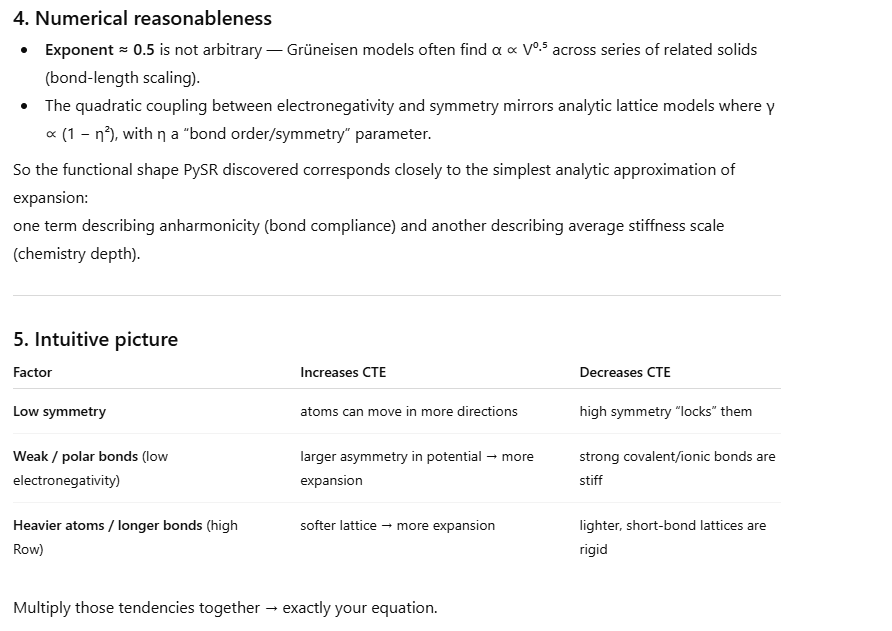

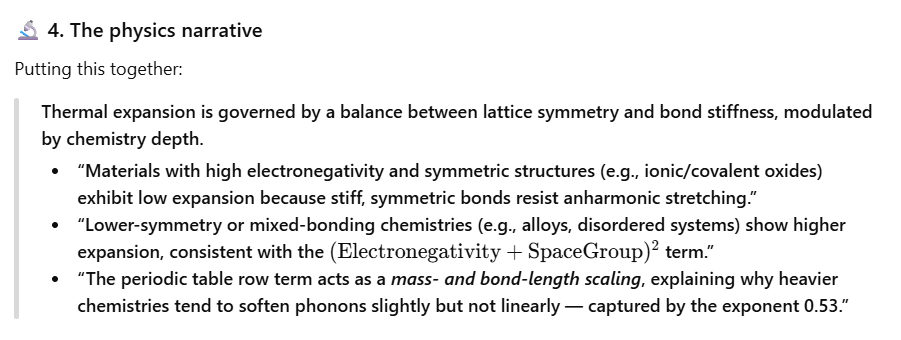